## keras与全连接神经网络

本节将以3个全连接神经网络的使用为例，重点介绍使用keras进行数据预处理，构建并行数据管道的方法。

### 一，结构化数据范例——Titanic生存预测

**1，准备数据**

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
dftrain_raw = pd.read_csv('titanic_datasets/train.csv')
dftest_raw = pd.read_csv('titanic_datasets/test.csv')

In [3]:
dftrain_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


字段说明：

Survived:0代表死亡，1代表存活【y标签】

Pclass:乘客所持票类，有三种值(1,2,3) 【转换成onehot编码】

Name:乘客姓名 【舍去】

Sex:乘客性别 【转换成bool特征】

Age:乘客年龄(有缺失)  【数值特征，添加“年龄是否缺失”作为辅助特征】

SibSp:乘客兄弟姐妹/配偶的个数(整数值) 【数值特征】

Parch:乘客父母/孩子的个数(整数值)【数值特征】

Ticket:票号(字符串)【舍去】

Fare:乘客所持票的价格(浮点数，0-500不等) 【数值特征】

Cabin:乘客所在船舱(有缺失) 【添加“所在船舱是否缺失”作为辅助特征】

Embarked:乘客登船港口:S、C、Q(有缺失)【转换成onehot编码，四维度 S,C,Q,nan】

In [4]:
# 数据预处理
def preprocessing(dfdata):

    dfresult= pd.DataFrame()

    #Pclass
    dfPclass = pd.get_dummies(dfdata['Pclass'])
    dfPclass.columns = ['Pclass_' +str(x) for x in dfPclass.columns ]
    dfresult = pd.concat([dfresult,dfPclass],axis = 1)

    #Sex
    dfSex = pd.get_dummies(dfdata['Sex'])
    dfresult = pd.concat([dfresult,dfSex],axis = 1)

    #Age
    dfresult['Age'] = dfdata['Age'].fillna(0)
    dfresult['Age_null'] = pd.isna(dfdata['Age']).astype('int32')

    #SibSp,Parch,Fare
    dfresult['SibSp'] = dfdata['SibSp']
    dfresult['Parch'] = dfdata['Parch']
    dfresult['Fare'] = dfdata['Fare']

    #Carbin
    dfresult['Cabin_null'] =  pd.isna(dfdata['Cabin']).astype('int32')

    #Embarked
    dfEmbarked = pd.get_dummies(dfdata['Embarked'],dummy_na=True)
    dfEmbarked.columns = ['Embarked_' + str(x) for x in dfEmbarked.columns]
    dfresult = pd.concat([dfresult,dfEmbarked],axis = 1)
    
    return(dfresult)

In [5]:
x_train = preprocessing(dftrain_raw)
y_train = dftrain_raw['Survived'].values

x_test = preprocessing(dftest_raw)

In [6]:
x_test

,Pclass_1,Pclass_2,Pclass_3,female,male,Age,Age_null,SibSp,Parch,Fare,Cabin_null,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,0,0,1,0,1,34.5,0,0,0,7.8292,1,0,1,0,0
1,0,0,1,1,0,47.0,0,1,0,7.0000,1,0,0,1,0
2,0,1,0,0,1,62.0,0,0,0,9.6875,1,0,1,0,0
3,0,0,1,0,1,27.0,0,0,0,8.6625,1,0,0,1,0
4,0,0,1,1,0,22.0,0,1,1,12.2875,1,0,0,1,0
5,0,0,1,0,1,14.0,0,0,0,9.2250,1,0,0,1,0
6,0,0,1,1,0,30.0,0,0,0,7.6292,1,0,1,0,0
7,0,1,0,0,1,26.0,0,1,1,29.0000,1,0,0,1,0
8,0,0,1,1,0,18.0,0,0,0,7.2292,1,1,0,0,0
9,0,0,1,0,1,21.0,0,2,0,24.1500,1,0,0,1,0


**2，构建模型**

In [7]:
import keras
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(20,activation = 'relu',input_shape=(15,)))
model.add(layers.Dense(10,activation = 'relu' ))
model.add(layers.Dense(10,activation = 'relu' ))
model.add(layers.Dense(10,activation = 'relu' ))
model.add(layers.Dense(1,activation = 'sigmoid' ))

model.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])

model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                320       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 761
Trainable params: 761
Non-trainable params: 0
_________________________________________________________________


**3，训练模型**

In [8]:
history = model.fit(x_train,y_train,
                    batch_size= 64,
                    epochs= 10,
                    validation_split=0.2)

Train on 712 samples, validate on 179 samples
Epoch 1/10
712/712 [==============================] - 1s 794us/step - loss: 1.1382 - acc: 0.4340 - val_loss: 0.9161 - val_acc: 0.4022
Epoch 2/10
712/712 [==============================] - 0s 39us/step - loss: 0.8059 - acc: 0.4340 - val_loss: 0.7348 - val_acc: 0.4972
Epoch 3/10
712/712 [==============================] - 0s 58us/step - loss: 0.7028 - acc: 0.5899 - val_loss: 0.6962 - val_acc: 0.6425
Epoch 4/10
712/712 [==============================] - 0s 55us/step - loss: 0.6847 - acc: 0.6096 - val_loss: 0.6754 - val_acc: 0.6425
Epoch 5/10
712/712 [==============================] - 0s 49us/step - loss: 0.6733 - acc: 0.6110 - val_loss: 0.6646 - val_acc: 0.6816
Epoch 6/10
712/712 [==============================] - 0s 55us/step - loss: 0.6703 - acc: 0.6404 - val_loss: 0.6593 - val_acc: 0.6983
Epoch 7/10
712/712 [==============================] - 0s 60us/step - loss: 0.6633 - acc: 0.6447 - val_loss: 0.6455 - val_acc: 0.6760
Epoch 8/10
712/712 [==

**4，评估模型**

In [9]:
import pandas as pd 
dfhistory = pd.DataFrame(history.history)
dfhistory.index = range(1,len(dfhistory) + 1)
dfhistory.index.name = 'epoch'

In [10]:
dfhistory

,val_loss,val_acc,loss,acc
epoch,,,,
1,0.916064,0.402235,1.138156,0.433989
2,0.734821,0.497207,0.805886,0.433989
3,0.696192,0.642458,0.702776,0.589888
4,0.675360,0.642458,0.684655,0.609551
5,0.664608,0.681564,0.673332,0.610955
6,0.659339,0.698324,0.670296,0.640449
7,0.645476,0.675978,0.663252,0.644663
8,0.634902,0.698324,0.651967,0.634831
9,0.625681,0.692737,0.646117,0.636236


In [11]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

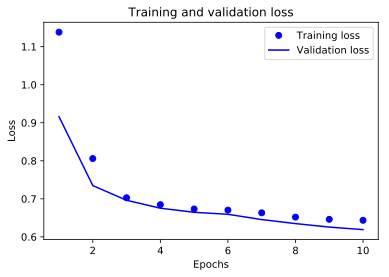

In [12]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

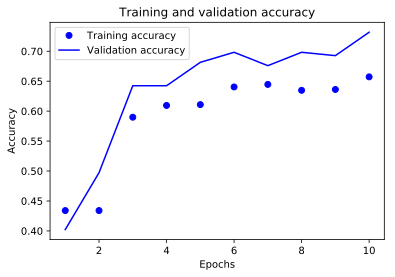

In [13]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**5，使用模型**

In [15]:
# 直接输出类别
model.predict_classes(x_test)

F:\ProgramFiles\Anaconda\lib\site-packages\keras\engine\sequential.py:271: RuntimeWarning: invalid value encountered in greater
  return (proba > 0.5).astype('int32')


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
    

**6，保存模型**

In [16]:
model.save('titanic_model.h5')

### 二，图像数据范例——Cifar2图像分类

**1，准备数据**

Cifar2数据集为Cifar10数据集的子集，只包括前两种类别airplane和automobile。

训练集有10000张airplane和automobile，测试集各有1000张airplane和automobile。

In [1]:
import os
from tqdm import tqdm
# 预定义文件夹路径
cls_dict = {'airplane':0,'automobile':1}
reverse_cls_dict = dict([x[::-1] for x in cls_dict.items()])
for cls in cls_dict:
    if not os.path.exists('cifar2_datasets/train/'+ cls):
        os.makedirs('cifar2_datasets/train/'+ cls)
    if not os.path.exists('cifar2_datasets/test/'+ cls):
        os.makedirs('cifar2_datasets/test/'+ cls)

In [2]:
import numpy as np  
#import skimage.io as io
from keras.preprocessing import image
import pickle  
# 解压缩，返回解压后的字典 
def unpickle(file):     
    with open(file, 'rb') as f:
        dic = pickle.load(f, encoding='bytes')     
    return dic   

Using TensorFlow backend.


In [77]:
# 生成训练集图片，如果需要png格式，只需要改图片后缀名即可。 
img_nums = [0,0]
for j in range(1, 6):    
    dataName = "cifar-10-batches-py/data_batch_" + str(j)    
    Xtr = unpickle(dataName)   
    print(dataName + " is loading...")    
    for i in tqdm(range(0, 10000)):        
        # Xtr['labels']为图片的标签，值范围0-9
        label = Xtr[b'labels'][i]  
        if label not in [0,1]:
            continue
        # Xtr['data']为图片二进制数据      
        img = np.reshape(Xtr[b'data'][i], (3, 32, 32))      
        # 转换成WHC格式         
        img = img.transpose(1, 2, 0)    
              
        picName = 'cifar2_datasets/train/' + \
                  reverse_cls_dict[label]+'/'+str(img_nums[label])+ '.jpg' 
        
        image.save_img(picName, img)   
        img_nums[label] = img_nums[label] + 1
print(dataName + " loaded.")  

cifar-10-batches-py/data_batch_1 is loading...


100%|███████████████████████████████████| 10000/10000 [01:05<00:00, 151.95it/s]


cifar-10-batches-py/data_batch_2 is loading...


100%|███████████████████████████████████| 10000/10000 [01:08<00:00, 144.79it/s]


cifar-10-batches-py/data_batch_3 is loading...


100%|███████████████████████████████████| 10000/10000 [01:11<00:00, 139.27it/s]


cifar-10-batches-py/data_batch_4 is loading...


100%|███████████████████████████████████| 10000/10000 [01:10<00:00, 142.20it/s]


cifar-10-batches-py/data_batch_5 is loading...


100%|███████████████████████████████████| 10000/10000 [01:15<00:00, 131.76it/s]


cifar-10-batches-py/data_batch_5 loaded.


In [49]:
print("test_batch is loading...")
# 生成测试集图片
img_nums = [0,0]
testXtr = unpickle("cifar-10-batches-py/test_batch")
for i in tqdm(range(0, 10000)):
    label = testXtr[b'labels'][i]
    if label not in [0,1]:
        continue
    img = np.reshape(testXtr[b'data'][i], (3, 32, 32))
    img = img.transpose(1, 2, 0)
    picName = 'cifar2_datasets/test/' + \
              reverse_cls_dict[label]+'/'+str(img_nums[label])+ '.jpg'
    image.save_img(picName, img)
    img_nums[label] = img_nums[label] + 1
print("test_batch loaded.")

test_batch is loading...


100%|███████████████████████████████████| 10000/10000 [01:05<00:00, 153.45it/s]


test_batch loaded.


In [3]:
train_dir = 'cifar2_datasets/train'
test_dir = 'cifar2_datasets/test'

In [10]:
from keras.preprocessing.image import ImageDataGenerator
# 对训练集数据设置数据增强
train_datagen = ImageDataGenerator(
            rescale = 1./255,
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

* rotation_range是角度值（在 0~180 范围内），表示图像随机旋转的角度范围。
* width_shift 和 height_shift 是图像在水平或垂直方向上平移的范围（相对于总宽
度或总高度的比例）。
* shear_range是随机错切变换的角度。
* zoom_range是图像随机缩放的范围。
* horizontal_flip 是随机将一半图像水平翻转。如果没有水平不对称的假设（比如真
实世界的图像），这种做法是有意义的。
* fill_mode是用于填充新创建像素的方法，这些新像素可能来自于旋转或宽度/高度平移。

In [11]:
train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size=(32, 32),
                    batch_size=20,
                    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
                    test_dir,
                    target_size=(32, 32),
                    batch_size=20,
                    class_mode='binary')

Found 10000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


Appendix: 查看数据增强图像的效果

In [99]:
from keras.preprocessing import image
import os
fnames = [os.path.join('cifar2_datasets/train/airplane', fname) for 
          fname in os.listdir('cifar2_datasets/train/airplane')]

In [100]:
from keras.preprocessing import image
from matplotlib import pyplot as plt 

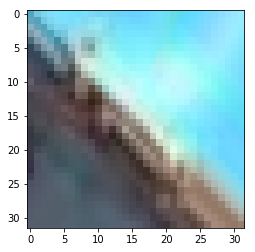

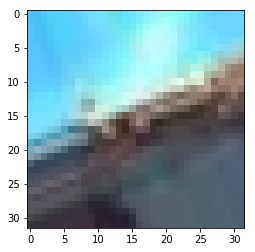

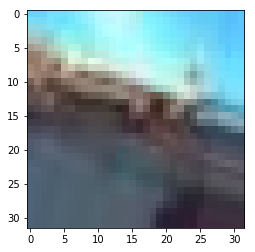

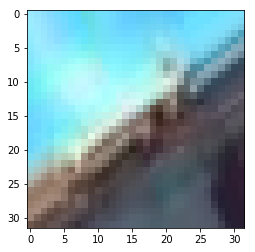

In [101]:
# 载入第3张图像
img_path = fnames[3]
img = image.load_img(img_path, target_size=(32, 32))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i  = 0
for batch in train_datagen.flow(x, batch_size=2):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
    plt.show()

**2，构建模型**

In [6]:
import keras
from keras import models
from keras import layers
from keras import optimizers
from  keras import backend as K


In [12]:
K.clear_session()
model = models.Sequential()
model.add(layers.Flatten(input_shape = (32,32,3)))
model.add(layers.Dense(60, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
            optimizer=optimizers.RMSprop(lr=1e-4),
            metrics=['acc'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 60)                184380    
_________________________________________________________________
dropout_1 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 61        
Total params: 184,441
Trainable params: 184,441
Non-trainable params: 0
_________________________________________________________________


**3，训练模型**

In [8]:
# 计算steps_per_poch
(np.ceil(100000/20),np.ceil(2000/20))

(5000.0, 100.0)

In [13]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=5000,
        epochs=5,
        validation_data= test_generator,
        validation_steps=100
        )

Epoch 1/5


 208/5000 [>.............................] - ETA: 34:22 - loss: 0.7998 - acc: 0.45 - ETA: 6:24 - loss: 0.8405 - acc: 0.4583 - ETA: 6:19 - loss: 0.8232 - acc: 0.471 - ETA: 6:09 - loss: 0.7980 - acc: 0.487 - ETA: 6:01 - loss: 0.7966 - acc: 0.483 - ETA: 6:45 - loss: 0.8178 - acc: 0.475 - ETA: 6:47 - loss: 0.8001 - acc: 0.500 - ETA: 6:38 - loss: 0.7917 - acc: 0.504 - ETA: 6:30 - loss: 0.7837 - acc: 0.511 - ETA: 6:28 - loss: 0.7896 - acc: 0.507 - ETA: 6:28 - loss: 0.7829 - acc: 0.506 - ETA: 6:26 - loss: 0.7754 - acc: 0.509 - ETA: 6:26 - loss: 0.7742 - acc: 0.508 - ETA: 6:24 - loss: 0.7701 - acc: 0.508 - ETA: 6:25 - loss: 0.7630 - acc: 0.513 - ETA: 6:26 - loss: 0.7569 - acc: 0.520 - ETA: 6:21 - loss: 0.7508 - acc: 0.523 - ETA: 6:19 - loss: 0.7462 - acc: 0.529 - ETA: 6:16 - loss: 0.7440 - acc: 0.528 - ETA: 6:14 - loss: 0.7453 - acc: 0.525 - ETA: 6:13 - loss: 0.7428 - acc: 0.534 - ETA: 6:12 - loss: 0.7379 - acc: 0.534 - ETA: 6:09 - loss: 0.7331 - acc: 0.537 - ETA: 6:10 - loss: 0.7334 - acc: 0.

 618/5000 [==>...........................] - ETA: 5:20 - loss: 0.6331 - acc: 0.637 - ETA: 5:20 - loss: 0.6332 - acc: 0.637 - ETA: 5:20 - loss: 0.6331 - acc: 0.637 - ETA: 5:19 - loss: 0.6326 - acc: 0.638 - ETA: 5:19 - loss: 0.6327 - acc: 0.637 - ETA: 5:19 - loss: 0.6324 - acc: 0.638 - ETA: 5:19 - loss: 0.6321 - acc: 0.638 - ETA: 5:18 - loss: 0.6318 - acc: 0.638 - ETA: 5:18 - loss: 0.6316 - acc: 0.638 - ETA: 5:18 - loss: 0.6318 - acc: 0.638 - ETA: 5:18 - loss: 0.6317 - acc: 0.638 - ETA: 5:18 - loss: 0.6317 - acc: 0.638 - ETA: 5:17 - loss: 0.6318 - acc: 0.638 - ETA: 5:17 - loss: 0.6316 - acc: 0.638 - ETA: 5:17 - loss: 0.6317 - acc: 0.638 - ETA: 5:17 - loss: 0.6318 - acc: 0.638 - ETA: 5:17 - loss: 0.6318 - acc: 0.638 - ETA: 5:17 - loss: 0.6317 - acc: 0.638 - ETA: 5:17 - loss: 0.6313 - acc: 0.639 - ETA: 5:16 - loss: 0.6314 - acc: 0.639 - ETA: 5:16 - loss: 0.6317 - acc: 0.639 - ETA: 5:16 - loss: 0.6315 - acc: 0.639 - ETA: 5:16 - loss: 0.6313 - acc: 0.639 - ETA: 5:16 - loss: 0.6314 - acc: 0.6

 828/5000 [===>..........................] - ETA: 5:05 - loss: 0.6207 - acc: 0.650 - ETA: 5:05 - loss: 0.6206 - acc: 0.650 - ETA: 5:05 - loss: 0.6207 - acc: 0.650 - ETA: 5:05 - loss: 0.6207 - acc: 0.650 - ETA: 5:04 - loss: 0.6208 - acc: 0.650 - ETA: 5:04 - loss: 0.6208 - acc: 0.650 - ETA: 5:04 - loss: 0.6207 - acc: 0.650 - ETA: 5:04 - loss: 0.6208 - acc: 0.650 - ETA: 5:04 - loss: 0.6208 - acc: 0.650 - ETA: 5:04 - loss: 0.6206 - acc: 0.651 - ETA: 5:04 - loss: 0.6205 - acc: 0.651 - ETA: 5:03 - loss: 0.6205 - acc: 0.651 - ETA: 5:03 - loss: 0.6203 - acc: 0.651 - ETA: 5:03 - loss: 0.6202 - acc: 0.651 - ETA: 5:03 - loss: 0.6200 - acc: 0.651 - ETA: 5:03 - loss: 0.6199 - acc: 0.651 - ETA: 5:03 - loss: 0.6198 - acc: 0.651 - ETA: 5:03 - loss: 0.6195 - acc: 0.652 - ETA: 5:03 - loss: 0.6194 - acc: 0.652 - ETA: 5:03 - loss: 0.6194 - acc: 0.652 - ETA: 5:02 - loss: 0.6195 - acc: 0.652 - ETA: 5:02 - loss: 0.6195 - acc: 0.652 - ETA: 5:02 - loss: 0.6195 - acc: 0.652 - ETA: 5:02 - loss: 0.6194 - acc: 0.6

1032/5000 [=====>........................] - ETA: 4:46 - loss: 0.6108 - acc: 0.661 - ETA: 4:46 - loss: 0.6107 - acc: 0.661 - ETA: 4:46 - loss: 0.6106 - acc: 0.661 - ETA: 4:46 - loss: 0.6104 - acc: 0.661 - ETA: 4:46 - loss: 0.6104 - acc: 0.661 - ETA: 4:45 - loss: 0.6103 - acc: 0.661 - ETA: 4:45 - loss: 0.6105 - acc: 0.661 - ETA: 4:45 - loss: 0.6106 - acc: 0.661 - ETA: 4:45 - loss: 0.6109 - acc: 0.661 - ETA: 4:45 - loss: 0.6110 - acc: 0.661 - ETA: 4:45 - loss: 0.6109 - acc: 0.661 - ETA: 4:45 - loss: 0.6110 - acc: 0.661 - ETA: 4:45 - loss: 0.6109 - acc: 0.661 - ETA: 4:45 - loss: 0.6109 - acc: 0.661 - ETA: 4:45 - loss: 0.6109 - acc: 0.662 - ETA: 4:45 - loss: 0.6108 - acc: 0.662 - ETA: 4:44 - loss: 0.6107 - acc: 0.662 - ETA: 4:44 - loss: 0.6106 - acc: 0.662 - ETA: 4:44 - loss: 0.6104 - acc: 0.662 - ETA: 4:44 - loss: 0.6104 - acc: 0.662 - ETA: 4:44 - loss: 0.6103 - acc: 0.662 - ETA: 4:44 - loss: 0.6104 - acc: 0.662 - ETA: 4:44 - loss: 0.6104 - acc: 0.662 - ETA: 4:44 - loss: 0.6104 - acc: 0.6

1237/5000 [======>.......................] - ETA: 4:29 - loss: 0.6046 - acc: 0.668 - ETA: 4:29 - loss: 0.6046 - acc: 0.668 - ETA: 4:29 - loss: 0.6044 - acc: 0.669 - ETA: 4:29 - loss: 0.6043 - acc: 0.669 - ETA: 4:28 - loss: 0.6043 - acc: 0.669 - ETA: 4:28 - loss: 0.6043 - acc: 0.669 - ETA: 4:28 - loss: 0.6042 - acc: 0.669 - ETA: 4:28 - loss: 0.6042 - acc: 0.669 - ETA: 4:28 - loss: 0.6041 - acc: 0.669 - ETA: 4:28 - loss: 0.6040 - acc: 0.669 - ETA: 4:28 - loss: 0.6040 - acc: 0.669 - ETA: 4:28 - loss: 0.6040 - acc: 0.669 - ETA: 4:28 - loss: 0.6040 - acc: 0.668 - ETA: 4:28 - loss: 0.6041 - acc: 0.668 - ETA: 4:28 - loss: 0.6040 - acc: 0.668 - ETA: 4:28 - loss: 0.6040 - acc: 0.668 - ETA: 4:27 - loss: 0.6040 - acc: 0.668 - ETA: 4:27 - loss: 0.6040 - acc: 0.668 - ETA: 4:27 - loss: 0.6039 - acc: 0.668 - ETA: 4:27 - loss: 0.6039 - acc: 0.668 - ETA: 4:27 - loss: 0.6038 - acc: 0.668 - ETA: 4:27 - loss: 0.6037 - acc: 0.668 - ETA: 4:27 - loss: 0.6038 - acc: 0.668 - ETA: 4:27 - loss: 0.6038 - acc: 0.6

1441/5000 [=======>......................] - ETA: 4:18 - loss: 0.5965 - acc: 0.675 - ETA: 4:18 - loss: 0.5965 - acc: 0.675 - ETA: 4:17 - loss: 0.5965 - acc: 0.675 - ETA: 4:17 - loss: 0.5965 - acc: 0.675 - ETA: 4:17 - loss: 0.5964 - acc: 0.675 - ETA: 4:17 - loss: 0.5964 - acc: 0.675 - ETA: 4:17 - loss: 0.5963 - acc: 0.675 - ETA: 4:17 - loss: 0.5962 - acc: 0.675 - ETA: 4:17 - loss: 0.5963 - acc: 0.675 - ETA: 4:17 - loss: 0.5963 - acc: 0.675 - ETA: 4:17 - loss: 0.5963 - acc: 0.675 - ETA: 4:17 - loss: 0.5962 - acc: 0.675 - ETA: 4:17 - loss: 0.5962 - acc: 0.675 - ETA: 4:17 - loss: 0.5962 - acc: 0.675 - ETA: 4:16 - loss: 0.5960 - acc: 0.675 - ETA: 4:16 - loss: 0.5959 - acc: 0.675 - ETA: 4:16 - loss: 0.5959 - acc: 0.675 - ETA: 4:16 - loss: 0.5959 - acc: 0.675 - ETA: 4:16 - loss: 0.5959 - acc: 0.675 - ETA: 4:16 - loss: 0.5959 - acc: 0.675 - ETA: 4:16 - loss: 0.5958 - acc: 0.675 - ETA: 4:16 - loss: 0.5958 - acc: 0.675 - ETA: 4:16 - loss: 0.5959 - acc: 0.675 - ETA: 4:16 - loss: 0.5958 - acc: 0.6

1647/5000 [========>.....................] - ETA: 4:04 - loss: 0.5919 - acc: 0.680 - ETA: 4:04 - loss: 0.5918 - acc: 0.680 - ETA: 4:04 - loss: 0.5917 - acc: 0.680 - ETA: 4:04 - loss: 0.5916 - acc: 0.680 - ETA: 4:03 - loss: 0.5916 - acc: 0.680 - ETA: 4:03 - loss: 0.5916 - acc: 0.680 - ETA: 4:03 - loss: 0.5916 - acc: 0.680 - ETA: 4:03 - loss: 0.5916 - acc: 0.680 - ETA: 4:03 - loss: 0.5915 - acc: 0.680 - ETA: 4:03 - loss: 0.5915 - acc: 0.680 - ETA: 4:03 - loss: 0.5915 - acc: 0.680 - ETA: 4:03 - loss: 0.5915 - acc: 0.680 - ETA: 4:03 - loss: 0.5914 - acc: 0.680 - ETA: 4:03 - loss: 0.5915 - acc: 0.680 - ETA: 4:03 - loss: 0.5914 - acc: 0.680 - ETA: 4:02 - loss: 0.5913 - acc: 0.681 - ETA: 4:02 - loss: 0.5912 - acc: 0.681 - ETA: 4:02 - loss: 0.5911 - acc: 0.681 - ETA: 4:02 - loss: 0.5912 - acc: 0.681 - ETA: 4:02 - loss: 0.5911 - acc: 0.681 - ETA: 4:02 - loss: 0.5909 - acc: 0.681 - ETA: 4:02 - loss: 0.5909 - acc: 0.681 - ETA: 4:02 - loss: 0.5908 - acc: 0.681 - ETA: 4:02 - loss: 0.5908 - acc: 0.6

1853/5000 [==========>...................] - ETA: 3:47 - loss: 0.5865 - acc: 0.684 - ETA: 3:47 - loss: 0.5865 - acc: 0.684 - ETA: 3:47 - loss: 0.5864 - acc: 0.684 - ETA: 3:46 - loss: 0.5864 - acc: 0.684 - ETA: 3:46 - loss: 0.5864 - acc: 0.684 - ETA: 3:46 - loss: 0.5863 - acc: 0.684 - ETA: 3:46 - loss: 0.5862 - acc: 0.684 - ETA: 3:46 - loss: 0.5863 - acc: 0.684 - ETA: 3:46 - loss: 0.5863 - acc: 0.684 - ETA: 3:46 - loss: 0.5861 - acc: 0.684 - ETA: 3:46 - loss: 0.5861 - acc: 0.684 - ETA: 3:46 - loss: 0.5861 - acc: 0.684 - ETA: 3:46 - loss: 0.5860 - acc: 0.684 - ETA: 3:46 - loss: 0.5859 - acc: 0.684 - ETA: 3:46 - loss: 0.5859 - acc: 0.684 - ETA: 3:45 - loss: 0.5858 - acc: 0.684 - ETA: 3:45 - loss: 0.5858 - acc: 0.684 - ETA: 3:45 - loss: 0.5858 - acc: 0.684 - ETA: 3:45 - loss: 0.5859 - acc: 0.684 - ETA: 3:45 - loss: 0.5861 - acc: 0.684 - ETA: 3:45 - loss: 0.5860 - acc: 0.684 - ETA: 3:45 - loss: 0.5860 - acc: 0.684 - ETA: 3:45 - loss: 0.5860 - acc: 0.684 - ETA: 3:45 - loss: 0.5860 - acc: 0.6

2059/5000 [===========>..................] - ETA: 3:32 - loss: 0.5821 - acc: 0.687 - ETA: 3:32 - loss: 0.5821 - acc: 0.687 - ETA: 3:31 - loss: 0.5821 - acc: 0.687 - ETA: 3:31 - loss: 0.5821 - acc: 0.687 - ETA: 3:31 - loss: 0.5820 - acc: 0.687 - ETA: 3:31 - loss: 0.5819 - acc: 0.687 - ETA: 3:31 - loss: 0.5818 - acc: 0.687 - ETA: 3:31 - loss: 0.5818 - acc: 0.687 - ETA: 3:31 - loss: 0.5817 - acc: 0.687 - ETA: 3:31 - loss: 0.5817 - acc: 0.687 - ETA: 3:31 - loss: 0.5817 - acc: 0.687 - ETA: 3:31 - loss: 0.5816 - acc: 0.687 - ETA: 3:31 - loss: 0.5816 - acc: 0.687 - ETA: 3:31 - loss: 0.5816 - acc: 0.687 - ETA: 3:30 - loss: 0.5817 - acc: 0.687 - ETA: 3:30 - loss: 0.5816 - acc: 0.687 - ETA: 3:30 - loss: 0.5817 - acc: 0.687 - ETA: 3:30 - loss: 0.5816 - acc: 0.687 - ETA: 3:30 - loss: 0.5817 - acc: 0.687 - ETA: 3:30 - loss: 0.5817 - acc: 0.687 - ETA: 3:30 - loss: 0.5816 - acc: 0.687 - ETA: 3:30 - loss: 0.5816 - acc: 0.687 - ETA: 3:30 - loss: 0.5815 - acc: 0.687 - ETA: 3:30 - loss: 0.5815 - acc: 0.6

2263/5000 [============>.................] - ETA: 3:18 - loss: 0.5788 - acc: 0.689 - ETA: 3:18 - loss: 0.5788 - acc: 0.689 - ETA: 3:18 - loss: 0.5788 - acc: 0.689 - ETA: 3:17 - loss: 0.5788 - acc: 0.689 - ETA: 3:17 - loss: 0.5787 - acc: 0.689 - ETA: 3:17 - loss: 0.5787 - acc: 0.690 - ETA: 3:17 - loss: 0.5788 - acc: 0.689 - ETA: 3:17 - loss: 0.5787 - acc: 0.689 - ETA: 3:17 - loss: 0.5788 - acc: 0.689 - ETA: 3:17 - loss: 0.5788 - acc: 0.689 - ETA: 3:17 - loss: 0.5788 - acc: 0.689 - ETA: 3:17 - loss: 0.5788 - acc: 0.689 - ETA: 3:17 - loss: 0.5789 - acc: 0.689 - ETA: 3:17 - loss: 0.5789 - acc: 0.690 - ETA: 3:17 - loss: 0.5788 - acc: 0.690 - ETA: 3:16 - loss: 0.5788 - acc: 0.690 - ETA: 3:16 - loss: 0.5788 - acc: 0.690 - ETA: 3:16 - loss: 0.5788 - acc: 0.690 - ETA: 3:16 - loss: 0.5787 - acc: 0.690 - ETA: 3:16 - loss: 0.5787 - acc: 0.690 - ETA: 3:16 - loss: 0.5786 - acc: 0.690 - ETA: 3:16 - loss: 0.5786 - acc: 0.690 - ETA: 3:16 - loss: 0.5786 - acc: 0.690 - ETA: 3:16 - loss: 0.5785 - acc: 0.6

2469/5000 [=============>................] - ETA: 3:05 - loss: 0.5747 - acc: 0.692 - ETA: 3:05 - loss: 0.5746 - acc: 0.692 - ETA: 3:05 - loss: 0.5746 - acc: 0.692 - ETA: 3:05 - loss: 0.5746 - acc: 0.692 - ETA: 3:05 - loss: 0.5746 - acc: 0.692 - ETA: 3:05 - loss: 0.5746 - acc: 0.692 - ETA: 3:05 - loss: 0.5747 - acc: 0.692 - ETA: 3:05 - loss: 0.5747 - acc: 0.692 - ETA: 3:05 - loss: 0.5747 - acc: 0.692 - ETA: 3:05 - loss: 0.5746 - acc: 0.692 - ETA: 3:05 - loss: 0.5746 - acc: 0.692 - ETA: 3:05 - loss: 0.5746 - acc: 0.692 - ETA: 3:05 - loss: 0.5746 - acc: 0.692 - ETA: 3:05 - loss: 0.5745 - acc: 0.693 - ETA: 3:05 - loss: 0.5745 - acc: 0.693 - ETA: 3:04 - loss: 0.5744 - acc: 0.693 - ETA: 3:04 - loss: 0.5744 - acc: 0.693 - ETA: 3:04 - loss: 0.5744 - acc: 0.693 - ETA: 3:04 - loss: 0.5743 - acc: 0.693 - ETA: 3:04 - loss: 0.5743 - acc: 0.693 - ETA: 3:04 - loss: 0.5743 - acc: 0.693 - ETA: 3:04 - loss: 0.5742 - acc: 0.693 - ETA: 3:04 - loss: 0.5742 - acc: 0.693 - ETA: 3:04 - loss: 0.5742 - acc: 0.6

2675/5000 [===============>..............] - ETA: 2:53 - loss: 0.5716 - acc: 0.695 - ETA: 2:52 - loss: 0.5715 - acc: 0.695 - ETA: 2:52 - loss: 0.5716 - acc: 0.695 - ETA: 2:52 - loss: 0.5716 - acc: 0.695 - ETA: 2:52 - loss: 0.5716 - acc: 0.695 - ETA: 2:52 - loss: 0.5716 - acc: 0.695 - ETA: 2:52 - loss: 0.5716 - acc: 0.695 - ETA: 2:52 - loss: 0.5716 - acc: 0.695 - ETA: 2:52 - loss: 0.5716 - acc: 0.695 - ETA: 2:52 - loss: 0.5716 - acc: 0.695 - ETA: 2:52 - loss: 0.5715 - acc: 0.695 - ETA: 2:52 - loss: 0.5715 - acc: 0.695 - ETA: 2:52 - loss: 0.5715 - acc: 0.695 - ETA: 2:52 - loss: 0.5715 - acc: 0.695 - ETA: 2:52 - loss: 0.5714 - acc: 0.695 - ETA: 2:52 - loss: 0.5715 - acc: 0.695 - ETA: 2:52 - loss: 0.5715 - acc: 0.695 - ETA: 2:52 - loss: 0.5715 - acc: 0.695 - ETA: 2:52 - loss: 0.5715 - acc: 0.695 - ETA: 2:51 - loss: 0.5715 - acc: 0.695 - ETA: 2:51 - loss: 0.5715 - acc: 0.695 - ETA: 2:51 - loss: 0.5714 - acc: 0.695 - ETA: 2:51 - loss: 0.5715 - acc: 0.695 - ETA: 2:51 - loss: 0.5715 - acc: 0.6

2894/5000 [================>.............] - ETA: 2:38 - loss: 0.5694 - acc: 0.697 - ETA: 2:38 - loss: 0.5694 - acc: 0.697 - ETA: 2:38 - loss: 0.5694 - acc: 0.697 - ETA: 2:38 - loss: 0.5693 - acc: 0.697 - ETA: 2:38 - loss: 0.5693 - acc: 0.697 - ETA: 2:38 - loss: 0.5692 - acc: 0.697 - ETA: 2:38 - loss: 0.5692 - acc: 0.697 - ETA: 2:38 - loss: 0.5692 - acc: 0.697 - ETA: 2:37 - loss: 0.5693 - acc: 0.697 - ETA: 2:37 - loss: 0.5693 - acc: 0.697 - ETA: 2:37 - loss: 0.5693 - acc: 0.697 - ETA: 2:37 - loss: 0.5692 - acc: 0.697 - ETA: 2:37 - loss: 0.5692 - acc: 0.697 - ETA: 2:37 - loss: 0.5692 - acc: 0.697 - ETA: 2:37 - loss: 0.5692 - acc: 0.697 - ETA: 2:37 - loss: 0.5691 - acc: 0.697 - ETA: 2:37 - loss: 0.5691 - acc: 0.697 - ETA: 2:37 - loss: 0.5690 - acc: 0.697 - ETA: 2:37 - loss: 0.5690 - acc: 0.697 - ETA: 2:37 - loss: 0.5690 - acc: 0.697 - ETA: 2:36 - loss: 0.5689 - acc: 0.697 - ETA: 2:36 - loss: 0.5690 - acc: 0.697 - ETA: 2:36 - loss: 0.5690 - acc: 0.697 - ETA: 2:36 - loss: 0.5689 - acc: 0.6

3102/5000 [=================>............] - ETA: 2:22 - loss: 0.5668 - acc: 0.699 - ETA: 2:22 - loss: 0.5668 - acc: 0.699 - ETA: 2:22 - loss: 0.5668 - acc: 0.699 - ETA: 2:22 - loss: 0.5668 - acc: 0.699 - ETA: 2:21 - loss: 0.5668 - acc: 0.699 - ETA: 2:21 - loss: 0.5667 - acc: 0.699 - ETA: 2:21 - loss: 0.5667 - acc: 0.699 - ETA: 2:21 - loss: 0.5667 - acc: 0.699 - ETA: 2:21 - loss: 0.5667 - acc: 0.699 - ETA: 2:21 - loss: 0.5667 - acc: 0.699 - ETA: 2:21 - loss: 0.5666 - acc: 0.699 - ETA: 2:21 - loss: 0.5666 - acc: 0.699 - ETA: 2:21 - loss: 0.5666 - acc: 0.699 - ETA: 2:21 - loss: 0.5666 - acc: 0.699 - ETA: 2:21 - loss: 0.5666 - acc: 0.699 - ETA: 2:21 - loss: 0.5666 - acc: 0.699 - ETA: 2:20 - loss: 0.5666 - acc: 0.699 - ETA: 2:20 - loss: 0.5666 - acc: 0.699 - ETA: 2:20 - loss: 0.5665 - acc: 0.699 - ETA: 2:20 - loss: 0.5666 - acc: 0.699 - ETA: 2:20 - loss: 0.5665 - acc: 0.699 - ETA: 2:20 - loss: 0.5665 - acc: 0.699 - ETA: 2:20 - loss: 0.5665 - acc: 0.699 - ETA: 2:20 - loss: 0.5664 - acc: 0.6

3311/5000 [==================>...........] - ETA: 2:07 - loss: 0.5637 - acc: 0.702 - ETA: 2:07 - loss: 0.5637 - acc: 0.702 - ETA: 2:07 - loss: 0.5636 - acc: 0.702 - ETA: 2:07 - loss: 0.5637 - acc: 0.702 - ETA: 2:07 - loss: 0.5637 - acc: 0.702 - ETA: 2:07 - loss: 0.5637 - acc: 0.702 - ETA: 2:07 - loss: 0.5637 - acc: 0.702 - ETA: 2:07 - loss: 0.5636 - acc: 0.702 - ETA: 2:07 - loss: 0.5635 - acc: 0.702 - ETA: 2:06 - loss: 0.5635 - acc: 0.702 - ETA: 2:06 - loss: 0.5635 - acc: 0.702 - ETA: 2:06 - loss: 0.5634 - acc: 0.702 - ETA: 2:06 - loss: 0.5634 - acc: 0.702 - ETA: 2:06 - loss: 0.5634 - acc: 0.702 - ETA: 2:06 - loss: 0.5635 - acc: 0.702 - ETA: 2:06 - loss: 0.5634 - acc: 0.702 - ETA: 2:06 - loss: 0.5634 - acc: 0.702 - ETA: 2:06 - loss: 0.5634 - acc: 0.702 - ETA: 2:06 - loss: 0.5634 - acc: 0.702 - ETA: 2:06 - loss: 0.5635 - acc: 0.702 - ETA: 2:06 - loss: 0.5635 - acc: 0.702 - ETA: 2:06 - loss: 0.5635 - acc: 0.702 - ETA: 2:05 - loss: 0.5634 - acc: 0.702 - ETA: 2:05 - loss: 0.5634 - acc: 0.7

3520/5000 [====================>.........] - ETA: 1:52 - loss: 0.5614 - acc: 0.704 - ETA: 1:52 - loss: 0.5615 - acc: 0.704 - ETA: 1:52 - loss: 0.5615 - acc: 0.704 - ETA: 1:52 - loss: 0.5615 - acc: 0.704 - ETA: 1:52 - loss: 0.5615 - acc: 0.704 - ETA: 1:52 - loss: 0.5614 - acc: 0.704 - ETA: 1:52 - loss: 0.5614 - acc: 0.704 - ETA: 1:52 - loss: 0.5614 - acc: 0.704 - ETA: 1:52 - loss: 0.5613 - acc: 0.704 - ETA: 1:52 - loss: 0.5614 - acc: 0.704 - ETA: 1:51 - loss: 0.5613 - acc: 0.704 - ETA: 1:51 - loss: 0.5612 - acc: 0.704 - ETA: 1:51 - loss: 0.5612 - acc: 0.704 - ETA: 1:51 - loss: 0.5613 - acc: 0.704 - ETA: 1:51 - loss: 0.5612 - acc: 0.704 - ETA: 1:51 - loss: 0.5612 - acc: 0.704 - ETA: 1:51 - loss: 0.5612 - acc: 0.704 - ETA: 1:51 - loss: 0.5612 - acc: 0.704 - ETA: 1:51 - loss: 0.5612 - acc: 0.704 - ETA: 1:51 - loss: 0.5612 - acc: 0.704 - ETA: 1:51 - loss: 0.5613 - acc: 0.704 - ETA: 1:51 - loss: 0.5613 - acc: 0.704 - ETA: 1:50 - loss: 0.5614 - acc: 0.704 - ETA: 1:50 - loss: 0.5613 - acc: 0.7

3737/5000 [=====================>........] - ETA: 1:37 - loss: 0.5594 - acc: 0.706 - ETA: 1:37 - loss: 0.5594 - acc: 0.706 - ETA: 1:37 - loss: 0.5593 - acc: 0.706 - ETA: 1:37 - loss: 0.5593 - acc: 0.706 - ETA: 1:37 - loss: 0.5592 - acc: 0.706 - ETA: 1:37 - loss: 0.5592 - acc: 0.706 - ETA: 1:37 - loss: 0.5591 - acc: 0.706 - ETA: 1:37 - loss: 0.5591 - acc: 0.706 - ETA: 1:37 - loss: 0.5590 - acc: 0.706 - ETA: 1:37 - loss: 0.5591 - acc: 0.706 - ETA: 1:37 - loss: 0.5591 - acc: 0.706 - ETA: 1:37 - loss: 0.5592 - acc: 0.706 - ETA: 1:36 - loss: 0.5592 - acc: 0.706 - ETA: 1:36 - loss: 0.5591 - acc: 0.706 - ETA: 1:36 - loss: 0.5591 - acc: 0.706 - ETA: 1:36 - loss: 0.5592 - acc: 0.706 - ETA: 1:36 - loss: 0.5592 - acc: 0.706 - ETA: 1:36 - loss: 0.5593 - acc: 0.706 - ETA: 1:36 - loss: 0.5592 - acc: 0.706 - ETA: 1:36 - loss: 0.5592 - acc: 0.706 - ETA: 1:36 - loss: 0.5591 - acc: 0.706 - ETA: 1:36 - loss: 0.5592 - acc: 0.706 - ETA: 1:36 - loss: 0.5591 - acc: 0.706 - ETA: 1:36 - loss: 0.5591 - acc: 0.7

3947/5000 [======================>.......] - ETA: 1:22 - loss: 0.5582 - acc: 0.707 - ETA: 1:22 - loss: 0.5582 - acc: 0.707 - ETA: 1:22 - loss: 0.5582 - acc: 0.707 - ETA: 1:22 - loss: 0.5582 - acc: 0.707 - ETA: 1:22 - loss: 0.5582 - acc: 0.707 - ETA: 1:22 - loss: 0.5581 - acc: 0.707 - ETA: 1:22 - loss: 0.5581 - acc: 0.707 - ETA: 1:22 - loss: 0.5581 - acc: 0.707 - ETA: 1:22 - loss: 0.5581 - acc: 0.707 - ETA: 1:22 - loss: 0.5581 - acc: 0.707 - ETA: 1:22 - loss: 0.5580 - acc: 0.707 - ETA: 1:22 - loss: 0.5580 - acc: 0.707 - ETA: 1:22 - loss: 0.5580 - acc: 0.707 - ETA: 1:22 - loss: 0.5581 - acc: 0.707 - ETA: 1:21 - loss: 0.5581 - acc: 0.707 - ETA: 1:21 - loss: 0.5581 - acc: 0.707 - ETA: 1:21 - loss: 0.5581 - acc: 0.707 - ETA: 1:21 - loss: 0.5581 - acc: 0.707 - ETA: 1:21 - loss: 0.5581 - acc: 0.707 - ETA: 1:21 - loss: 0.5580 - acc: 0.707 - ETA: 1:21 - loss: 0.5580 - acc: 0.707 - ETA: 1:21 - loss: 0.5580 - acc: 0.707 - ETA: 1:21 - loss: 0.5580 - acc: 0.707 - ETA: 1:21 - loss: 0.5580 - acc: 0.7

4164/5000 [=======================>......] - ETA: 1:08 - loss: 0.5561 - acc: 0.709 - ETA: 1:08 - loss: 0.5561 - acc: 0.709 - ETA: 1:08 - loss: 0.5561 - acc: 0.709 - ETA: 1:08 - loss: 0.5561 - acc: 0.709 - ETA: 1:08 - loss: 0.5560 - acc: 0.709 - ETA: 1:08 - loss: 0.5560 - acc: 0.709 - ETA: 1:08 - loss: 0.5560 - acc: 0.709 - ETA: 1:08 - loss: 0.5559 - acc: 0.709 - ETA: 1:08 - loss: 0.5559 - acc: 0.709 - ETA: 1:08 - loss: 0.5559 - acc: 0.709 - ETA: 1:07 - loss: 0.5559 - acc: 0.709 - ETA: 1:07 - loss: 0.5559 - acc: 0.709 - ETA: 1:07 - loss: 0.5558 - acc: 0.709 - ETA: 1:07 - loss: 0.5558 - acc: 0.709 - ETA: 1:07 - loss: 0.5558 - acc: 0.709 - ETA: 1:07 - loss: 0.5558 - acc: 0.709 - ETA: 1:07 - loss: 0.5558 - acc: 0.709 - ETA: 1:07 - loss: 0.5558 - acc: 0.709 - ETA: 1:07 - loss: 0.5558 - acc: 0.709 - ETA: 1:07 - loss: 0.5558 - acc: 0.709 - ETA: 1:07 - loss: 0.5558 - acc: 0.709 - ETA: 1:07 - loss: 0.5557 - acc: 0.709 - ETA: 1:07 - loss: 0.5557 - acc: 0.709 - ETA: 1:07 - loss: 0.5557 - acc: 0.7

4385/5000 [=========================>....] - ETA: 54s - loss: 0.5541 - acc: 0.71 - ETA: 54s - loss: 0.5541 - acc: 0.71 - ETA: 54s - loss: 0.5540 - acc: 0.71 - ETA: 54s - loss: 0.5540 - acc: 0.71 - ETA: 54s - loss: 0.5540 - acc: 0.71 - ETA: 53s - loss: 0.5540 - acc: 0.71 - ETA: 53s - loss: 0.5540 - acc: 0.71 - ETA: 53s - loss: 0.5540 - acc: 0.71 - ETA: 53s - loss: 0.5540 - acc: 0.71 - ETA: 53s - loss: 0.5540 - acc: 0.71 - ETA: 53s - loss: 0.5540 - acc: 0.71 - ETA: 53s - loss: 0.5541 - acc: 0.71 - ETA: 53s - loss: 0.5541 - acc: 0.71 - ETA: 53s - loss: 0.5541 - acc: 0.71 - ETA: 53s - loss: 0.5540 - acc: 0.71 - ETA: 53s - loss: 0.5540 - acc: 0.71 - ETA: 53s - loss: 0.5540 - acc: 0.71 - ETA: 53s - loss: 0.5539 - acc: 0.71 - ETA: 53s - loss: 0.5540 - acc: 0.71 - ETA: 53s - loss: 0.5539 - acc: 0.71 - ETA: 52s - loss: 0.5539 - acc: 0.71 - ETA: 52s - loss: 0.5539 - acc: 0.71 - ETA: 52s - loss: 0.5539 - acc: 0.71 - ETA: 52s - loss: 0.5539 - acc: 0.71 - ETA: 52s - loss: 0.5539 - acc: 0.71 - ETA: 

4604/5000 [==========================>...] - ETA: 39s - loss: 0.5519 - acc: 0.71 - ETA: 39s - loss: 0.5519 - acc: 0.71 - ETA: 39s - loss: 0.5519 - acc: 0.71 - ETA: 39s - loss: 0.5519 - acc: 0.71 - ETA: 39s - loss: 0.5519 - acc: 0.71 - ETA: 39s - loss: 0.5519 - acc: 0.71 - ETA: 39s - loss: 0.5518 - acc: 0.71 - ETA: 39s - loss: 0.5518 - acc: 0.71 - ETA: 39s - loss: 0.5518 - acc: 0.71 - ETA: 39s - loss: 0.5518 - acc: 0.71 - ETA: 39s - loss: 0.5518 - acc: 0.71 - ETA: 38s - loss: 0.5518 - acc: 0.71 - ETA: 38s - loss: 0.5518 - acc: 0.71 - ETA: 38s - loss: 0.5518 - acc: 0.71 - ETA: 38s - loss: 0.5517 - acc: 0.71 - ETA: 38s - loss: 0.5517 - acc: 0.71 - ETA: 38s - loss: 0.5517 - acc: 0.71 - ETA: 38s - loss: 0.5516 - acc: 0.71 - ETA: 38s - loss: 0.5517 - acc: 0.71 - ETA: 38s - loss: 0.5517 - acc: 0.71 - ETA: 38s - loss: 0.5517 - acc: 0.71 - ETA: 38s - loss: 0.5517 - acc: 0.71 - ETA: 38s - loss: 0.5517 - acc: 0.71 - ETA: 38s - loss: 0.5517 - acc: 0.71 - ETA: 38s - loss: 0.5516 - acc: 0.71 - ETA: 

4824/5000 [===========================>..] - ETA: 25s - loss: 0.5501 - acc: 0.71 - ETA: 25s - loss: 0.5502 - acc: 0.71 - ETA: 25s - loss: 0.5502 - acc: 0.71 - ETA: 25s - loss: 0.5502 - acc: 0.71 - ETA: 25s - loss: 0.5502 - acc: 0.71 - ETA: 25s - loss: 0.5502 - acc: 0.71 - ETA: 25s - loss: 0.5502 - acc: 0.71 - ETA: 25s - loss: 0.5502 - acc: 0.71 - ETA: 24s - loss: 0.5502 - acc: 0.71 - ETA: 24s - loss: 0.5501 - acc: 0.71 - ETA: 24s - loss: 0.5501 - acc: 0.71 - ETA: 24s - loss: 0.5501 - acc: 0.71 - ETA: 24s - loss: 0.5501 - acc: 0.71 - ETA: 24s - loss: 0.5501 - acc: 0.71 - ETA: 24s - loss: 0.5501 - acc: 0.71 - ETA: 24s - loss: 0.5501 - acc: 0.71 - ETA: 24s - loss: 0.5501 - acc: 0.71 - ETA: 24s - loss: 0.5501 - acc: 0.71 - ETA: 24s - loss: 0.5500 - acc: 0.71 - ETA: 24s - loss: 0.5500 - acc: 0.71 - ETA: 24s - loss: 0.5500 - acc: 0.71 - ETA: 24s - loss: 0.5500 - acc: 0.71 - ETA: 23s - loss: 0.5500 - acc: 0.71 - ETA: 23s - loss: 0.5500 - acc: 0.71 - ETA: 23s - loss: 0.5500 - acc: 0.71 - ETA: 

5000/5000 [==============================] - ETA: 11s - loss: 0.5488 - acc: 0.71 - ETA: 11s - loss: 0.5488 - acc: 0.71 - ETA: 11s - loss: 0.5488 - acc: 0.71 - ETA: 11s - loss: 0.5488 - acc: 0.71 - ETA: 11s - loss: 0.5488 - acc: 0.71 - ETA: 10s - loss: 0.5488 - acc: 0.71 - ETA: 10s - loss: 0.5488 - acc: 0.71 - ETA: 10s - loss: 0.5488 - acc: 0.71 - ETA: 10s - loss: 0.5488 - acc: 0.71 - ETA: 10s - loss: 0.5488 - acc: 0.71 - ETA: 10s - loss: 0.5488 - acc: 0.71 - ETA: 10s - loss: 0.5488 - acc: 0.71 - ETA: 10s - loss: 0.5489 - acc: 0.71 - ETA: 10s - loss: 0.5488 - acc: 0.71 - ETA: 10s - loss: 0.5488 - acc: 0.71 - ETA: 10s - loss: 0.5488 - acc: 0.71 - ETA: 10s - loss: 0.5488 - acc: 0.71 - ETA: 10s - loss: 0.5488 - acc: 0.71 - ETA: 10s - loss: 0.5488 - acc: 0.71 - ETA: 10s - loss: 0.5488 - acc: 0.71 - ETA: 9s - loss: 0.5487 - acc: 0.7162 - ETA: 9s - loss: 0.5487 - acc: 0.716 - ETA: 9s - loss: 0.5487 - acc: 0.716 - ETA: 9s - loss: 0.5487 - acc: 0.716 - ETA: 9s - loss: 0.5486 - acc: 0.716 - ETA:

 225/5000 [>.............................] - ETA: 50s - loss: 0.4739 - acc: 0.70 - ETA: 33s - loss: 0.5109 - acc: 0.71 - ETA: 49s - loss: 0.5126 - acc: 0.72 - ETA: 1:16 - loss: 0.5072 - acc: 0.734 - ETA: 1:36 - loss: 0.5238 - acc: 0.725 - ETA: 1:53 - loss: 0.5280 - acc: 0.723 - ETA: 2:07 - loss: 0.5318 - acc: 0.712 - ETA: 2:18 - loss: 0.5313 - acc: 0.705 - ETA: 2:29 - loss: 0.5295 - acc: 0.710 - ETA: 2:34 - loss: 0.5362 - acc: 0.707 - ETA: 2:43 - loss: 0.5346 - acc: 0.711 - ETA: 2:48 - loss: 0.5316 - acc: 0.715 - ETA: 2:54 - loss: 0.5280 - acc: 0.729 - ETA: 3:01 - loss: 0.5340 - acc: 0.726 - ETA: 3:06 - loss: 0.5288 - acc: 0.732 - ETA: 3:10 - loss: 0.5266 - acc: 0.738 - ETA: 3:14 - loss: 0.5271 - acc: 0.742 - ETA: 3:17 - loss: 0.5257 - acc: 0.746 - ETA: 3:21 - loss: 0.5259 - acc: 0.741 - ETA: 3:25 - loss: 0.5221 - acc: 0.746 - ETA: 3:27 - loss: 0.5250 - acc: 0.746 - ETA: 3:30 - loss: 0.5364 - acc: 0.737 - ETA: 3:33 - loss: 0.5326 - acc: 0.741 - ETA: 3:35 - loss: 0.5297 - acc: 0.741 - E

 635/5000 [==>...........................] - ETA: 4:56 - loss: 0.5167 - acc: 0.742 - ETA: 4:56 - loss: 0.5164 - acc: 0.742 - ETA: 4:56 - loss: 0.5165 - acc: 0.742 - ETA: 4:56 - loss: 0.5165 - acc: 0.742 - ETA: 4:55 - loss: 0.5164 - acc: 0.742 - ETA: 4:56 - loss: 0.5163 - acc: 0.741 - ETA: 4:56 - loss: 0.5164 - acc: 0.741 - ETA: 4:56 - loss: 0.5164 - acc: 0.742 - ETA: 4:56 - loss: 0.5166 - acc: 0.741 - ETA: 4:56 - loss: 0.5166 - acc: 0.741 - ETA: 4:55 - loss: 0.5163 - acc: 0.742 - ETA: 4:55 - loss: 0.5162 - acc: 0.742 - ETA: 4:55 - loss: 0.5161 - acc: 0.741 - ETA: 4:55 - loss: 0.5162 - acc: 0.741 - ETA: 4:55 - loss: 0.5161 - acc: 0.741 - ETA: 4:55 - loss: 0.5165 - acc: 0.741 - ETA: 4:55 - loss: 0.5163 - acc: 0.741 - ETA: 4:55 - loss: 0.5164 - acc: 0.741 - ETA: 4:54 - loss: 0.5160 - acc: 0.741 - ETA: 4:54 - loss: 0.5165 - acc: 0.741 - ETA: 4:54 - loss: 0.5164 - acc: 0.741 - ETA: 4:54 - loss: 0.5162 - acc: 0.741 - ETA: 4:54 - loss: 0.5158 - acc: 0.742 - ETA: 4:54 - loss: 0.5155 - acc: 0.7

 841/5000 [====>.........................] - ETA: 4:42 - loss: 0.5139 - acc: 0.746 - ETA: 4:42 - loss: 0.5141 - acc: 0.746 - ETA: 4:42 - loss: 0.5143 - acc: 0.746 - ETA: 4:42 - loss: 0.5142 - acc: 0.746 - ETA: 4:42 - loss: 0.5143 - acc: 0.746 - ETA: 4:41 - loss: 0.5140 - acc: 0.746 - ETA: 4:41 - loss: 0.5140 - acc: 0.746 - ETA: 4:41 - loss: 0.5140 - acc: 0.746 - ETA: 4:41 - loss: 0.5139 - acc: 0.745 - ETA: 4:41 - loss: 0.5142 - acc: 0.746 - ETA: 4:41 - loss: 0.5142 - acc: 0.746 - ETA: 4:41 - loss: 0.5142 - acc: 0.746 - ETA: 4:41 - loss: 0.5140 - acc: 0.746 - ETA: 4:41 - loss: 0.5139 - acc: 0.746 - ETA: 4:40 - loss: 0.5136 - acc: 0.746 - ETA: 4:40 - loss: 0.5141 - acc: 0.746 - ETA: 4:40 - loss: 0.5141 - acc: 0.746 - ETA: 4:40 - loss: 0.5139 - acc: 0.746 - ETA: 4:40 - loss: 0.5143 - acc: 0.746 - ETA: 4:40 - loss: 0.5142 - acc: 0.746 - ETA: 4:39 - loss: 0.5147 - acc: 0.746 - ETA: 4:39 - loss: 0.5148 - acc: 0.746 - ETA: 4:39 - loss: 0.5147 - acc: 0.746 - ETA: 4:39 - loss: 0.5149 - acc: 0.7

1045/5000 [=====>........................] - ETA: 4:35 - loss: 0.5135 - acc: 0.746 - ETA: 4:35 - loss: 0.5137 - acc: 0.745 - ETA: 4:35 - loss: 0.5135 - acc: 0.746 - ETA: 4:35 - loss: 0.5133 - acc: 0.746 - ETA: 4:35 - loss: 0.5132 - acc: 0.746 - ETA: 4:35 - loss: 0.5134 - acc: 0.746 - ETA: 4:34 - loss: 0.5136 - acc: 0.746 - ETA: 4:34 - loss: 0.5136 - acc: 0.745 - ETA: 4:34 - loss: 0.5136 - acc: 0.746 - ETA: 4:34 - loss: 0.5135 - acc: 0.746 - ETA: 4:34 - loss: 0.5135 - acc: 0.746 - ETA: 4:34 - loss: 0.5136 - acc: 0.746 - ETA: 4:34 - loss: 0.5136 - acc: 0.746 - ETA: 4:34 - loss: 0.5133 - acc: 0.746 - ETA: 4:34 - loss: 0.5131 - acc: 0.746 - ETA: 4:34 - loss: 0.5131 - acc: 0.746 - ETA: 4:34 - loss: 0.5130 - acc: 0.746 - ETA: 4:34 - loss: 0.5128 - acc: 0.746 - ETA: 4:34 - loss: 0.5133 - acc: 0.746 - ETA: 4:34 - loss: 0.5134 - acc: 0.746 - ETA: 4:33 - loss: 0.5134 - acc: 0.746 - ETA: 4:33 - loss: 0.5134 - acc: 0.746 - ETA: 4:33 - loss: 0.5138 - acc: 0.746 - ETA: 4:33 - loss: 0.5140 - acc: 0.7

1251/5000 [======>.......................] - ETA: 4:24 - loss: 0.5143 - acc: 0.746 - ETA: 4:24 - loss: 0.5143 - acc: 0.746 - ETA: 4:24 - loss: 0.5144 - acc: 0.745 - ETA: 4:24 - loss: 0.5143 - acc: 0.745 - ETA: 4:24 - loss: 0.5143 - acc: 0.746 - ETA: 4:24 - loss: 0.5143 - acc: 0.746 - ETA: 4:24 - loss: 0.5144 - acc: 0.745 - ETA: 4:23 - loss: 0.5142 - acc: 0.746 - ETA: 4:23 - loss: 0.5142 - acc: 0.745 - ETA: 4:23 - loss: 0.5142 - acc: 0.746 - ETA: 4:23 - loss: 0.5140 - acc: 0.746 - ETA: 4:23 - loss: 0.5140 - acc: 0.746 - ETA: 4:23 - loss: 0.5139 - acc: 0.746 - ETA: 4:23 - loss: 0.5139 - acc: 0.746 - ETA: 4:23 - loss: 0.5139 - acc: 0.746 - ETA: 4:23 - loss: 0.5140 - acc: 0.746 - ETA: 4:23 - loss: 0.5140 - acc: 0.746 - ETA: 4:22 - loss: 0.5140 - acc: 0.746 - ETA: 4:22 - loss: 0.5140 - acc: 0.746 - ETA: 4:22 - loss: 0.5140 - acc: 0.746 - ETA: 4:22 - loss: 0.5141 - acc: 0.746 - ETA: 4:22 - loss: 0.5142 - acc: 0.746 - ETA: 4:22 - loss: 0.5142 - acc: 0.746 - ETA: 4:22 - loss: 0.5141 - acc: 0.7

1457/5000 [=======>......................] - ETA: 4:11 - loss: 0.5126 - acc: 0.746 - ETA: 4:11 - loss: 0.5127 - acc: 0.747 - ETA: 4:11 - loss: 0.5127 - acc: 0.746 - ETA: 4:11 - loss: 0.5127 - acc: 0.746 - ETA: 4:11 - loss: 0.5127 - acc: 0.746 - ETA: 4:10 - loss: 0.5128 - acc: 0.746 - ETA: 4:11 - loss: 0.5127 - acc: 0.746 - ETA: 4:11 - loss: 0.5126 - acc: 0.747 - ETA: 4:11 - loss: 0.5125 - acc: 0.747 - ETA: 4:11 - loss: 0.5124 - acc: 0.747 - ETA: 4:10 - loss: 0.5124 - acc: 0.747 - ETA: 4:10 - loss: 0.5124 - acc: 0.747 - ETA: 4:10 - loss: 0.5122 - acc: 0.747 - ETA: 4:10 - loss: 0.5123 - acc: 0.747 - ETA: 4:10 - loss: 0.5123 - acc: 0.747 - ETA: 4:10 - loss: 0.5126 - acc: 0.747 - ETA: 4:10 - loss: 0.5128 - acc: 0.747 - ETA: 4:10 - loss: 0.5128 - acc: 0.747 - ETA: 4:10 - loss: 0.5128 - acc: 0.747 - ETA: 4:10 - loss: 0.5127 - acc: 0.747 - ETA: 4:10 - loss: 0.5126 - acc: 0.747 - ETA: 4:10 - loss: 0.5126 - acc: 0.747 - ETA: 4:09 - loss: 0.5125 - acc: 0.747 - ETA: 4:09 - loss: 0.5127 - acc: 0.7

1664/5000 [========>.....................] - ETA: 3:56 - loss: 0.5132 - acc: 0.746 - ETA: 3:56 - loss: 0.5131 - acc: 0.747 - ETA: 3:56 - loss: 0.5132 - acc: 0.747 - ETA: 3:56 - loss: 0.5132 - acc: 0.746 - ETA: 3:56 - loss: 0.5132 - acc: 0.747 - ETA: 3:56 - loss: 0.5131 - acc: 0.747 - ETA: 3:56 - loss: 0.5131 - acc: 0.747 - ETA: 3:55 - loss: 0.5130 - acc: 0.747 - ETA: 3:55 - loss: 0.5129 - acc: 0.747 - ETA: 3:55 - loss: 0.5129 - acc: 0.747 - ETA: 3:55 - loss: 0.5129 - acc: 0.747 - ETA: 3:55 - loss: 0.5129 - acc: 0.747 - ETA: 3:55 - loss: 0.5131 - acc: 0.747 - ETA: 3:55 - loss: 0.5131 - acc: 0.747 - ETA: 3:55 - loss: 0.5130 - acc: 0.747 - ETA: 3:55 - loss: 0.5130 - acc: 0.747 - ETA: 3:55 - loss: 0.5130 - acc: 0.747 - ETA: 3:55 - loss: 0.5131 - acc: 0.747 - ETA: 3:55 - loss: 0.5132 - acc: 0.747 - ETA: 3:55 - loss: 0.5132 - acc: 0.747 - ETA: 3:55 - loss: 0.5132 - acc: 0.747 - ETA: 3:55 - loss: 0.5131 - acc: 0.747 - ETA: 3:54 - loss: 0.5130 - acc: 0.747 - ETA: 3:54 - loss: 0.5131 - acc: 0.7

1871/5000 [==========>...................] - ETA: 3:41 - loss: 0.5133 - acc: 0.746 - ETA: 3:41 - loss: 0.5134 - acc: 0.746 - ETA: 3:41 - loss: 0.5133 - acc: 0.746 - ETA: 3:41 - loss: 0.5133 - acc: 0.746 - ETA: 3:41 - loss: 0.5134 - acc: 0.746 - ETA: 3:41 - loss: 0.5135 - acc: 0.746 - ETA: 3:41 - loss: 0.5135 - acc: 0.746 - ETA: 3:41 - loss: 0.5134 - acc: 0.746 - ETA: 3:41 - loss: 0.5135 - acc: 0.746 - ETA: 3:41 - loss: 0.5134 - acc: 0.746 - ETA: 3:41 - loss: 0.5135 - acc: 0.746 - ETA: 3:41 - loss: 0.5134 - acc: 0.746 - ETA: 3:40 - loss: 0.5134 - acc: 0.746 - ETA: 3:40 - loss: 0.5134 - acc: 0.746 - ETA: 3:40 - loss: 0.5136 - acc: 0.746 - ETA: 3:40 - loss: 0.5136 - acc: 0.746 - ETA: 3:40 - loss: 0.5136 - acc: 0.746 - ETA: 3:40 - loss: 0.5136 - acc: 0.746 - ETA: 3:40 - loss: 0.5137 - acc: 0.746 - ETA: 3:40 - loss: 0.5138 - acc: 0.746 - ETA: 3:40 - loss: 0.5138 - acc: 0.746 - ETA: 3:40 - loss: 0.5137 - acc: 0.746 - ETA: 3:40 - loss: 0.5137 - acc: 0.746 - ETA: 3:40 - loss: 0.5136 - acc: 0.7

2080/5000 [===========>..................] - ETA: 3:25 - loss: 0.5122 - acc: 0.747 - ETA: 3:25 - loss: 0.5124 - acc: 0.747 - ETA: 3:25 - loss: 0.5124 - acc: 0.747 - ETA: 3:25 - loss: 0.5124 - acc: 0.747 - ETA: 3:25 - loss: 0.5126 - acc: 0.747 - ETA: 3:25 - loss: 0.5126 - acc: 0.747 - ETA: 3:25 - loss: 0.5125 - acc: 0.747 - ETA: 3:25 - loss: 0.5125 - acc: 0.747 - ETA: 3:25 - loss: 0.5125 - acc: 0.747 - ETA: 3:25 - loss: 0.5125 - acc: 0.747 - ETA: 3:25 - loss: 0.5124 - acc: 0.747 - ETA: 3:25 - loss: 0.5125 - acc: 0.747 - ETA: 3:25 - loss: 0.5125 - acc: 0.747 - ETA: 3:24 - loss: 0.5124 - acc: 0.747 - ETA: 3:24 - loss: 0.5123 - acc: 0.747 - ETA: 3:24 - loss: 0.5124 - acc: 0.747 - ETA: 3:24 - loss: 0.5123 - acc: 0.747 - ETA: 3:24 - loss: 0.5123 - acc: 0.747 - ETA: 3:24 - loss: 0.5122 - acc: 0.747 - ETA: 3:24 - loss: 0.5124 - acc: 0.747 - ETA: 3:24 - loss: 0.5123 - acc: 0.747 - ETA: 3:24 - loss: 0.5124 - acc: 0.747 - ETA: 3:24 - loss: 0.5124 - acc: 0.747 - ETA: 3:24 - loss: 0.5124 - acc: 0.7

2289/5000 [============>.................] - ETA: 3:10 - loss: 0.5114 - acc: 0.747 - ETA: 3:10 - loss: 0.5113 - acc: 0.747 - ETA: 3:10 - loss: 0.5114 - acc: 0.747 - ETA: 3:10 - loss: 0.5113 - acc: 0.747 - ETA: 3:10 - loss: 0.5113 - acc: 0.747 - ETA: 3:10 - loss: 0.5113 - acc: 0.747 - ETA: 3:09 - loss: 0.5113 - acc: 0.747 - ETA: 3:09 - loss: 0.5113 - acc: 0.747 - ETA: 3:09 - loss: 0.5112 - acc: 0.748 - ETA: 3:09 - loss: 0.5112 - acc: 0.748 - ETA: 3:09 - loss: 0.5111 - acc: 0.748 - ETA: 3:09 - loss: 0.5110 - acc: 0.748 - ETA: 3:09 - loss: 0.5110 - acc: 0.748 - ETA: 3:09 - loss: 0.5109 - acc: 0.748 - ETA: 3:09 - loss: 0.5109 - acc: 0.748 - ETA: 3:09 - loss: 0.5109 - acc: 0.748 - ETA: 3:09 - loss: 0.5109 - acc: 0.748 - ETA: 3:09 - loss: 0.5110 - acc: 0.748 - ETA: 3:09 - loss: 0.5111 - acc: 0.748 - ETA: 3:09 - loss: 0.5111 - acc: 0.748 - ETA: 3:08 - loss: 0.5110 - acc: 0.748 - ETA: 3:08 - loss: 0.5110 - acc: 0.748 - ETA: 3:08 - loss: 0.5109 - acc: 0.748 - ETA: 3:08 - loss: 0.5109 - acc: 0.7

2496/5000 [=============>................] - ETA: 2:55 - loss: 0.5109 - acc: 0.748 - ETA: 2:55 - loss: 0.5108 - acc: 0.748 - ETA: 2:55 - loss: 0.5108 - acc: 0.748 - ETA: 2:55 - loss: 0.5108 - acc: 0.748 - ETA: 2:55 - loss: 0.5108 - acc: 0.748 - ETA: 2:55 - loss: 0.5108 - acc: 0.748 - ETA: 2:54 - loss: 0.5108 - acc: 0.748 - ETA: 2:54 - loss: 0.5107 - acc: 0.748 - ETA: 2:54 - loss: 0.5107 - acc: 0.749 - ETA: 2:54 - loss: 0.5107 - acc: 0.749 - ETA: 2:54 - loss: 0.5106 - acc: 0.749 - ETA: 2:54 - loss: 0.5107 - acc: 0.749 - ETA: 2:54 - loss: 0.5107 - acc: 0.749 - ETA: 2:54 - loss: 0.5107 - acc: 0.749 - ETA: 2:54 - loss: 0.5106 - acc: 0.749 - ETA: 2:54 - loss: 0.5106 - acc: 0.749 - ETA: 2:54 - loss: 0.5107 - acc: 0.749 - ETA: 2:54 - loss: 0.5107 - acc: 0.749 - ETA: 2:54 - loss: 0.5107 - acc: 0.749 - ETA: 2:54 - loss: 0.5106 - acc: 0.749 - ETA: 2:53 - loss: 0.5105 - acc: 0.749 - ETA: 2:53 - loss: 0.5105 - acc: 0.749 - ETA: 2:53 - loss: 0.5106 - acc: 0.749 - ETA: 2:53 - loss: 0.5106 - acc: 0.7

2706/5000 [===============>..............] - ETA: 2:40 - loss: 0.5114 - acc: 0.749 - ETA: 2:40 - loss: 0.5114 - acc: 0.749 - ETA: 2:40 - loss: 0.5114 - acc: 0.749 - ETA: 2:40 - loss: 0.5114 - acc: 0.749 - ETA: 2:40 - loss: 0.5115 - acc: 0.749 - ETA: 2:40 - loss: 0.5115 - acc: 0.749 - ETA: 2:40 - loss: 0.5114 - acc: 0.749 - ETA: 2:40 - loss: 0.5114 - acc: 0.749 - ETA: 2:40 - loss: 0.5115 - acc: 0.749 - ETA: 2:40 - loss: 0.5114 - acc: 0.749 - ETA: 2:40 - loss: 0.5114 - acc: 0.749 - ETA: 2:40 - loss: 0.5113 - acc: 0.749 - ETA: 2:40 - loss: 0.5113 - acc: 0.749 - ETA: 2:40 - loss: 0.5114 - acc: 0.749 - ETA: 2:39 - loss: 0.5114 - acc: 0.749 - ETA: 2:39 - loss: 0.5113 - acc: 0.749 - ETA: 2:39 - loss: 0.5113 - acc: 0.749 - ETA: 2:39 - loss: 0.5113 - acc: 0.749 - ETA: 2:39 - loss: 0.5114 - acc: 0.749 - ETA: 2:39 - loss: 0.5115 - acc: 0.749 - ETA: 2:39 - loss: 0.5115 - acc: 0.749 - ETA: 2:39 - loss: 0.5115 - acc: 0.749 - ETA: 2:39 - loss: 0.5115 - acc: 0.749 - ETA: 2:39 - loss: 0.5115 - acc: 0.7

2911/5000 [================>.............] - ETA: 2:26 - loss: 0.5107 - acc: 0.749 - ETA: 2:26 - loss: 0.5107 - acc: 0.749 - ETA: 2:26 - loss: 0.5107 - acc: 0.749 - ETA: 2:26 - loss: 0.5107 - acc: 0.749 - ETA: 2:26 - loss: 0.5107 - acc: 0.749 - ETA: 2:26 - loss: 0.5107 - acc: 0.749 - ETA: 2:26 - loss: 0.5107 - acc: 0.749 - ETA: 2:26 - loss: 0.5107 - acc: 0.749 - ETA: 2:26 - loss: 0.5106 - acc: 0.749 - ETA: 2:26 - loss: 0.5106 - acc: 0.749 - ETA: 2:25 - loss: 0.5106 - acc: 0.750 - ETA: 2:25 - loss: 0.5106 - acc: 0.750 - ETA: 2:25 - loss: 0.5105 - acc: 0.750 - ETA: 2:25 - loss: 0.5105 - acc: 0.750 - ETA: 2:25 - loss: 0.5106 - acc: 0.750 - ETA: 2:25 - loss: 0.5106 - acc: 0.750 - ETA: 2:25 - loss: 0.5106 - acc: 0.749 - ETA: 2:25 - loss: 0.5107 - acc: 0.750 - ETA: 2:25 - loss: 0.5106 - acc: 0.750 - ETA: 2:25 - loss: 0.5107 - acc: 0.750 - ETA: 2:25 - loss: 0.5107 - acc: 0.749 - ETA: 2:25 - loss: 0.5107 - acc: 0.749 - ETA: 2:25 - loss: 0.5107 - acc: 0.749 - ETA: 2:25 - loss: 0.5107 - acc: 0.7

3117/5000 [=================>............] - ETA: 2:13 - loss: 0.5106 - acc: 0.749 - ETA: 2:13 - loss: 0.5106 - acc: 0.749 - ETA: 2:13 - loss: 0.5106 - acc: 0.749 - ETA: 2:13 - loss: 0.5105 - acc: 0.749 - ETA: 2:13 - loss: 0.5106 - acc: 0.749 - ETA: 2:13 - loss: 0.5106 - acc: 0.749 - ETA: 2:13 - loss: 0.5106 - acc: 0.749 - ETA: 2:13 - loss: 0.5106 - acc: 0.749 - ETA: 2:13 - loss: 0.5106 - acc: 0.749 - ETA: 2:12 - loss: 0.5106 - acc: 0.749 - ETA: 2:12 - loss: 0.5106 - acc: 0.749 - ETA: 2:12 - loss: 0.5106 - acc: 0.749 - ETA: 2:12 - loss: 0.5107 - acc: 0.749 - ETA: 2:12 - loss: 0.5107 - acc: 0.749 - ETA: 2:12 - loss: 0.5107 - acc: 0.749 - ETA: 2:12 - loss: 0.5107 - acc: 0.749 - ETA: 2:12 - loss: 0.5106 - acc: 0.749 - ETA: 2:12 - loss: 0.5106 - acc: 0.749 - ETA: 2:12 - loss: 0.5106 - acc: 0.749 - ETA: 2:12 - loss: 0.5105 - acc: 0.749 - ETA: 2:12 - loss: 0.5105 - acc: 0.749 - ETA: 2:12 - loss: 0.5104 - acc: 0.749 - ETA: 2:12 - loss: 0.5105 - acc: 0.749 - ETA: 2:12 - loss: 0.5105 - acc: 0.7

3327/5000 [==================>...........] - ETA: 2:01 - loss: 0.5105 - acc: 0.749 - ETA: 2:01 - loss: 0.5105 - acc: 0.749 - ETA: 2:00 - loss: 0.5105 - acc: 0.749 - ETA: 2:00 - loss: 0.5105 - acc: 0.750 - ETA: 2:00 - loss: 0.5105 - acc: 0.749 - ETA: 2:00 - loss: 0.5105 - acc: 0.750 - ETA: 2:00 - loss: 0.5104 - acc: 0.750 - ETA: 2:00 - loss: 0.5104 - acc: 0.750 - ETA: 2:00 - loss: 0.5105 - acc: 0.750 - ETA: 2:00 - loss: 0.5104 - acc: 0.750 - ETA: 2:00 - loss: 0.5104 - acc: 0.750 - ETA: 2:00 - loss: 0.5104 - acc: 0.750 - ETA: 2:00 - loss: 0.5104 - acc: 0.750 - ETA: 2:00 - loss: 0.5104 - acc: 0.750 - ETA: 2:00 - loss: 0.5104 - acc: 0.750 - ETA: 2:00 - loss: 0.5104 - acc: 0.750 - ETA: 1:59 - loss: 0.5104 - acc: 0.750 - ETA: 1:59 - loss: 0.5104 - acc: 0.750 - ETA: 1:59 - loss: 0.5103 - acc: 0.750 - ETA: 1:59 - loss: 0.5103 - acc: 0.750 - ETA: 1:59 - loss: 0.5103 - acc: 0.750 - ETA: 1:59 - loss: 0.5104 - acc: 0.750 - ETA: 1:59 - loss: 0.5104 - acc: 0.750 - ETA: 1:59 - loss: 0.5104 - acc: 0.7

3534/5000 [====================>.........] - ETA: 1:47 - loss: 0.5100 - acc: 0.750 - ETA: 1:47 - loss: 0.5100 - acc: 0.750 - ETA: 1:47 - loss: 0.5101 - acc: 0.750 - ETA: 1:46 - loss: 0.5100 - acc: 0.750 - ETA: 1:46 - loss: 0.5100 - acc: 0.750 - ETA: 1:46 - loss: 0.5100 - acc: 0.750 - ETA: 1:46 - loss: 0.5100 - acc: 0.750 - ETA: 1:46 - loss: 0.5100 - acc: 0.750 - ETA: 1:46 - loss: 0.5099 - acc: 0.750 - ETA: 1:46 - loss: 0.5099 - acc: 0.750 - ETA: 1:46 - loss: 0.5099 - acc: 0.750 - ETA: 1:46 - loss: 0.5099 - acc: 0.750 - ETA: 1:46 - loss: 0.5099 - acc: 0.750 - ETA: 1:46 - loss: 0.5099 - acc: 0.750 - ETA: 1:46 - loss: 0.5099 - acc: 0.750 - ETA: 1:46 - loss: 0.5099 - acc: 0.750 - ETA: 1:46 - loss: 0.5100 - acc: 0.750 - ETA: 1:46 - loss: 0.5100 - acc: 0.750 - ETA: 1:45 - loss: 0.5100 - acc: 0.750 - ETA: 1:45 - loss: 0.5100 - acc: 0.750 - ETA: 1:45 - loss: 0.5100 - acc: 0.750 - ETA: 1:45 - loss: 0.5100 - acc: 0.750 - ETA: 1:45 - loss: 0.5100 - acc: 0.750 - ETA: 1:45 - loss: 0.5100 - acc: 0.7

3742/5000 [=====================>........] - ETA: 1:33 - loss: 0.5098 - acc: 0.750 - ETA: 1:33 - loss: 0.5097 - acc: 0.750 - ETA: 1:33 - loss: 0.5097 - acc: 0.750 - ETA: 1:33 - loss: 0.5097 - acc: 0.750 - ETA: 1:33 - loss: 0.5098 - acc: 0.750 - ETA: 1:33 - loss: 0.5098 - acc: 0.750 - ETA: 1:33 - loss: 0.5097 - acc: 0.750 - ETA: 1:33 - loss: 0.5098 - acc: 0.750 - ETA: 1:33 - loss: 0.5098 - acc: 0.750 - ETA: 1:32 - loss: 0.5097 - acc: 0.750 - ETA: 1:32 - loss: 0.5097 - acc: 0.750 - ETA: 1:32 - loss: 0.5097 - acc: 0.750 - ETA: 1:32 - loss: 0.5097 - acc: 0.750 - ETA: 1:32 - loss: 0.5097 - acc: 0.750 - ETA: 1:32 - loss: 0.5097 - acc: 0.750 - ETA: 1:32 - loss: 0.5098 - acc: 0.750 - ETA: 1:32 - loss: 0.5097 - acc: 0.750 - ETA: 1:32 - loss: 0.5097 - acc: 0.750 - ETA: 1:32 - loss: 0.5097 - acc: 0.750 - ETA: 1:32 - loss: 0.5096 - acc: 0.750 - ETA: 1:32 - loss: 0.5096 - acc: 0.750 - ETA: 1:32 - loss: 0.5096 - acc: 0.750 - ETA: 1:32 - loss: 0.5096 - acc: 0.750 - ETA: 1:32 - loss: 0.5095 - acc: 0.7

3952/5000 [======================>.......] - ETA: 1:19 - loss: 0.5095 - acc: 0.750 - ETA: 1:19 - loss: 0.5094 - acc: 0.750 - ETA: 1:19 - loss: 0.5094 - acc: 0.750 - ETA: 1:19 - loss: 0.5094 - acc: 0.750 - ETA: 1:19 - loss: 0.5094 - acc: 0.750 - ETA: 1:19 - loss: 0.5094 - acc: 0.750 - ETA: 1:19 - loss: 0.5094 - acc: 0.750 - ETA: 1:19 - loss: 0.5095 - acc: 0.750 - ETA: 1:19 - loss: 0.5095 - acc: 0.750 - ETA: 1:19 - loss: 0.5095 - acc: 0.750 - ETA: 1:19 - loss: 0.5095 - acc: 0.750 - ETA: 1:19 - loss: 0.5095 - acc: 0.750 - ETA: 1:19 - loss: 0.5095 - acc: 0.750 - ETA: 1:19 - loss: 0.5095 - acc: 0.750 - ETA: 1:19 - loss: 0.5095 - acc: 0.750 - ETA: 1:19 - loss: 0.5095 - acc: 0.750 - ETA: 1:18 - loss: 0.5095 - acc: 0.750 - ETA: 1:18 - loss: 0.5095 - acc: 0.750 - ETA: 1:18 - loss: 0.5095 - acc: 0.750 - ETA: 1:18 - loss: 0.5095 - acc: 0.750 - ETA: 1:18 - loss: 0.5095 - acc: 0.750 - ETA: 1:18 - loss: 0.5095 - acc: 0.750 - ETA: 1:18 - loss: 0.5096 - acc: 0.750 - ETA: 1:18 - loss: 0.5096 - acc: 0.7

4168/5000 [========================>.....] - ETA: 1:06 - loss: 0.5088 - acc: 0.751 - ETA: 1:06 - loss: 0.5088 - acc: 0.751 - ETA: 1:06 - loss: 0.5089 - acc: 0.750 - ETA: 1:06 - loss: 0.5089 - acc: 0.750 - ETA: 1:06 - loss: 0.5089 - acc: 0.750 - ETA: 1:06 - loss: 0.5088 - acc: 0.751 - ETA: 1:06 - loss: 0.5088 - acc: 0.751 - ETA: 1:05 - loss: 0.5089 - acc: 0.750 - ETA: 1:05 - loss: 0.5088 - acc: 0.751 - ETA: 1:05 - loss: 0.5088 - acc: 0.750 - ETA: 1:05 - loss: 0.5089 - acc: 0.750 - ETA: 1:05 - loss: 0.5088 - acc: 0.750 - ETA: 1:05 - loss: 0.5088 - acc: 0.750 - ETA: 1:05 - loss: 0.5088 - acc: 0.750 - ETA: 1:05 - loss: 0.5088 - acc: 0.750 - ETA: 1:05 - loss: 0.5088 - acc: 0.750 - ETA: 1:05 - loss: 0.5088 - acc: 0.750 - ETA: 1:05 - loss: 0.5088 - acc: 0.750 - ETA: 1:05 - loss: 0.5088 - acc: 0.750 - ETA: 1:05 - loss: 0.5088 - acc: 0.751 - ETA: 1:05 - loss: 0.5087 - acc: 0.751 - ETA: 1:04 - loss: 0.5087 - acc: 0.751 - ETA: 1:04 - loss: 0.5088 - acc: 0.751 - ETA: 1:04 - loss: 0.5087 - acc: 0.7

4393/5000 [=========================>....] - ETA: 52s - loss: 0.5090 - acc: 0.75 - ETA: 52s - loss: 0.5090 - acc: 0.75 - ETA: 52s - loss: 0.5090 - acc: 0.75 - ETA: 52s - loss: 0.5090 - acc: 0.75 - ETA: 52s - loss: 0.5090 - acc: 0.75 - ETA: 52s - loss: 0.5090 - acc: 0.75 - ETA: 52s - loss: 0.5089 - acc: 0.75 - ETA: 52s - loss: 0.5089 - acc: 0.75 - ETA: 52s - loss: 0.5089 - acc: 0.75 - ETA: 51s - loss: 0.5089 - acc: 0.75 - ETA: 51s - loss: 0.5089 - acc: 0.75 - ETA: 51s - loss: 0.5089 - acc: 0.75 - ETA: 51s - loss: 0.5089 - acc: 0.75 - ETA: 51s - loss: 0.5089 - acc: 0.75 - ETA: 51s - loss: 0.5089 - acc: 0.75 - ETA: 51s - loss: 0.5089 - acc: 0.75 - ETA: 51s - loss: 0.5088 - acc: 0.75 - ETA: 51s - loss: 0.5088 - acc: 0.75 - ETA: 51s - loss: 0.5088 - acc: 0.75 - ETA: 51s - loss: 0.5088 - acc: 0.75 - ETA: 51s - loss: 0.5088 - acc: 0.75 - ETA: 51s - loss: 0.5088 - acc: 0.75 - ETA: 50s - loss: 0.5087 - acc: 0.75 - ETA: 50s - loss: 0.5088 - acc: 0.75 - ETA: 50s - loss: 0.5088 - acc: 0.75 - ETA: 

4618/5000 [==========================>...] - ETA: 38s - loss: 0.5080 - acc: 0.75 - ETA: 38s - loss: 0.5080 - acc: 0.75 - ETA: 38s - loss: 0.5080 - acc: 0.75 - ETA: 37s - loss: 0.5080 - acc: 0.75 - ETA: 37s - loss: 0.5080 - acc: 0.75 - ETA: 37s - loss: 0.5080 - acc: 0.75 - ETA: 37s - loss: 0.5080 - acc: 0.75 - ETA: 37s - loss: 0.5081 - acc: 0.75 - ETA: 37s - loss: 0.5081 - acc: 0.75 - ETA: 37s - loss: 0.5081 - acc: 0.75 - ETA: 37s - loss: 0.5080 - acc: 0.75 - ETA: 37s - loss: 0.5081 - acc: 0.75 - ETA: 37s - loss: 0.5080 - acc: 0.75 - ETA: 37s - loss: 0.5081 - acc: 0.75 - ETA: 37s - loss: 0.5081 - acc: 0.75 - ETA: 37s - loss: 0.5081 - acc: 0.75 - ETA: 37s - loss: 0.5081 - acc: 0.75 - ETA: 37s - loss: 0.5081 - acc: 0.75 - ETA: 36s - loss: 0.5081 - acc: 0.75 - ETA: 36s - loss: 0.5081 - acc: 0.75 - ETA: 36s - loss: 0.5081 - acc: 0.75 - ETA: 36s - loss: 0.5081 - acc: 0.75 - ETA: 36s - loss: 0.5081 - acc: 0.75 - ETA: 36s - loss: 0.5081 - acc: 0.75 - ETA: 36s - loss: 0.5082 - acc: 0.75 - ETA: 

4838/5000 [============================>.] - ETA: 23s - loss: 0.5081 - acc: 0.75 - ETA: 23s - loss: 0.5081 - acc: 0.75 - ETA: 23s - loss: 0.5081 - acc: 0.75 - ETA: 23s - loss: 0.5081 - acc: 0.75 - ETA: 23s - loss: 0.5080 - acc: 0.75 - ETA: 23s - loss: 0.5080 - acc: 0.75 - ETA: 23s - loss: 0.5080 - acc: 0.75 - ETA: 23s - loss: 0.5080 - acc: 0.75 - ETA: 23s - loss: 0.5080 - acc: 0.75 - ETA: 23s - loss: 0.5080 - acc: 0.75 - ETA: 23s - loss: 0.5080 - acc: 0.75 - ETA: 23s - loss: 0.5079 - acc: 0.75 - ETA: 23s - loss: 0.5080 - acc: 0.75 - ETA: 23s - loss: 0.5079 - acc: 0.75 - ETA: 22s - loss: 0.5079 - acc: 0.75 - ETA: 22s - loss: 0.5079 - acc: 0.75 - ETA: 22s - loss: 0.5079 - acc: 0.75 - ETA: 22s - loss: 0.5079 - acc: 0.75 - ETA: 22s - loss: 0.5079 - acc: 0.75 - ETA: 22s - loss: 0.5079 - acc: 0.75 - ETA: 22s - loss: 0.5079 - acc: 0.75 - ETA: 22s - loss: 0.5079 - acc: 0.75 - ETA: 22s - loss: 0.5078 - acc: 0.75 - ETA: 22s - loss: 0.5078 - acc: 0.75 - ETA: 22s - loss: 0.5078 - acc: 0.75 - ETA: 

5000/5000 [==============================] - ETA: 10s - loss: 0.5078 - acc: 0.75 - ETA: 10s - loss: 0.5078 - acc: 0.75 - ETA: 9s - loss: 0.5078 - acc: 0.7515 - ETA: 9s - loss: 0.5078 - acc: 0.751 - ETA: 9s - loss: 0.5078 - acc: 0.751 - ETA: 9s - loss: 0.5078 - acc: 0.751 - ETA: 9s - loss: 0.5079 - acc: 0.751 - ETA: 9s - loss: 0.5079 - acc: 0.751 - ETA: 9s - loss: 0.5079 - acc: 0.751 - ETA: 9s - loss: 0.5079 - acc: 0.751 - ETA: 9s - loss: 0.5079 - acc: 0.751 - ETA: 9s - loss: 0.5079 - acc: 0.751 - ETA: 9s - loss: 0.5079 - acc: 0.751 - ETA: 9s - loss: 0.5079 - acc: 0.751 - ETA: 9s - loss: 0.5078 - acc: 0.751 - ETA: 9s - loss: 0.5078 - acc: 0.751 - ETA: 9s - loss: 0.5078 - acc: 0.751 - ETA: 9s - loss: 0.5079 - acc: 0.751 - ETA: 8s - loss: 0.5078 - acc: 0.751 - ETA: 8s - loss: 0.5078 - acc: 0.751 - ETA: 8s - loss: 0.5078 - acc: 0.751 - ETA: 8s - loss: 0.5078 - acc: 0.751 - ETA: 8s - loss: 0.5078 - acc: 0.751 - ETA: 8s - loss: 0.5078 - acc: 0.751 - ETA: 8s - loss: 0.5079 - acc: 0.751 - ETA:

 219/5000 [>.............................] - ETA: 1:39 - loss: 0.6103 - acc: 0.750 - ETA: 34s - loss: 0.4915 - acc: 0.785 - ETA: 58s - loss: 0.4875 - acc: 0.79 - ETA: 1:21 - loss: 0.5050 - acc: 0.780 - ETA: 1:40 - loss: 0.5171 - acc: 0.764 - ETA: 1:57 - loss: 0.5245 - acc: 0.763 - ETA: 2:12 - loss: 0.5159 - acc: 0.775 - ETA: 2:22 - loss: 0.5108 - acc: 0.770 - ETA: 2:28 - loss: 0.5073 - acc: 0.772 - ETA: 2:36 - loss: 0.5097 - acc: 0.771 - ETA: 2:43 - loss: 0.5150 - acc: 0.760 - ETA: 2:49 - loss: 0.5167 - acc: 0.757 - ETA: 2:55 - loss: 0.5223 - acc: 0.747 - ETA: 2:58 - loss: 0.5181 - acc: 0.750 - ETA: 3:04 - loss: 0.5126 - acc: 0.756 - ETA: 3:08 - loss: 0.5047 - acc: 0.763 - ETA: 3:11 - loss: 0.5021 - acc: 0.763 - ETA: 3:15 - loss: 0.5039 - acc: 0.758 - ETA: 3:17 - loss: 0.5043 - acc: 0.758 - ETA: 3:20 - loss: 0.5033 - acc: 0.758 - ETA: 3:23 - loss: 0.5114 - acc: 0.753 - ETA: 3:26 - loss: 0.5077 - acc: 0.756 - ETA: 3:27 - loss: 0.5097 - acc: 0.756 - ETA: 3:30 - loss: 0.5119 - acc: 0.751 

 637/5000 [==>...........................] - ETA: 4:27 - loss: 0.5071 - acc: 0.762 - ETA: 4:27 - loss: 0.5075 - acc: 0.761 - ETA: 4:27 - loss: 0.5075 - acc: 0.761 - ETA: 4:27 - loss: 0.5072 - acc: 0.761 - ETA: 4:27 - loss: 0.5071 - acc: 0.761 - ETA: 4:27 - loss: 0.5070 - acc: 0.762 - ETA: 4:27 - loss: 0.5071 - acc: 0.761 - ETA: 4:27 - loss: 0.5075 - acc: 0.761 - ETA: 4:27 - loss: 0.5069 - acc: 0.762 - ETA: 4:27 - loss: 0.5067 - acc: 0.762 - ETA: 4:27 - loss: 0.5063 - acc: 0.762 - ETA: 4:27 - loss: 0.5063 - acc: 0.762 - ETA: 4:27 - loss: 0.5068 - acc: 0.761 - ETA: 4:27 - loss: 0.5072 - acc: 0.761 - ETA: 4:27 - loss: 0.5071 - acc: 0.761 - ETA: 4:27 - loss: 0.5072 - acc: 0.760 - ETA: 4:26 - loss: 0.5072 - acc: 0.760 - ETA: 4:26 - loss: 0.5072 - acc: 0.760 - ETA: 4:26 - loss: 0.5073 - acc: 0.760 - ETA: 4:26 - loss: 0.5079 - acc: 0.759 - ETA: 4:26 - loss: 0.5075 - acc: 0.760 - ETA: 4:26 - loss: 0.5074 - acc: 0.760 - ETA: 4:26 - loss: 0.5070 - acc: 0.760 - ETA: 4:26 - loss: 0.5068 - acc: 0.7

 845/5000 [====>.........................] - ETA: 4:16 - loss: 0.4993 - acc: 0.760 - ETA: 4:16 - loss: 0.4991 - acc: 0.760 - ETA: 4:16 - loss: 0.4991 - acc: 0.760 - ETA: 4:16 - loss: 0.4989 - acc: 0.760 - ETA: 4:16 - loss: 0.4989 - acc: 0.760 - ETA: 4:16 - loss: 0.4988 - acc: 0.760 - ETA: 4:16 - loss: 0.4995 - acc: 0.760 - ETA: 4:16 - loss: 0.4994 - acc: 0.760 - ETA: 4:16 - loss: 0.4994 - acc: 0.760 - ETA: 4:16 - loss: 0.4994 - acc: 0.760 - ETA: 4:16 - loss: 0.4993 - acc: 0.760 - ETA: 4:16 - loss: 0.4995 - acc: 0.760 - ETA: 4:16 - loss: 0.4994 - acc: 0.760 - ETA: 4:16 - loss: 0.4991 - acc: 0.760 - ETA: 4:16 - loss: 0.4988 - acc: 0.760 - ETA: 4:16 - loss: 0.4993 - acc: 0.760 - ETA: 4:16 - loss: 0.4993 - acc: 0.760 - ETA: 4:16 - loss: 0.4989 - acc: 0.760 - ETA: 4:16 - loss: 0.4988 - acc: 0.760 - ETA: 4:16 - loss: 0.4989 - acc: 0.760 - ETA: 4:16 - loss: 0.4989 - acc: 0.760 - ETA: 4:15 - loss: 0.4987 - acc: 0.760 - ETA: 4:15 - loss: 0.4986 - acc: 0.760 - ETA: 4:15 - loss: 0.4991 - acc: 0.7

1056/5000 [=====>........................] - ETA: 4:05 - loss: 0.4984 - acc: 0.759 - ETA: 4:05 - loss: 0.4984 - acc: 0.759 - ETA: 4:05 - loss: 0.4983 - acc: 0.759 - ETA: 4:05 - loss: 0.4984 - acc: 0.759 - ETA: 4:05 - loss: 0.4985 - acc: 0.759 - ETA: 4:05 - loss: 0.4986 - acc: 0.759 - ETA: 4:05 - loss: 0.4988 - acc: 0.759 - ETA: 4:05 - loss: 0.4987 - acc: 0.759 - ETA: 4:04 - loss: 0.4988 - acc: 0.759 - ETA: 4:04 - loss: 0.4987 - acc: 0.759 - ETA: 4:04 - loss: 0.4986 - acc: 0.759 - ETA: 4:04 - loss: 0.4987 - acc: 0.759 - ETA: 4:04 - loss: 0.4988 - acc: 0.759 - ETA: 4:04 - loss: 0.4986 - acc: 0.759 - ETA: 4:04 - loss: 0.4985 - acc: 0.759 - ETA: 4:04 - loss: 0.4984 - acc: 0.759 - ETA: 4:04 - loss: 0.4982 - acc: 0.759 - ETA: 4:04 - loss: 0.4981 - acc: 0.759 - ETA: 4:04 - loss: 0.4980 - acc: 0.759 - ETA: 4:04 - loss: 0.4981 - acc: 0.759 - ETA: 4:04 - loss: 0.4980 - acc: 0.759 - ETA: 4:04 - loss: 0.4982 - acc: 0.759 - ETA: 4:04 - loss: 0.4981 - acc: 0.759 - ETA: 4:03 - loss: 0.4983 - acc: 0.7

1265/5000 [======>.......................] - ETA: 3:53 - loss: 0.5010 - acc: 0.760 - ETA: 3:53 - loss: 0.5011 - acc: 0.760 - ETA: 3:53 - loss: 0.5011 - acc: 0.760 - ETA: 3:52 - loss: 0.5011 - acc: 0.760 - ETA: 3:52 - loss: 0.5009 - acc: 0.760 - ETA: 3:52 - loss: 0.5012 - acc: 0.760 - ETA: 3:52 - loss: 0.5011 - acc: 0.760 - ETA: 3:52 - loss: 0.5012 - acc: 0.760 - ETA: 3:52 - loss: 0.5015 - acc: 0.760 - ETA: 3:52 - loss: 0.5015 - acc: 0.760 - ETA: 3:52 - loss: 0.5016 - acc: 0.759 - ETA: 3:52 - loss: 0.5015 - acc: 0.760 - ETA: 3:52 - loss: 0.5018 - acc: 0.760 - ETA: 3:52 - loss: 0.5018 - acc: 0.759 - ETA: 3:52 - loss: 0.5019 - acc: 0.759 - ETA: 3:52 - loss: 0.5022 - acc: 0.759 - ETA: 3:51 - loss: 0.5019 - acc: 0.759 - ETA: 3:51 - loss: 0.5019 - acc: 0.760 - ETA: 3:51 - loss: 0.5018 - acc: 0.760 - ETA: 3:51 - loss: 0.5018 - acc: 0.760 - ETA: 3:51 - loss: 0.5019 - acc: 0.760 - ETA: 3:51 - loss: 0.5018 - acc: 0.760 - ETA: 3:51 - loss: 0.5018 - acc: 0.760 - ETA: 3:51 - loss: 0.5017 - acc: 0.7

1473/5000 [=======>......................] - ETA: 3:40 - loss: 0.5002 - acc: 0.760 - ETA: 3:40 - loss: 0.5003 - acc: 0.759 - ETA: 3:40 - loss: 0.5001 - acc: 0.760 - ETA: 3:40 - loss: 0.5001 - acc: 0.760 - ETA: 3:40 - loss: 0.5002 - acc: 0.760 - ETA: 3:40 - loss: 0.5004 - acc: 0.760 - ETA: 3:40 - loss: 0.5004 - acc: 0.760 - ETA: 3:40 - loss: 0.5003 - acc: 0.759 - ETA: 3:40 - loss: 0.5002 - acc: 0.759 - ETA: 3:40 - loss: 0.5002 - acc: 0.760 - ETA: 3:40 - loss: 0.5002 - acc: 0.760 - ETA: 3:40 - loss: 0.5003 - acc: 0.759 - ETA: 3:40 - loss: 0.5003 - acc: 0.759 - ETA: 3:40 - loss: 0.5003 - acc: 0.759 - ETA: 3:40 - loss: 0.5004 - acc: 0.759 - ETA: 3:40 - loss: 0.5004 - acc: 0.759 - ETA: 3:39 - loss: 0.5006 - acc: 0.759 - ETA: 3:39 - loss: 0.5006 - acc: 0.759 - ETA: 3:39 - loss: 0.5004 - acc: 0.759 - ETA: 3:39 - loss: 0.5004 - acc: 0.759 - ETA: 3:39 - loss: 0.5004 - acc: 0.759 - ETA: 3:39 - loss: 0.5006 - acc: 0.759 - ETA: 3:39 - loss: 0.5005 - acc: 0.759 - ETA: 3:39 - loss: 0.5005 - acc: 0.7

1681/5000 [=========>....................] - ETA: 3:28 - loss: 0.4983 - acc: 0.759 - ETA: 3:28 - loss: 0.4983 - acc: 0.759 - ETA: 3:28 - loss: 0.4984 - acc: 0.759 - ETA: 3:28 - loss: 0.4984 - acc: 0.759 - ETA: 3:28 - loss: 0.4983 - acc: 0.759 - ETA: 3:28 - loss: 0.4982 - acc: 0.759 - ETA: 3:28 - loss: 0.4982 - acc: 0.759 - ETA: 3:28 - loss: 0.4981 - acc: 0.759 - ETA: 3:28 - loss: 0.4980 - acc: 0.759 - ETA: 3:27 - loss: 0.4980 - acc: 0.759 - ETA: 3:27 - loss: 0.4979 - acc: 0.760 - ETA: 3:27 - loss: 0.4978 - acc: 0.760 - ETA: 3:27 - loss: 0.4982 - acc: 0.759 - ETA: 3:27 - loss: 0.4983 - acc: 0.759 - ETA: 3:27 - loss: 0.4982 - acc: 0.759 - ETA: 3:27 - loss: 0.4983 - acc: 0.759 - ETA: 3:27 - loss: 0.4984 - acc: 0.759 - ETA: 3:27 - loss: 0.4984 - acc: 0.759 - ETA: 3:27 - loss: 0.4984 - acc: 0.759 - ETA: 3:27 - loss: 0.4983 - acc: 0.759 - ETA: 3:27 - loss: 0.4984 - acc: 0.759 - ETA: 3:27 - loss: 0.4986 - acc: 0.759 - ETA: 3:27 - loss: 0.4987 - acc: 0.759 - ETA: 3:27 - loss: 0.4986 - acc: 0.7

1890/5000 [==========>...................] - ETA: 3:16 - loss: 0.4969 - acc: 0.759 - ETA: 3:16 - loss: 0.4970 - acc: 0.759 - ETA: 3:16 - loss: 0.4970 - acc: 0.759 - ETA: 3:16 - loss: 0.4968 - acc: 0.759 - ETA: 3:16 - loss: 0.4968 - acc: 0.759 - ETA: 3:16 - loss: 0.4968 - acc: 0.759 - ETA: 3:16 - loss: 0.4968 - acc: 0.759 - ETA: 3:16 - loss: 0.4969 - acc: 0.759 - ETA: 3:16 - loss: 0.4968 - acc: 0.759 - ETA: 3:16 - loss: 0.4967 - acc: 0.759 - ETA: 3:16 - loss: 0.4967 - acc: 0.759 - ETA: 3:16 - loss: 0.4967 - acc: 0.759 - ETA: 3:16 - loss: 0.4967 - acc: 0.759 - ETA: 3:15 - loss: 0.4967 - acc: 0.759 - ETA: 3:15 - loss: 0.4968 - acc: 0.759 - ETA: 3:15 - loss: 0.4967 - acc: 0.759 - ETA: 3:15 - loss: 0.4966 - acc: 0.759 - ETA: 3:15 - loss: 0.4966 - acc: 0.759 - ETA: 3:15 - loss: 0.4965 - acc: 0.759 - ETA: 3:15 - loss: 0.4966 - acc: 0.759 - ETA: 3:15 - loss: 0.4966 - acc: 0.759 - ETA: 3:15 - loss: 0.4965 - acc: 0.759 - ETA: 3:15 - loss: 0.4965 - acc: 0.759 - ETA: 3:15 - loss: 0.4965 - acc: 0.7

2097/5000 [===========>..................] - ETA: 3:05 - loss: 0.4978 - acc: 0.759 - ETA: 3:05 - loss: 0.4978 - acc: 0.759 - ETA: 3:05 - loss: 0.4977 - acc: 0.759 - ETA: 3:04 - loss: 0.4976 - acc: 0.759 - ETA: 3:04 - loss: 0.4976 - acc: 0.759 - ETA: 3:04 - loss: 0.4976 - acc: 0.759 - ETA: 3:04 - loss: 0.4975 - acc: 0.759 - ETA: 3:04 - loss: 0.4974 - acc: 0.759 - ETA: 3:04 - loss: 0.4975 - acc: 0.759 - ETA: 3:04 - loss: 0.4975 - acc: 0.759 - ETA: 3:04 - loss: 0.4975 - acc: 0.759 - ETA: 3:04 - loss: 0.4975 - acc: 0.759 - ETA: 3:04 - loss: 0.4974 - acc: 0.759 - ETA: 3:04 - loss: 0.4975 - acc: 0.759 - ETA: 3:04 - loss: 0.4974 - acc: 0.759 - ETA: 3:04 - loss: 0.4975 - acc: 0.759 - ETA: 3:04 - loss: 0.4975 - acc: 0.759 - ETA: 3:03 - loss: 0.4975 - acc: 0.759 - ETA: 3:03 - loss: 0.4974 - acc: 0.759 - ETA: 3:03 - loss: 0.4974 - acc: 0.759 - ETA: 3:03 - loss: 0.4974 - acc: 0.759 - ETA: 3:03 - loss: 0.4974 - acc: 0.759 - ETA: 3:03 - loss: 0.4974 - acc: 0.759 - ETA: 3:03 - loss: 0.4975 - acc: 0.7

2307/5000 [============>.................] - ETA: 2:52 - loss: 0.4985 - acc: 0.758 - ETA: 2:52 - loss: 0.4986 - acc: 0.758 - ETA: 2:52 - loss: 0.4986 - acc: 0.758 - ETA: 2:52 - loss: 0.4986 - acc: 0.758 - ETA: 2:52 - loss: 0.4985 - acc: 0.758 - ETA: 2:52 - loss: 0.4985 - acc: 0.758 - ETA: 2:52 - loss: 0.4985 - acc: 0.758 - ETA: 2:52 - loss: 0.4986 - acc: 0.758 - ETA: 2:52 - loss: 0.4986 - acc: 0.758 - ETA: 2:52 - loss: 0.4986 - acc: 0.758 - ETA: 2:52 - loss: 0.4985 - acc: 0.758 - ETA: 2:52 - loss: 0.4987 - acc: 0.758 - ETA: 2:52 - loss: 0.4986 - acc: 0.758 - ETA: 2:52 - loss: 0.4986 - acc: 0.758 - ETA: 2:52 - loss: 0.4986 - acc: 0.758 - ETA: 2:51 - loss: 0.4986 - acc: 0.758 - ETA: 2:51 - loss: 0.4986 - acc: 0.758 - ETA: 2:51 - loss: 0.4985 - acc: 0.758 - ETA: 2:51 - loss: 0.4986 - acc: 0.758 - ETA: 2:51 - loss: 0.4986 - acc: 0.758 - ETA: 2:51 - loss: 0.4986 - acc: 0.758 - ETA: 2:51 - loss: 0.4985 - acc: 0.758 - ETA: 2:51 - loss: 0.4986 - acc: 0.758 - ETA: 2:51 - loss: 0.4986 - acc: 0.7

2515/5000 [==============>...............] - ETA: 2:40 - loss: 0.4987 - acc: 0.759 - ETA: 2:40 - loss: 0.4987 - acc: 0.759 - ETA: 2:40 - loss: 0.4987 - acc: 0.759 - ETA: 2:40 - loss: 0.4987 - acc: 0.759 - ETA: 2:40 - loss: 0.4986 - acc: 0.759 - ETA: 2:40 - loss: 0.4986 - acc: 0.759 - ETA: 2:39 - loss: 0.4985 - acc: 0.759 - ETA: 2:39 - loss: 0.4985 - acc: 0.759 - ETA: 2:39 - loss: 0.4986 - acc: 0.759 - ETA: 2:39 - loss: 0.4987 - acc: 0.759 - ETA: 2:39 - loss: 0.4985 - acc: 0.759 - ETA: 2:39 - loss: 0.4986 - acc: 0.759 - ETA: 2:39 - loss: 0.4985 - acc: 0.759 - ETA: 2:39 - loss: 0.4985 - acc: 0.759 - ETA: 2:39 - loss: 0.4986 - acc: 0.759 - ETA: 2:39 - loss: 0.4986 - acc: 0.759 - ETA: 2:39 - loss: 0.4987 - acc: 0.759 - ETA: 2:39 - loss: 0.4988 - acc: 0.759 - ETA: 2:39 - loss: 0.4989 - acc: 0.759 - ETA: 2:39 - loss: 0.4990 - acc: 0.759 - ETA: 2:39 - loss: 0.4989 - acc: 0.759 - ETA: 2:39 - loss: 0.4989 - acc: 0.759 - ETA: 2:39 - loss: 0.4989 - acc: 0.759 - ETA: 2:38 - loss: 0.4989 - acc: 0.7

2722/5000 [===============>..............] - ETA: 2:28 - loss: 0.4987 - acc: 0.758 - ETA: 2:27 - loss: 0.4987 - acc: 0.758 - ETA: 2:27 - loss: 0.4987 - acc: 0.758 - ETA: 2:27 - loss: 0.4987 - acc: 0.758 - ETA: 2:27 - loss: 0.4987 - acc: 0.758 - ETA: 2:27 - loss: 0.4986 - acc: 0.759 - ETA: 2:27 - loss: 0.4986 - acc: 0.759 - ETA: 2:27 - loss: 0.4986 - acc: 0.759 - ETA: 2:27 - loss: 0.4985 - acc: 0.759 - ETA: 2:27 - loss: 0.4985 - acc: 0.759 - ETA: 2:27 - loss: 0.4985 - acc: 0.759 - ETA: 2:27 - loss: 0.4985 - acc: 0.759 - ETA: 2:27 - loss: 0.4985 - acc: 0.759 - ETA: 2:27 - loss: 0.4985 - acc: 0.759 - ETA: 2:27 - loss: 0.4985 - acc: 0.759 - ETA: 2:27 - loss: 0.4985 - acc: 0.759 - ETA: 2:27 - loss: 0.4986 - acc: 0.759 - ETA: 2:27 - loss: 0.4985 - acc: 0.759 - ETA: 2:27 - loss: 0.4985 - acc: 0.759 - ETA: 2:27 - loss: 0.4985 - acc: 0.759 - ETA: 2:26 - loss: 0.4986 - acc: 0.759 - ETA: 2:26 - loss: 0.4986 - acc: 0.758 - ETA: 2:26 - loss: 0.4986 - acc: 0.758 - ETA: 2:26 - loss: 0.4986 - acc: 0.7

2933/5000 [================>.............] - ETA: 2:15 - loss: 0.4982 - acc: 0.758 - ETA: 2:15 - loss: 0.4981 - acc: 0.758 - ETA: 2:15 - loss: 0.4982 - acc: 0.758 - ETA: 2:15 - loss: 0.4982 - acc: 0.758 - ETA: 2:15 - loss: 0.4982 - acc: 0.758 - ETA: 2:15 - loss: 0.4982 - acc: 0.758 - ETA: 2:15 - loss: 0.4982 - acc: 0.758 - ETA: 2:15 - loss: 0.4982 - acc: 0.758 - ETA: 2:15 - loss: 0.4982 - acc: 0.758 - ETA: 2:15 - loss: 0.4982 - acc: 0.758 - ETA: 2:15 - loss: 0.4982 - acc: 0.758 - ETA: 2:15 - loss: 0.4982 - acc: 0.758 - ETA: 2:15 - loss: 0.4982 - acc: 0.758 - ETA: 2:14 - loss: 0.4982 - acc: 0.758 - ETA: 2:14 - loss: 0.4981 - acc: 0.758 - ETA: 2:14 - loss: 0.4982 - acc: 0.758 - ETA: 2:14 - loss: 0.4981 - acc: 0.758 - ETA: 2:14 - loss: 0.4983 - acc: 0.758 - ETA: 2:14 - loss: 0.4983 - acc: 0.758 - ETA: 2:14 - loss: 0.4983 - acc: 0.758 - ETA: 2:14 - loss: 0.4982 - acc: 0.758 - ETA: 2:14 - loss: 0.4982 - acc: 0.758 - ETA: 2:14 - loss: 0.4982 - acc: 0.758 - ETA: 2:14 - loss: 0.4982 - acc: 0.7

3141/5000 [=================>............] - ETA: 2:03 - loss: 0.4982 - acc: 0.759 - ETA: 2:03 - loss: 0.4982 - acc: 0.759 - ETA: 2:03 - loss: 0.4982 - acc: 0.759 - ETA: 2:03 - loss: 0.4983 - acc: 0.759 - ETA: 2:02 - loss: 0.4983 - acc: 0.759 - ETA: 2:02 - loss: 0.4983 - acc: 0.759 - ETA: 2:02 - loss: 0.4983 - acc: 0.759 - ETA: 2:02 - loss: 0.4983 - acc: 0.759 - ETA: 2:02 - loss: 0.4984 - acc: 0.759 - ETA: 2:02 - loss: 0.4983 - acc: 0.759 - ETA: 2:02 - loss: 0.4983 - acc: 0.759 - ETA: 2:02 - loss: 0.4984 - acc: 0.759 - ETA: 2:02 - loss: 0.4983 - acc: 0.759 - ETA: 2:02 - loss: 0.4984 - acc: 0.759 - ETA: 2:02 - loss: 0.4983 - acc: 0.759 - ETA: 2:02 - loss: 0.4984 - acc: 0.759 - ETA: 2:02 - loss: 0.4984 - acc: 0.758 - ETA: 2:02 - loss: 0.4984 - acc: 0.759 - ETA: 2:02 - loss: 0.4984 - acc: 0.759 - ETA: 2:02 - loss: 0.4984 - acc: 0.759 - ETA: 2:02 - loss: 0.4985 - acc: 0.758 - ETA: 2:02 - loss: 0.4985 - acc: 0.758 - ETA: 2:01 - loss: 0.4985 - acc: 0.758 - ETA: 2:01 - loss: 0.4985 - acc: 0.7

3349/5000 [===================>..........] - ETA: 1:50 - loss: 0.4990 - acc: 0.758 - ETA: 1:50 - loss: 0.4989 - acc: 0.759 - ETA: 1:50 - loss: 0.4988 - acc: 0.759 - ETA: 1:50 - loss: 0.4989 - acc: 0.759 - ETA: 1:50 - loss: 0.4989 - acc: 0.759 - ETA: 1:50 - loss: 0.4989 - acc: 0.759 - ETA: 1:50 - loss: 0.4988 - acc: 0.759 - ETA: 1:50 - loss: 0.4988 - acc: 0.759 - ETA: 1:50 - loss: 0.4988 - acc: 0.759 - ETA: 1:50 - loss: 0.4988 - acc: 0.759 - ETA: 1:50 - loss: 0.4988 - acc: 0.759 - ETA: 1:50 - loss: 0.4988 - acc: 0.759 - ETA: 1:50 - loss: 0.4988 - acc: 0.758 - ETA: 1:50 - loss: 0.4988 - acc: 0.758 - ETA: 1:50 - loss: 0.4988 - acc: 0.758 - ETA: 1:50 - loss: 0.4988 - acc: 0.758 - ETA: 1:49 - loss: 0.4989 - acc: 0.758 - ETA: 1:49 - loss: 0.4988 - acc: 0.758 - ETA: 1:49 - loss: 0.4989 - acc: 0.758 - ETA: 1:49 - loss: 0.4989 - acc: 0.758 - ETA: 1:49 - loss: 0.4989 - acc: 0.758 - ETA: 1:49 - loss: 0.4990 - acc: 0.758 - ETA: 1:49 - loss: 0.4990 - acc: 0.758 - ETA: 1:49 - loss: 0.4989 - acc: 0.7

3555/5000 [====================>.........] - ETA: 1:38 - loss: 0.4980 - acc: 0.759 - ETA: 1:38 - loss: 0.4980 - acc: 0.759 - ETA: 1:38 - loss: 0.4979 - acc: 0.759 - ETA: 1:38 - loss: 0.4979 - acc: 0.759 - ETA: 1:38 - loss: 0.4979 - acc: 0.759 - ETA: 1:38 - loss: 0.4979 - acc: 0.759 - ETA: 1:38 - loss: 0.4979 - acc: 0.759 - ETA: 1:38 - loss: 0.4979 - acc: 0.759 - ETA: 1:38 - loss: 0.4980 - acc: 0.759 - ETA: 1:37 - loss: 0.4980 - acc: 0.759 - ETA: 1:37 - loss: 0.4980 - acc: 0.759 - ETA: 1:37 - loss: 0.4979 - acc: 0.759 - ETA: 1:37 - loss: 0.4979 - acc: 0.759 - ETA: 1:37 - loss: 0.4979 - acc: 0.759 - ETA: 1:37 - loss: 0.4980 - acc: 0.759 - ETA: 1:37 - loss: 0.4980 - acc: 0.759 - ETA: 1:37 - loss: 0.4980 - acc: 0.759 - ETA: 1:37 - loss: 0.4980 - acc: 0.759 - ETA: 1:37 - loss: 0.4980 - acc: 0.759 - ETA: 1:37 - loss: 0.4980 - acc: 0.759 - ETA: 1:37 - loss: 0.4979 - acc: 0.759 - ETA: 1:37 - loss: 0.4980 - acc: 0.759 - ETA: 1:37 - loss: 0.4980 - acc: 0.759 - ETA: 1:37 - loss: 0.4979 - acc: 0.7

3763/5000 [=====================>........] - ETA: 1:26 - loss: 0.4981 - acc: 0.759 - ETA: 1:26 - loss: 0.4981 - acc: 0.759 - ETA: 1:26 - loss: 0.4980 - acc: 0.759 - ETA: 1:26 - loss: 0.4980 - acc: 0.759 - ETA: 1:26 - loss: 0.4981 - acc: 0.759 - ETA: 1:26 - loss: 0.4981 - acc: 0.759 - ETA: 1:25 - loss: 0.4981 - acc: 0.759 - ETA: 1:25 - loss: 0.4981 - acc: 0.759 - ETA: 1:25 - loss: 0.4982 - acc: 0.759 - ETA: 1:25 - loss: 0.4981 - acc: 0.759 - ETA: 1:25 - loss: 0.4981 - acc: 0.759 - ETA: 1:25 - loss: 0.4981 - acc: 0.759 - ETA: 1:25 - loss: 0.4981 - acc: 0.759 - ETA: 1:25 - loss: 0.4982 - acc: 0.759 - ETA: 1:25 - loss: 0.4982 - acc: 0.759 - ETA: 1:25 - loss: 0.4982 - acc: 0.759 - ETA: 1:25 - loss: 0.4981 - acc: 0.759 - ETA: 1:25 - loss: 0.4981 - acc: 0.759 - ETA: 1:25 - loss: 0.4981 - acc: 0.759 - ETA: 1:25 - loss: 0.4981 - acc: 0.759 - ETA: 1:25 - loss: 0.4981 - acc: 0.759 - ETA: 1:25 - loss: 0.4981 - acc: 0.759 - ETA: 1:24 - loss: 0.4981 - acc: 0.759 - ETA: 1:24 - loss: 0.4981 - acc: 0.7

3974/5000 [======================>.......] - ETA: 1:13 - loss: 0.4979 - acc: 0.760 - ETA: 1:13 - loss: 0.4978 - acc: 0.760 - ETA: 1:13 - loss: 0.4979 - acc: 0.760 - ETA: 1:13 - loss: 0.4979 - acc: 0.760 - ETA: 1:13 - loss: 0.4979 - acc: 0.760 - ETA: 1:13 - loss: 0.4979 - acc: 0.760 - ETA: 1:13 - loss: 0.4978 - acc: 0.760 - ETA: 1:13 - loss: 0.4978 - acc: 0.760 - ETA: 1:13 - loss: 0.4978 - acc: 0.760 - ETA: 1:13 - loss: 0.4978 - acc: 0.760 - ETA: 1:13 - loss: 0.4979 - acc: 0.760 - ETA: 1:13 - loss: 0.4978 - acc: 0.760 - ETA: 1:13 - loss: 0.4978 - acc: 0.760 - ETA: 1:13 - loss: 0.4978 - acc: 0.760 - ETA: 1:13 - loss: 0.4978 - acc: 0.760 - ETA: 1:13 - loss: 0.4978 - acc: 0.760 - ETA: 1:13 - loss: 0.4979 - acc: 0.760 - ETA: 1:12 - loss: 0.4978 - acc: 0.760 - ETA: 1:12 - loss: 0.4978 - acc: 0.760 - ETA: 1:12 - loss: 0.4979 - acc: 0.760 - ETA: 1:12 - loss: 0.4978 - acc: 0.760 - ETA: 1:12 - loss: 0.4979 - acc: 0.760 - ETA: 1:12 - loss: 0.4979 - acc: 0.760 - ETA: 1:12 - loss: 0.4979 - acc: 0.7

4190/5000 [========================>.....] - ETA: 1:01 - loss: 0.4978 - acc: 0.759 - ETA: 1:01 - loss: 0.4979 - acc: 0.759 - ETA: 1:01 - loss: 0.4978 - acc: 0.759 - ETA: 1:01 - loss: 0.4978 - acc: 0.759 - ETA: 1:01 - loss: 0.4978 - acc: 0.759 - ETA: 1:01 - loss: 0.4978 - acc: 0.759 - ETA: 1:01 - loss: 0.4977 - acc: 0.760 - ETA: 1:01 - loss: 0.4977 - acc: 0.759 - ETA: 1:00 - loss: 0.4979 - acc: 0.759 - ETA: 1:00 - loss: 0.4978 - acc: 0.759 - ETA: 1:00 - loss: 0.4978 - acc: 0.760 - ETA: 1:00 - loss: 0.4978 - acc: 0.760 - ETA: 1:00 - loss: 0.4978 - acc: 0.760 - ETA: 1:00 - loss: 0.4978 - acc: 0.760 - ETA: 1:00 - loss: 0.4978 - acc: 0.760 - ETA: 1:00 - loss: 0.4977 - acc: 0.760 - ETA: 1:00 - loss: 0.4977 - acc: 0.760 - ETA: 1:00 - loss: 0.4977 - acc: 0.760 - ETA: 1:00 - loss: 0.4976 - acc: 0.760 - ETA: 1:00 - loss: 0.4976 - acc: 0.760 - ETA: 1:00 - loss: 0.4975 - acc: 0.760 - ETA: 1:00 - loss: 0.4975 - acc: 0.760 - ETA: 1:00 - loss: 0.4975 - acc: 0.760 - ETA: 59s - loss: 0.4975 - acc: 0.76

4406/5000 [=========================>....] - ETA: 48s - loss: 0.4968 - acc: 0.76 - ETA: 48s - loss: 0.4968 - acc: 0.76 - ETA: 48s - loss: 0.4968 - acc: 0.76 - ETA: 48s - loss: 0.4969 - acc: 0.76 - ETA: 48s - loss: 0.4968 - acc: 0.76 - ETA: 48s - loss: 0.4969 - acc: 0.76 - ETA: 48s - loss: 0.4969 - acc: 0.76 - ETA: 48s - loss: 0.4969 - acc: 0.76 - ETA: 48s - loss: 0.4968 - acc: 0.76 - ETA: 47s - loss: 0.4968 - acc: 0.76 - ETA: 47s - loss: 0.4968 - acc: 0.76 - ETA: 47s - loss: 0.4968 - acc: 0.76 - ETA: 47s - loss: 0.4968 - acc: 0.76 - ETA: 47s - loss: 0.4968 - acc: 0.76 - ETA: 47s - loss: 0.4968 - acc: 0.76 - ETA: 47s - loss: 0.4968 - acc: 0.76 - ETA: 47s - loss: 0.4968 - acc: 0.76 - ETA: 47s - loss: 0.4969 - acc: 0.76 - ETA: 47s - loss: 0.4968 - acc: 0.76 - ETA: 47s - loss: 0.4969 - acc: 0.76 - ETA: 47s - loss: 0.4969 - acc: 0.76 - ETA: 47s - loss: 0.4969 - acc: 0.76 - ETA: 47s - loss: 0.4969 - acc: 0.76 - ETA: 47s - loss: 0.4969 - acc: 0.76 - ETA: 47s - loss: 0.4969 - acc: 0.76 - ETA: 

4622/5000 [==========================>...] - ETA: 35s - loss: 0.4966 - acc: 0.76 - ETA: 35s - loss: 0.4965 - acc: 0.76 - ETA: 35s - loss: 0.4966 - acc: 0.76 - ETA: 35s - loss: 0.4966 - acc: 0.76 - ETA: 35s - loss: 0.4966 - acc: 0.76 - ETA: 35s - loss: 0.4966 - acc: 0.76 - ETA: 35s - loss: 0.4966 - acc: 0.76 - ETA: 35s - loss: 0.4966 - acc: 0.76 - ETA: 35s - loss: 0.4966 - acc: 0.76 - ETA: 35s - loss: 0.4966 - acc: 0.76 - ETA: 35s - loss: 0.4966 - acc: 0.76 - ETA: 34s - loss: 0.4966 - acc: 0.76 - ETA: 34s - loss: 0.4966 - acc: 0.76 - ETA: 34s - loss: 0.4966 - acc: 0.76 - ETA: 34s - loss: 0.4966 - acc: 0.76 - ETA: 34s - loss: 0.4966 - acc: 0.76 - ETA: 34s - loss: 0.4966 - acc: 0.76 - ETA: 34s - loss: 0.4967 - acc: 0.76 - ETA: 34s - loss: 0.4967 - acc: 0.76 - ETA: 34s - loss: 0.4967 - acc: 0.76 - ETA: 34s - loss: 0.4967 - acc: 0.76 - ETA: 34s - loss: 0.4967 - acc: 0.76 - ETA: 34s - loss: 0.4967 - acc: 0.76 - ETA: 34s - loss: 0.4967 - acc: 0.76 - ETA: 34s - loss: 0.4967 - acc: 0.76 - ETA: 

4837/5000 [============================>.] - ETA: 22s - loss: 0.4970 - acc: 0.76 - ETA: 22s - loss: 0.4969 - acc: 0.76 - ETA: 22s - loss: 0.4969 - acc: 0.76 - ETA: 22s - loss: 0.4969 - acc: 0.76 - ETA: 22s - loss: 0.4969 - acc: 0.76 - ETA: 22s - loss: 0.4969 - acc: 0.76 - ETA: 22s - loss: 0.4968 - acc: 0.76 - ETA: 22s - loss: 0.4968 - acc: 0.76 - ETA: 22s - loss: 0.4968 - acc: 0.76 - ETA: 22s - loss: 0.4968 - acc: 0.76 - ETA: 22s - loss: 0.4968 - acc: 0.76 - ETA: 22s - loss: 0.4967 - acc: 0.76 - ETA: 22s - loss: 0.4968 - acc: 0.76 - ETA: 22s - loss: 0.4968 - acc: 0.76 - ETA: 22s - loss: 0.4967 - acc: 0.76 - ETA: 21s - loss: 0.4968 - acc: 0.76 - ETA: 21s - loss: 0.4967 - acc: 0.76 - ETA: 21s - loss: 0.4967 - acc: 0.76 - ETA: 21s - loss: 0.4967 - acc: 0.76 - ETA: 21s - loss: 0.4966 - acc: 0.76 - ETA: 21s - loss: 0.4966 - acc: 0.76 - ETA: 21s - loss: 0.4966 - acc: 0.76 - ETA: 21s - loss: 0.4965 - acc: 0.76 - ETA: 21s - loss: 0.4966 - acc: 0.76 - ETA: 21s - loss: 0.4967 - acc: 0.76 - ETA: 

5000/5000 [==============================] - ETA: 9s - loss: 0.4966 - acc: 0.761 - ETA: 9s - loss: 0.4966 - acc: 0.761 - ETA: 9s - loss: 0.4966 - acc: 0.761 - ETA: 9s - loss: 0.4966 - acc: 0.761 - ETA: 9s - loss: 0.4966 - acc: 0.761 - ETA: 9s - loss: 0.4966 - acc: 0.761 - ETA: 9s - loss: 0.4966 - acc: 0.761 - ETA: 9s - loss: 0.4966 - acc: 0.761 - ETA: 9s - loss: 0.4966 - acc: 0.761 - ETA: 9s - loss: 0.4965 - acc: 0.761 - ETA: 9s - loss: 0.4965 - acc: 0.761 - ETA: 9s - loss: 0.4965 - acc: 0.761 - ETA: 9s - loss: 0.4965 - acc: 0.761 - ETA: 9s - loss: 0.4965 - acc: 0.761 - ETA: 9s - loss: 0.4965 - acc: 0.761 - ETA: 8s - loss: 0.4965 - acc: 0.761 - ETA: 8s - loss: 0.4965 - acc: 0.761 - ETA: 8s - loss: 0.4965 - acc: 0.761 - ETA: 8s - loss: 0.4965 - acc: 0.761 - ETA: 8s - loss: 0.4965 - acc: 0.761 - ETA: 8s - loss: 0.4965 - acc: 0.761 - ETA: 8s - loss: 0.4965 - acc: 0.761 - ETA: 8s - loss: 0.4964 - acc: 0.761 - ETA: 8s - loss: 0.4965 - acc: 0.761 - ETA: 8s - loss: 0.4964 - acc: 0.761 - ETA: 

 218/5000 [>.............................] - ETA: 49s - loss: 0.6131 - acc: 0.65 - ETA: 33s - loss: 0.5145 - acc: 0.73 - ETA: 58s - loss: 0.5021 - acc: 0.74 - ETA: 1:20 - loss: 0.4912 - acc: 0.742 - ETA: 1:39 - loss: 0.4758 - acc: 0.757 - ETA: 1:59 - loss: 0.4981 - acc: 0.746 - ETA: 2:14 - loss: 0.5167 - acc: 0.740 - ETA: 2:21 - loss: 0.5183 - acc: 0.732 - ETA: 2:27 - loss: 0.5163 - acc: 0.727 - ETA: 2:38 - loss: 0.5108 - acc: 0.728 - ETA: 2:42 - loss: 0.5108 - acc: 0.727 - ETA: 2:49 - loss: 0.5050 - acc: 0.728 - ETA: 2:55 - loss: 0.5068 - acc: 0.727 - ETA: 3:00 - loss: 0.4968 - acc: 0.732 - ETA: 3:05 - loss: 0.4966 - acc: 0.736 - ETA: 3:08 - loss: 0.4975 - acc: 0.730 - ETA: 3:12 - loss: 0.4962 - acc: 0.731 - ETA: 3:16 - loss: 0.4934 - acc: 0.733 - ETA: 3:20 - loss: 0.4925 - acc: 0.734 - ETA: 3:23 - loss: 0.4879 - acc: 0.738 - ETA: 3:39 - loss: 0.4868 - acc: 0.740 - ETA: 3:44 - loss: 0.4848 - acc: 0.742 - ETA: 3:47 - loss: 0.4840 - acc: 0.742 - ETA: 3:50 - loss: 0.4854 - acc: 0.742 - E

 636/5000 [==>...........................] - ETA: 4:27 - loss: 0.4871 - acc: 0.766 - ETA: 4:27 - loss: 0.4868 - acc: 0.766 - ETA: 4:27 - loss: 0.4866 - acc: 0.767 - ETA: 4:27 - loss: 0.4863 - acc: 0.767 - ETA: 4:27 - loss: 0.4859 - acc: 0.767 - ETA: 4:27 - loss: 0.4862 - acc: 0.767 - ETA: 4:26 - loss: 0.4861 - acc: 0.767 - ETA: 4:26 - loss: 0.4866 - acc: 0.767 - ETA: 4:26 - loss: 0.4865 - acc: 0.767 - ETA: 4:26 - loss: 0.4865 - acc: 0.767 - ETA: 4:26 - loss: 0.4868 - acc: 0.766 - ETA: 4:26 - loss: 0.4869 - acc: 0.766 - ETA: 4:26 - loss: 0.4868 - acc: 0.766 - ETA: 4:26 - loss: 0.4869 - acc: 0.766 - ETA: 4:26 - loss: 0.4868 - acc: 0.766 - ETA: 4:26 - loss: 0.4867 - acc: 0.766 - ETA: 4:26 - loss: 0.4869 - acc: 0.766 - ETA: 4:26 - loss: 0.4872 - acc: 0.766 - ETA: 4:26 - loss: 0.4874 - acc: 0.766 - ETA: 4:26 - loss: 0.4874 - acc: 0.765 - ETA: 4:25 - loss: 0.4872 - acc: 0.766 - ETA: 4:26 - loss: 0.4873 - acc: 0.765 - ETA: 4:25 - loss: 0.4874 - acc: 0.765 - ETA: 4:25 - loss: 0.4871 - acc: 0.7

 842/5000 [====>.........................] - ETA: 4:19 - loss: 0.4874 - acc: 0.766 - ETA: 4:19 - loss: 0.4877 - acc: 0.766 - ETA: 4:19 - loss: 0.4877 - acc: 0.766 - ETA: 4:19 - loss: 0.4879 - acc: 0.765 - ETA: 4:19 - loss: 0.4876 - acc: 0.765 - ETA: 4:19 - loss: 0.4877 - acc: 0.765 - ETA: 4:19 - loss: 0.4875 - acc: 0.765 - ETA: 4:18 - loss: 0.4876 - acc: 0.765 - ETA: 4:18 - loss: 0.4879 - acc: 0.765 - ETA: 4:18 - loss: 0.4877 - acc: 0.765 - ETA: 4:18 - loss: 0.4876 - acc: 0.765 - ETA: 4:18 - loss: 0.4877 - acc: 0.766 - ETA: 4:18 - loss: 0.4876 - acc: 0.766 - ETA: 4:18 - loss: 0.4875 - acc: 0.766 - ETA: 4:18 - loss: 0.4874 - acc: 0.766 - ETA: 4:18 - loss: 0.4872 - acc: 0.766 - ETA: 4:18 - loss: 0.4872 - acc: 0.766 - ETA: 4:18 - loss: 0.4872 - acc: 0.766 - ETA: 4:18 - loss: 0.4870 - acc: 0.766 - ETA: 4:18 - loss: 0.4869 - acc: 0.766 - ETA: 4:18 - loss: 0.4872 - acc: 0.766 - ETA: 4:18 - loss: 0.4874 - acc: 0.766 - ETA: 4:18 - loss: 0.4874 - acc: 0.766 - ETA: 4:17 - loss: 0.4876 - acc: 0.7

1054/5000 [=====>........................] - ETA: 4:07 - loss: 0.4869 - acc: 0.767 - ETA: 4:07 - loss: 0.4872 - acc: 0.767 - ETA: 4:07 - loss: 0.4875 - acc: 0.767 - ETA: 4:07 - loss: 0.4875 - acc: 0.767 - ETA: 4:07 - loss: 0.4872 - acc: 0.767 - ETA: 4:06 - loss: 0.4870 - acc: 0.767 - ETA: 4:06 - loss: 0.4868 - acc: 0.767 - ETA: 4:06 - loss: 0.4868 - acc: 0.767 - ETA: 4:06 - loss: 0.4868 - acc: 0.767 - ETA: 4:06 - loss: 0.4867 - acc: 0.767 - ETA: 4:06 - loss: 0.4869 - acc: 0.767 - ETA: 4:06 - loss: 0.4867 - acc: 0.767 - ETA: 4:06 - loss: 0.4871 - acc: 0.767 - ETA: 4:06 - loss: 0.4870 - acc: 0.767 - ETA: 4:06 - loss: 0.4870 - acc: 0.767 - ETA: 4:06 - loss: 0.4872 - acc: 0.767 - ETA: 4:06 - loss: 0.4870 - acc: 0.767 - ETA: 4:06 - loss: 0.4867 - acc: 0.767 - ETA: 4:05 - loss: 0.4866 - acc: 0.767 - ETA: 4:05 - loss: 0.4866 - acc: 0.767 - ETA: 4:05 - loss: 0.4868 - acc: 0.767 - ETA: 4:05 - loss: 0.4870 - acc: 0.766 - ETA: 4:05 - loss: 0.4872 - acc: 0.766 - ETA: 4:05 - loss: 0.4870 - acc: 0.7

1264/5000 [======>.......................] - ETA: 3:55 - loss: 0.4886 - acc: 0.765 - ETA: 3:55 - loss: 0.4888 - acc: 0.764 - ETA: 3:55 - loss: 0.4890 - acc: 0.764 - ETA: 3:55 - loss: 0.4890 - acc: 0.764 - ETA: 3:55 - loss: 0.4890 - acc: 0.764 - ETA: 3:55 - loss: 0.4892 - acc: 0.764 - ETA: 3:55 - loss: 0.4892 - acc: 0.764 - ETA: 3:55 - loss: 0.4893 - acc: 0.764 - ETA: 3:55 - loss: 0.4892 - acc: 0.764 - ETA: 3:54 - loss: 0.4891 - acc: 0.764 - ETA: 3:54 - loss: 0.4888 - acc: 0.764 - ETA: 3:54 - loss: 0.4887 - acc: 0.764 - ETA: 3:54 - loss: 0.4888 - acc: 0.764 - ETA: 3:54 - loss: 0.4887 - acc: 0.765 - ETA: 3:54 - loss: 0.4886 - acc: 0.765 - ETA: 3:54 - loss: 0.4885 - acc: 0.765 - ETA: 3:54 - loss: 0.4887 - acc: 0.765 - ETA: 3:54 - loss: 0.4887 - acc: 0.765 - ETA: 3:54 - loss: 0.4886 - acc: 0.765 - ETA: 3:54 - loss: 0.4886 - acc: 0.765 - ETA: 3:54 - loss: 0.4886 - acc: 0.765 - ETA: 3:53 - loss: 0.4889 - acc: 0.764 - ETA: 3:53 - loss: 0.4888 - acc: 0.764 - ETA: 3:53 - loss: 0.4886 - acc: 0.7

1472/5000 [=======>......................] - ETA: 3:42 - loss: 0.4878 - acc: 0.765 - ETA: 3:42 - loss: 0.4879 - acc: 0.765 - ETA: 3:42 - loss: 0.4880 - acc: 0.765 - ETA: 3:42 - loss: 0.4881 - acc: 0.765 - ETA: 3:42 - loss: 0.4880 - acc: 0.765 - ETA: 3:42 - loss: 0.4880 - acc: 0.765 - ETA: 3:42 - loss: 0.4881 - acc: 0.765 - ETA: 3:42 - loss: 0.4882 - acc: 0.765 - ETA: 3:41 - loss: 0.4884 - acc: 0.765 - ETA: 3:41 - loss: 0.4882 - acc: 0.765 - ETA: 3:41 - loss: 0.4882 - acc: 0.765 - ETA: 3:41 - loss: 0.4882 - acc: 0.765 - ETA: 3:41 - loss: 0.4882 - acc: 0.765 - ETA: 3:41 - loss: 0.4881 - acc: 0.765 - ETA: 3:41 - loss: 0.4882 - acc: 0.765 - ETA: 3:41 - loss: 0.4883 - acc: 0.765 - ETA: 3:41 - loss: 0.4883 - acc: 0.765 - ETA: 3:41 - loss: 0.4881 - acc: 0.765 - ETA: 3:41 - loss: 0.4883 - acc: 0.765 - ETA: 3:41 - loss: 0.4882 - acc: 0.765 - ETA: 3:41 - loss: 0.4881 - acc: 0.765 - ETA: 3:41 - loss: 0.4881 - acc: 0.765 - ETA: 3:41 - loss: 0.4880 - acc: 0.765 - ETA: 3:40 - loss: 0.4881 - acc: 0.7

1681/5000 [=========>....................] - ETA: 3:30 - loss: 0.4884 - acc: 0.765 - ETA: 3:30 - loss: 0.4885 - acc: 0.765 - ETA: 3:30 - loss: 0.4883 - acc: 0.765 - ETA: 3:30 - loss: 0.4884 - acc: 0.765 - ETA: 3:30 - loss: 0.4882 - acc: 0.765 - ETA: 3:30 - loss: 0.4882 - acc: 0.765 - ETA: 3:30 - loss: 0.4881 - acc: 0.765 - ETA: 3:30 - loss: 0.4882 - acc: 0.765 - ETA: 3:29 - loss: 0.4885 - acc: 0.765 - ETA: 3:29 - loss: 0.4885 - acc: 0.765 - ETA: 3:29 - loss: 0.4885 - acc: 0.765 - ETA: 3:29 - loss: 0.4886 - acc: 0.765 - ETA: 3:29 - loss: 0.4887 - acc: 0.765 - ETA: 3:29 - loss: 0.4887 - acc: 0.765 - ETA: 3:29 - loss: 0.4887 - acc: 0.765 - ETA: 3:29 - loss: 0.4887 - acc: 0.765 - ETA: 3:29 - loss: 0.4886 - acc: 0.765 - ETA: 3:29 - loss: 0.4886 - acc: 0.765 - ETA: 3:29 - loss: 0.4888 - acc: 0.765 - ETA: 3:29 - loss: 0.4888 - acc: 0.765 - ETA: 3:29 - loss: 0.4888 - acc: 0.765 - ETA: 3:29 - loss: 0.4887 - acc: 0.765 - ETA: 3:29 - loss: 0.4887 - acc: 0.765 - ETA: 3:28 - loss: 0.4887 - acc: 0.7

1890/5000 [==========>...................] - ETA: 3:18 - loss: 0.4884 - acc: 0.766 - ETA: 3:18 - loss: 0.4884 - acc: 0.766 - ETA: 3:17 - loss: 0.4884 - acc: 0.766 - ETA: 3:17 - loss: 0.4884 - acc: 0.766 - ETA: 3:17 - loss: 0.4884 - acc: 0.766 - ETA: 3:17 - loss: 0.4883 - acc: 0.766 - ETA: 3:17 - loss: 0.4882 - acc: 0.766 - ETA: 3:17 - loss: 0.4882 - acc: 0.766 - ETA: 3:17 - loss: 0.4883 - acc: 0.766 - ETA: 3:17 - loss: 0.4882 - acc: 0.766 - ETA: 3:17 - loss: 0.4882 - acc: 0.766 - ETA: 3:17 - loss: 0.4881 - acc: 0.766 - ETA: 3:17 - loss: 0.4881 - acc: 0.766 - ETA: 3:17 - loss: 0.4880 - acc: 0.766 - ETA: 3:17 - loss: 0.4880 - acc: 0.766 - ETA: 3:17 - loss: 0.4880 - acc: 0.766 - ETA: 3:17 - loss: 0.4880 - acc: 0.766 - ETA: 3:17 - loss: 0.4880 - acc: 0.766 - ETA: 3:17 - loss: 0.4880 - acc: 0.766 - ETA: 3:16 - loss: 0.4881 - acc: 0.766 - ETA: 3:16 - loss: 0.4881 - acc: 0.766 - ETA: 3:16 - loss: 0.4880 - acc: 0.766 - ETA: 3:16 - loss: 0.4880 - acc: 0.766 - ETA: 3:16 - loss: 0.4880 - acc: 0.7

2097/5000 [===========>..................] - ETA: 3:05 - loss: 0.4897 - acc: 0.765 - ETA: 3:05 - loss: 0.4898 - acc: 0.765 - ETA: 3:05 - loss: 0.4898 - acc: 0.765 - ETA: 3:05 - loss: 0.4898 - acc: 0.765 - ETA: 3:05 - loss: 0.4897 - acc: 0.765 - ETA: 3:05 - loss: 0.4898 - acc: 0.765 - ETA: 3:05 - loss: 0.4898 - acc: 0.765 - ETA: 3:04 - loss: 0.4899 - acc: 0.765 - ETA: 3:04 - loss: 0.4899 - acc: 0.765 - ETA: 3:04 - loss: 0.4900 - acc: 0.765 - ETA: 3:04 - loss: 0.4900 - acc: 0.765 - ETA: 3:04 - loss: 0.4899 - acc: 0.765 - ETA: 3:04 - loss: 0.4899 - acc: 0.765 - ETA: 3:04 - loss: 0.4898 - acc: 0.765 - ETA: 3:04 - loss: 0.4898 - acc: 0.765 - ETA: 3:04 - loss: 0.4897 - acc: 0.765 - ETA: 3:04 - loss: 0.4898 - acc: 0.765 - ETA: 3:04 - loss: 0.4899 - acc: 0.765 - ETA: 3:04 - loss: 0.4899 - acc: 0.765 - ETA: 3:04 - loss: 0.4899 - acc: 0.765 - ETA: 3:04 - loss: 0.4899 - acc: 0.765 - ETA: 3:04 - loss: 0.4899 - acc: 0.765 - ETA: 3:04 - loss: 0.4899 - acc: 0.765 - ETA: 3:04 - loss: 0.4898 - acc: 0.7

2303/5000 [============>.................] - ETA: 2:53 - loss: 0.4899 - acc: 0.765 - ETA: 2:53 - loss: 0.4898 - acc: 0.765 - ETA: 2:53 - loss: 0.4898 - acc: 0.765 - ETA: 2:52 - loss: 0.4899 - acc: 0.765 - ETA: 2:52 - loss: 0.4899 - acc: 0.765 - ETA: 2:52 - loss: 0.4898 - acc: 0.765 - ETA: 2:52 - loss: 0.4900 - acc: 0.765 - ETA: 2:52 - loss: 0.4900 - acc: 0.765 - ETA: 2:52 - loss: 0.4899 - acc: 0.765 - ETA: 2:52 - loss: 0.4899 - acc: 0.765 - ETA: 2:52 - loss: 0.4900 - acc: 0.765 - ETA: 2:52 - loss: 0.4901 - acc: 0.765 - ETA: 2:52 - loss: 0.4901 - acc: 0.765 - ETA: 2:52 - loss: 0.4901 - acc: 0.765 - ETA: 2:52 - loss: 0.4901 - acc: 0.765 - ETA: 2:52 - loss: 0.4902 - acc: 0.765 - ETA: 2:52 - loss: 0.4903 - acc: 0.765 - ETA: 2:52 - loss: 0.4903 - acc: 0.765 - ETA: 2:52 - loss: 0.4903 - acc: 0.765 - ETA: 2:51 - loss: 0.4903 - acc: 0.765 - ETA: 2:51 - loss: 0.4904 - acc: 0.765 - ETA: 2:51 - loss: 0.4903 - acc: 0.765 - ETA: 2:51 - loss: 0.4903 - acc: 0.765 - ETA: 2:51 - loss: 0.4904 - acc: 0.7

2516/5000 [==============>...............] - ETA: 2:40 - loss: 0.4910 - acc: 0.765 - ETA: 2:40 - loss: 0.4910 - acc: 0.765 - ETA: 2:40 - loss: 0.4909 - acc: 0.765 - ETA: 2:40 - loss: 0.4909 - acc: 0.765 - ETA: 2:40 - loss: 0.4909 - acc: 0.765 - ETA: 2:40 - loss: 0.4910 - acc: 0.765 - ETA: 2:40 - loss: 0.4909 - acc: 0.765 - ETA: 2:40 - loss: 0.4909 - acc: 0.765 - ETA: 2:40 - loss: 0.4909 - acc: 0.765 - ETA: 2:40 - loss: 0.4909 - acc: 0.765 - ETA: 2:40 - loss: 0.4910 - acc: 0.765 - ETA: 2:40 - loss: 0.4910 - acc: 0.765 - ETA: 2:39 - loss: 0.4911 - acc: 0.765 - ETA: 2:39 - loss: 0.4912 - acc: 0.765 - ETA: 2:39 - loss: 0.4911 - acc: 0.765 - ETA: 2:39 - loss: 0.4912 - acc: 0.765 - ETA: 2:39 - loss: 0.4911 - acc: 0.765 - ETA: 2:39 - loss: 0.4911 - acc: 0.765 - ETA: 2:39 - loss: 0.4911 - acc: 0.765 - ETA: 2:39 - loss: 0.4910 - acc: 0.765 - ETA: 2:39 - loss: 0.4909 - acc: 0.765 - ETA: 2:39 - loss: 0.4909 - acc: 0.765 - ETA: 2:39 - loss: 0.4910 - acc: 0.765 - ETA: 2:39 - loss: 0.4909 - acc: 0.7

2724/5000 [===============>..............] - ETA: 2:27 - loss: 0.4894 - acc: 0.766 - ETA: 2:27 - loss: 0.4894 - acc: 0.766 - ETA: 2:27 - loss: 0.4893 - acc: 0.766 - ETA: 2:27 - loss: 0.4892 - acc: 0.766 - ETA: 2:27 - loss: 0.4892 - acc: 0.766 - ETA: 2:27 - loss: 0.4893 - acc: 0.766 - ETA: 2:27 - loss: 0.4893 - acc: 0.766 - ETA: 2:27 - loss: 0.4893 - acc: 0.766 - ETA: 2:27 - loss: 0.4892 - acc: 0.766 - ETA: 2:27 - loss: 0.4892 - acc: 0.766 - ETA: 2:27 - loss: 0.4892 - acc: 0.766 - ETA: 2:27 - loss: 0.4892 - acc: 0.766 - ETA: 2:27 - loss: 0.4892 - acc: 0.766 - ETA: 2:27 - loss: 0.4892 - acc: 0.766 - ETA: 2:27 - loss: 0.4891 - acc: 0.766 - ETA: 2:27 - loss: 0.4891 - acc: 0.766 - ETA: 2:26 - loss: 0.4892 - acc: 0.766 - ETA: 2:26 - loss: 0.4892 - acc: 0.766 - ETA: 2:26 - loss: 0.4891 - acc: 0.766 - ETA: 2:26 - loss: 0.4892 - acc: 0.766 - ETA: 2:26 - loss: 0.4892 - acc: 0.766 - ETA: 2:26 - loss: 0.4895 - acc: 0.766 - ETA: 2:26 - loss: 0.4895 - acc: 0.766 - ETA: 2:26 - loss: 0.4895 - acc: 0.7

2931/5000 [================>.............] - ETA: 2:15 - loss: 0.4896 - acc: 0.766 - ETA: 2:15 - loss: 0.4897 - acc: 0.766 - ETA: 2:15 - loss: 0.4897 - acc: 0.766 - ETA: 2:15 - loss: 0.4897 - acc: 0.766 - ETA: 2:15 - loss: 0.4896 - acc: 0.766 - ETA: 2:15 - loss: 0.4896 - acc: 0.766 - ETA: 2:15 - loss: 0.4896 - acc: 0.766 - ETA: 2:15 - loss: 0.4896 - acc: 0.766 - ETA: 2:15 - loss: 0.4895 - acc: 0.766 - ETA: 2:15 - loss: 0.4896 - acc: 0.766 - ETA: 2:15 - loss: 0.4896 - acc: 0.766 - ETA: 2:15 - loss: 0.4896 - acc: 0.766 - ETA: 2:15 - loss: 0.4895 - acc: 0.766 - ETA: 2:15 - loss: 0.4895 - acc: 0.766 - ETA: 2:14 - loss: 0.4895 - acc: 0.766 - ETA: 2:14 - loss: 0.4895 - acc: 0.766 - ETA: 2:14 - loss: 0.4894 - acc: 0.766 - ETA: 2:14 - loss: 0.4894 - acc: 0.766 - ETA: 2:14 - loss: 0.4894 - acc: 0.766 - ETA: 2:14 - loss: 0.4894 - acc: 0.766 - ETA: 2:14 - loss: 0.4894 - acc: 0.766 - ETA: 2:14 - loss: 0.4894 - acc: 0.766 - ETA: 2:14 - loss: 0.4894 - acc: 0.766 - ETA: 2:14 - loss: 0.4895 - acc: 0.7

3146/5000 [=================>............] - ETA: 2:03 - loss: 0.4893 - acc: 0.766 - ETA: 2:03 - loss: 0.4892 - acc: 0.766 - ETA: 2:03 - loss: 0.4892 - acc: 0.766 - ETA: 2:03 - loss: 0.4892 - acc: 0.766 - ETA: 2:03 - loss: 0.4892 - acc: 0.766 - ETA: 2:03 - loss: 0.4892 - acc: 0.766 - ETA: 2:03 - loss: 0.4892 - acc: 0.766 - ETA: 2:03 - loss: 0.4893 - acc: 0.766 - ETA: 2:02 - loss: 0.4892 - acc: 0.766 - ETA: 2:02 - loss: 0.4892 - acc: 0.766 - ETA: 2:02 - loss: 0.4893 - acc: 0.766 - ETA: 2:02 - loss: 0.4893 - acc: 0.766 - ETA: 2:02 - loss: 0.4894 - acc: 0.766 - ETA: 2:02 - loss: 0.4894 - acc: 0.766 - ETA: 2:02 - loss: 0.4894 - acc: 0.766 - ETA: 2:02 - loss: 0.4894 - acc: 0.766 - ETA: 2:02 - loss: 0.4894 - acc: 0.766 - ETA: 2:02 - loss: 0.4893 - acc: 0.766 - ETA: 2:02 - loss: 0.4893 - acc: 0.766 - ETA: 2:02 - loss: 0.4893 - acc: 0.766 - ETA: 2:02 - loss: 0.4894 - acc: 0.766 - ETA: 2:02 - loss: 0.4893 - acc: 0.766 - ETA: 2:02 - loss: 0.4893 - acc: 0.766 - ETA: 2:02 - loss: 0.4893 - acc: 0.7

3355/5000 [===================>..........] - ETA: 1:50 - loss: 0.4890 - acc: 0.767 - ETA: 1:50 - loss: 0.4890 - acc: 0.767 - ETA: 1:50 - loss: 0.4890 - acc: 0.767 - ETA: 1:50 - loss: 0.4891 - acc: 0.767 - ETA: 1:50 - loss: 0.4890 - acc: 0.767 - ETA: 1:50 - loss: 0.4890 - acc: 0.767 - ETA: 1:50 - loss: 0.4890 - acc: 0.767 - ETA: 1:50 - loss: 0.4890 - acc: 0.767 - ETA: 1:50 - loss: 0.4891 - acc: 0.767 - ETA: 1:50 - loss: 0.4890 - acc: 0.767 - ETA: 1:49 - loss: 0.4890 - acc: 0.767 - ETA: 1:49 - loss: 0.4890 - acc: 0.767 - ETA: 1:49 - loss: 0.4890 - acc: 0.767 - ETA: 1:49 - loss: 0.4890 - acc: 0.767 - ETA: 1:49 - loss: 0.4891 - acc: 0.767 - ETA: 1:49 - loss: 0.4891 - acc: 0.767 - ETA: 1:49 - loss: 0.4891 - acc: 0.767 - ETA: 1:49 - loss: 0.4890 - acc: 0.767 - ETA: 1:49 - loss: 0.4890 - acc: 0.767 - ETA: 1:49 - loss: 0.4891 - acc: 0.767 - ETA: 1:49 - loss: 0.4891 - acc: 0.767 - ETA: 1:49 - loss: 0.4890 - acc: 0.767 - ETA: 1:49 - loss: 0.4891 - acc: 0.767 - ETA: 1:49 - loss: 0.4890 - acc: 0.7

3568/5000 [====================>.........] - ETA: 1:38 - loss: 0.4889 - acc: 0.767 - ETA: 1:38 - loss: 0.4889 - acc: 0.767 - ETA: 1:38 - loss: 0.4889 - acc: 0.767 - ETA: 1:37 - loss: 0.4889 - acc: 0.767 - ETA: 1:37 - loss: 0.4889 - acc: 0.767 - ETA: 1:37 - loss: 0.4890 - acc: 0.767 - ETA: 1:37 - loss: 0.4890 - acc: 0.767 - ETA: 1:37 - loss: 0.4890 - acc: 0.767 - ETA: 1:37 - loss: 0.4890 - acc: 0.767 - ETA: 1:37 - loss: 0.4889 - acc: 0.767 - ETA: 1:37 - loss: 0.4889 - acc: 0.767 - ETA: 1:37 - loss: 0.4889 - acc: 0.767 - ETA: 1:37 - loss: 0.4889 - acc: 0.767 - ETA: 1:37 - loss: 0.4888 - acc: 0.767 - ETA: 1:37 - loss: 0.4888 - acc: 0.767 - ETA: 1:37 - loss: 0.4888 - acc: 0.767 - ETA: 1:37 - loss: 0.4889 - acc: 0.767 - ETA: 1:37 - loss: 0.4890 - acc: 0.767 - ETA: 1:37 - loss: 0.4890 - acc: 0.767 - ETA: 1:36 - loss: 0.4890 - acc: 0.767 - ETA: 1:36 - loss: 0.4890 - acc: 0.767 - ETA: 1:36 - loss: 0.4890 - acc: 0.767 - ETA: 1:36 - loss: 0.4890 - acc: 0.767 - ETA: 1:36 - loss: 0.4890 - acc: 0.7

3776/5000 [=====================>........] - ETA: 1:25 - loss: 0.4874 - acc: 0.768 - ETA: 1:25 - loss: 0.4873 - acc: 0.768 - ETA: 1:25 - loss: 0.4873 - acc: 0.768 - ETA: 1:25 - loss: 0.4873 - acc: 0.768 - ETA: 1:25 - loss: 0.4872 - acc: 0.768 - ETA: 1:25 - loss: 0.4872 - acc: 0.768 - ETA: 1:25 - loss: 0.4873 - acc: 0.768 - ETA: 1:24 - loss: 0.4872 - acc: 0.768 - ETA: 1:24 - loss: 0.4872 - acc: 0.768 - ETA: 1:24 - loss: 0.4871 - acc: 0.768 - ETA: 1:24 - loss: 0.4871 - acc: 0.768 - ETA: 1:24 - loss: 0.4870 - acc: 0.768 - ETA: 1:24 - loss: 0.4870 - acc: 0.768 - ETA: 1:24 - loss: 0.4870 - acc: 0.768 - ETA: 1:24 - loss: 0.4871 - acc: 0.768 - ETA: 1:24 - loss: 0.4870 - acc: 0.768 - ETA: 1:24 - loss: 0.4871 - acc: 0.768 - ETA: 1:24 - loss: 0.4871 - acc: 0.768 - ETA: 1:24 - loss: 0.4870 - acc: 0.768 - ETA: 1:24 - loss: 0.4871 - acc: 0.768 - ETA: 1:24 - loss: 0.4871 - acc: 0.768 - ETA: 1:24 - loss: 0.4871 - acc: 0.768 - ETA: 1:23 - loss: 0.4871 - acc: 0.768 - ETA: 1:23 - loss: 0.4871 - acc: 0.7

3984/5000 [======================>.......] - ETA: 1:12 - loss: 0.4874 - acc: 0.768 - ETA: 1:12 - loss: 0.4875 - acc: 0.768 - ETA: 1:12 - loss: 0.4875 - acc: 0.768 - ETA: 1:12 - loss: 0.4875 - acc: 0.768 - ETA: 1:12 - loss: 0.4875 - acc: 0.768 - ETA: 1:12 - loss: 0.4875 - acc: 0.768 - ETA: 1:12 - loss: 0.4876 - acc: 0.768 - ETA: 1:12 - loss: 0.4876 - acc: 0.768 - ETA: 1:12 - loss: 0.4876 - acc: 0.768 - ETA: 1:12 - loss: 0.4876 - acc: 0.768 - ETA: 1:12 - loss: 0.4875 - acc: 0.768 - ETA: 1:12 - loss: 0.4876 - acc: 0.768 - ETA: 1:12 - loss: 0.4876 - acc: 0.768 - ETA: 1:12 - loss: 0.4876 - acc: 0.768 - ETA: 1:12 - loss: 0.4876 - acc: 0.768 - ETA: 1:12 - loss: 0.4877 - acc: 0.768 - ETA: 1:12 - loss: 0.4877 - acc: 0.768 - ETA: 1:11 - loss: 0.4877 - acc: 0.768 - ETA: 1:11 - loss: 0.4877 - acc: 0.768 - ETA: 1:11 - loss: 0.4877 - acc: 0.768 - ETA: 1:11 - loss: 0.4877 - acc: 0.768 - ETA: 1:11 - loss: 0.4877 - acc: 0.768 - ETA: 1:11 - loss: 0.4877 - acc: 0.768 - ETA: 1:11 - loss: 0.4877 - acc: 0.7

4207/5000 [========================>.....] - ETA: 1:00 - loss: 0.4876 - acc: 0.768 - ETA: 1:00 - loss: 0.4876 - acc: 0.768 - ETA: 1:00 - loss: 0.4876 - acc: 0.768 - ETA: 1:00 - loss: 0.4876 - acc: 0.768 - ETA: 1:00 - loss: 0.4876 - acc: 0.768 - ETA: 1:00 - loss: 0.4876 - acc: 0.768 - ETA: 1:00 - loss: 0.4877 - acc: 0.768 - ETA: 1:00 - loss: 0.4877 - acc: 0.768 - ETA: 1:00 - loss: 0.4877 - acc: 0.768 - ETA: 1:00 - loss: 0.4878 - acc: 0.768 - ETA: 59s - loss: 0.4877 - acc: 0.768 - ETA: 59s - loss: 0.4877 - acc: 0.76 - ETA: 59s - loss: 0.4877 - acc: 0.76 - ETA: 59s - loss: 0.4877 - acc: 0.76 - ETA: 59s - loss: 0.4877 - acc: 0.76 - ETA: 59s - loss: 0.4876 - acc: 0.76 - ETA: 59s - loss: 0.4876 - acc: 0.76 - ETA: 59s - loss: 0.4876 - acc: 0.76 - ETA: 59s - loss: 0.4876 - acc: 0.76 - ETA: 59s - loss: 0.4876 - acc: 0.76 - ETA: 59s - loss: 0.4876 - acc: 0.76 - ETA: 59s - loss: 0.4876 - acc: 0.76 - ETA: 59s - loss: 0.4877 - acc: 0.76 - ETA: 59s - loss: 0.4876 - acc: 0.76 - ETA: 59s - loss: 0.487

4424/5000 [=========================>....] - ETA: 47s - loss: 0.4872 - acc: 0.76 - ETA: 47s - loss: 0.4872 - acc: 0.76 - ETA: 47s - loss: 0.4872 - acc: 0.76 - ETA: 47s - loss: 0.4872 - acc: 0.76 - ETA: 47s - loss: 0.4871 - acc: 0.76 - ETA: 46s - loss: 0.4871 - acc: 0.76 - ETA: 46s - loss: 0.4871 - acc: 0.76 - ETA: 46s - loss: 0.4871 - acc: 0.76 - ETA: 46s - loss: 0.4871 - acc: 0.76 - ETA: 46s - loss: 0.4871 - acc: 0.76 - ETA: 46s - loss: 0.4871 - acc: 0.76 - ETA: 46s - loss: 0.4871 - acc: 0.76 - ETA: 46s - loss: 0.4871 - acc: 0.76 - ETA: 46s - loss: 0.4870 - acc: 0.76 - ETA: 46s - loss: 0.4870 - acc: 0.76 - ETA: 46s - loss: 0.4871 - acc: 0.76 - ETA: 46s - loss: 0.4871 - acc: 0.76 - ETA: 46s - loss: 0.4872 - acc: 0.76 - ETA: 46s - loss: 0.4871 - acc: 0.76 - ETA: 46s - loss: 0.4871 - acc: 0.76 - ETA: 46s - loss: 0.4872 - acc: 0.76 - ETA: 45s - loss: 0.4872 - acc: 0.76 - ETA: 45s - loss: 0.4872 - acc: 0.76 - ETA: 45s - loss: 0.4872 - acc: 0.76 - ETA: 45s - loss: 0.4872 - acc: 0.76 - ETA: 

4644/5000 [==========================>...] - ETA: 34s - loss: 0.4870 - acc: 0.76 - ETA: 34s - loss: 0.4869 - acc: 0.76 - ETA: 34s - loss: 0.4869 - acc: 0.76 - ETA: 34s - loss: 0.4869 - acc: 0.76 - ETA: 34s - loss: 0.4870 - acc: 0.76 - ETA: 34s - loss: 0.4870 - acc: 0.76 - ETA: 33s - loss: 0.4869 - acc: 0.76 - ETA: 33s - loss: 0.4869 - acc: 0.76 - ETA: 33s - loss: 0.4869 - acc: 0.76 - ETA: 33s - loss: 0.4869 - acc: 0.76 - ETA: 33s - loss: 0.4869 - acc: 0.76 - ETA: 33s - loss: 0.4869 - acc: 0.76 - ETA: 33s - loss: 0.4869 - acc: 0.76 - ETA: 33s - loss: 0.4869 - acc: 0.76 - ETA: 33s - loss: 0.4869 - acc: 0.76 - ETA: 33s - loss: 0.4869 - acc: 0.76 - ETA: 33s - loss: 0.4869 - acc: 0.76 - ETA: 33s - loss: 0.4869 - acc: 0.76 - ETA: 33s - loss: 0.4869 - acc: 0.76 - ETA: 33s - loss: 0.4869 - acc: 0.76 - ETA: 33s - loss: 0.4869 - acc: 0.76 - ETA: 33s - loss: 0.4869 - acc: 0.76 - ETA: 32s - loss: 0.4869 - acc: 0.76 - ETA: 32s - loss: 0.4868 - acc: 0.76 - ETA: 32s - loss: 0.4868 - acc: 0.76 - ETA: 

4861/5000 [============================>.] - ETA: 21s - loss: 0.4863 - acc: 0.76 - ETA: 21s - loss: 0.4863 - acc: 0.76 - ETA: 21s - loss: 0.4863 - acc: 0.76 - ETA: 21s - loss: 0.4863 - acc: 0.76 - ETA: 20s - loss: 0.4863 - acc: 0.76 - ETA: 20s - loss: 0.4863 - acc: 0.76 - ETA: 20s - loss: 0.4863 - acc: 0.76 - ETA: 20s - loss: 0.4862 - acc: 0.76 - ETA: 20s - loss: 0.4863 - acc: 0.76 - ETA: 20s - loss: 0.4863 - acc: 0.76 - ETA: 20s - loss: 0.4863 - acc: 0.76 - ETA: 20s - loss: 0.4863 - acc: 0.76 - ETA: 20s - loss: 0.4863 - acc: 0.76 - ETA: 20s - loss: 0.4864 - acc: 0.76 - ETA: 20s - loss: 0.4864 - acc: 0.76 - ETA: 20s - loss: 0.4864 - acc: 0.76 - ETA: 20s - loss: 0.4864 - acc: 0.76 - ETA: 20s - loss: 0.4863 - acc: 0.76 - ETA: 20s - loss: 0.4863 - acc: 0.76 - ETA: 20s - loss: 0.4864 - acc: 0.76 - ETA: 20s - loss: 0.4864 - acc: 0.76 - ETA: 19s - loss: 0.4864 - acc: 0.76 - ETA: 19s - loss: 0.4863 - acc: 0.76 - ETA: 19s - loss: 0.4863 - acc: 0.76 - ETA: 19s - loss: 0.4863 - acc: 0.76 - ETA: 

5000/5000 [==============================] - ETA: 8s - loss: 0.4865 - acc: 0.769 - ETA: 8s - loss: 0.4865 - acc: 0.769 - ETA: 8s - loss: 0.4865 - acc: 0.769 - ETA: 8s - loss: 0.4865 - acc: 0.769 - ETA: 8s - loss: 0.4866 - acc: 0.769 - ETA: 7s - loss: 0.4866 - acc: 0.769 - ETA: 7s - loss: 0.4866 - acc: 0.769 - ETA: 7s - loss: 0.4866 - acc: 0.769 - ETA: 7s - loss: 0.4866 - acc: 0.769 - ETA: 7s - loss: 0.4866 - acc: 0.769 - ETA: 7s - loss: 0.4866 - acc: 0.769 - ETA: 7s - loss: 0.4866 - acc: 0.769 - ETA: 7s - loss: 0.4865 - acc: 0.769 - ETA: 7s - loss: 0.4866 - acc: 0.769 - ETA: 7s - loss: 0.4866 - acc: 0.769 - ETA: 7s - loss: 0.4866 - acc: 0.769 - ETA: 7s - loss: 0.4866 - acc: 0.769 - ETA: 7s - loss: 0.4866 - acc: 0.769 - ETA: 7s - loss: 0.4866 - acc: 0.769 - ETA: 7s - loss: 0.4866 - acc: 0.769 - ETA: 7s - loss: 0.4866 - acc: 0.769 - ETA: 7s - loss: 0.4866 - acc: 0.769 - ETA: 6s - loss: 0.4866 - acc: 0.769 - ETA: 6s - loss: 0.4866 - acc: 0.769 - ETA: 6s - loss: 0.4866 - acc: 0.769 - ETA: 

 217/5000 [>.............................] - ETA: 49s - loss: 0.5187 - acc: 0.75 - ETA: 33s - loss: 0.5314 - acc: 0.72 - ETA: 1:23 - loss: 0.5332 - acc: 0.737 - ETA: 1:43 - loss: 0.5311 - acc: 0.730 - ETA: 2:01 - loss: 0.5231 - acc: 0.742 - ETA: 2:14 - loss: 0.5254 - acc: 0.736 - ETA: 2:31 - loss: 0.5312 - acc: 0.737 - ETA: 2:40 - loss: 0.5287 - acc: 0.735 - ETA: 2:48 - loss: 0.5345 - acc: 0.733 - ETA: 2:52 - loss: 0.5299 - acc: 0.736 - ETA: 2:58 - loss: 0.5356 - acc: 0.732 - ETA: 3:04 - loss: 0.5296 - acc: 0.735 - ETA: 3:07 - loss: 0.5336 - acc: 0.731 - ETA: 3:12 - loss: 0.5296 - acc: 0.732 - ETA: 3:14 - loss: 0.5327 - acc: 0.739 - ETA: 3:20 - loss: 0.5305 - acc: 0.742 - ETA: 3:24 - loss: 0.5355 - acc: 0.736 - ETA: 3:25 - loss: 0.5277 - acc: 0.738 - ETA: 3:29 - loss: 0.5219 - acc: 0.742 - ETA: 3:32 - loss: 0.5248 - acc: 0.743 - ETA: 3:35 - loss: 0.5275 - acc: 0.743 - ETA: 3:36 - loss: 0.5299 - acc: 0.743 - ETA: 3:37 - loss: 0.5280 - acc: 0.746 - ETA: 3:39 - loss: 0.5288 - acc: 0.747 -

 628/5000 [==>...........................] - ETA: 5:01 - loss: 0.4863 - acc: 0.772 - ETA: 5:01 - loss: 0.4869 - acc: 0.772 - ETA: 5:01 - loss: 0.4868 - acc: 0.772 - ETA: 5:01 - loss: 0.4864 - acc: 0.772 - ETA: 5:01 - loss: 0.4866 - acc: 0.772 - ETA: 5:00 - loss: 0.4865 - acc: 0.772 - ETA: 5:00 - loss: 0.4865 - acc: 0.772 - ETA: 5:00 - loss: 0.4864 - acc: 0.772 - ETA: 5:00 - loss: 0.4865 - acc: 0.772 - ETA: 5:00 - loss: 0.4863 - acc: 0.772 - ETA: 5:00 - loss: 0.4869 - acc: 0.772 - ETA: 5:00 - loss: 0.4871 - acc: 0.772 - ETA: 5:00 - loss: 0.4872 - acc: 0.771 - ETA: 5:00 - loss: 0.4873 - acc: 0.771 - ETA: 5:00 - loss: 0.4871 - acc: 0.771 - ETA: 5:00 - loss: 0.4869 - acc: 0.772 - ETA: 5:00 - loss: 0.4870 - acc: 0.772 - ETA: 4:59 - loss: 0.4868 - acc: 0.772 - ETA: 4:59 - loss: 0.4867 - acc: 0.772 - ETA: 4:59 - loss: 0.4869 - acc: 0.772 - ETA: 4:59 - loss: 0.4867 - acc: 0.772 - ETA: 4:59 - loss: 0.4863 - acc: 0.772 - ETA: 5:00 - loss: 0.4858 - acc: 0.772 - ETA: 5:00 - loss: 0.4861 - acc: 0.7

 834/5000 [====>.........................] - ETA: 4:47 - loss: 0.4843 - acc: 0.772 - ETA: 4:47 - loss: 0.4841 - acc: 0.772 - ETA: 4:47 - loss: 0.4840 - acc: 0.772 - ETA: 4:47 - loss: 0.4839 - acc: 0.772 - ETA: 4:47 - loss: 0.4838 - acc: 0.772 - ETA: 4:47 - loss: 0.4840 - acc: 0.772 - ETA: 4:47 - loss: 0.4839 - acc: 0.772 - ETA: 4:47 - loss: 0.4837 - acc: 0.772 - ETA: 4:47 - loss: 0.4839 - acc: 0.772 - ETA: 4:46 - loss: 0.4835 - acc: 0.772 - ETA: 4:46 - loss: 0.4838 - acc: 0.772 - ETA: 4:46 - loss: 0.4837 - acc: 0.772 - ETA: 4:46 - loss: 0.4834 - acc: 0.772 - ETA: 4:46 - loss: 0.4830 - acc: 0.772 - ETA: 4:46 - loss: 0.4830 - acc: 0.772 - ETA: 4:46 - loss: 0.4833 - acc: 0.772 - ETA: 4:46 - loss: 0.4835 - acc: 0.772 - ETA: 4:46 - loss: 0.4834 - acc: 0.772 - ETA: 4:46 - loss: 0.4836 - acc: 0.772 - ETA: 4:45 - loss: 0.4838 - acc: 0.772 - ETA: 4:45 - loss: 0.4840 - acc: 0.772 - ETA: 4:45 - loss: 0.4839 - acc: 0.772 - ETA: 4:45 - loss: 0.4843 - acc: 0.772 - ETA: 4:45 - loss: 0.4844 - acc: 0.7

1040/5000 [=====>........................] - ETA: 4:39 - loss: 0.4837 - acc: 0.771 - ETA: 4:39 - loss: 0.4838 - acc: 0.771 - ETA: 4:39 - loss: 0.4841 - acc: 0.771 - ETA: 4:38 - loss: 0.4841 - acc: 0.771 - ETA: 4:39 - loss: 0.4841 - acc: 0.771 - ETA: 4:39 - loss: 0.4841 - acc: 0.771 - ETA: 4:39 - loss: 0.4841 - acc: 0.771 - ETA: 4:39 - loss: 0.4843 - acc: 0.771 - ETA: 4:38 - loss: 0.4843 - acc: 0.771 - ETA: 4:38 - loss: 0.4841 - acc: 0.771 - ETA: 4:38 - loss: 0.4840 - acc: 0.771 - ETA: 4:38 - loss: 0.4839 - acc: 0.771 - ETA: 4:38 - loss: 0.4839 - acc: 0.771 - ETA: 4:38 - loss: 0.4837 - acc: 0.771 - ETA: 4:38 - loss: 0.4836 - acc: 0.772 - ETA: 4:38 - loss: 0.4834 - acc: 0.772 - ETA: 4:38 - loss: 0.4835 - acc: 0.772 - ETA: 4:38 - loss: 0.4836 - acc: 0.771 - ETA: 4:37 - loss: 0.4835 - acc: 0.771 - ETA: 4:37 - loss: 0.4836 - acc: 0.771 - ETA: 4:37 - loss: 0.4836 - acc: 0.771 - ETA: 4:37 - loss: 0.4836 - acc: 0.771 - ETA: 4:37 - loss: 0.4835 - acc: 0.771 - ETA: 4:37 - loss: 0.4837 - acc: 0.7

1252/5000 [======>.......................] - ETA: 4:20 - loss: 0.4840 - acc: 0.771 - ETA: 4:20 - loss: 0.4841 - acc: 0.771 - ETA: 4:20 - loss: 0.4843 - acc: 0.771 - ETA: 4:20 - loss: 0.4843 - acc: 0.771 - ETA: 4:19 - loss: 0.4841 - acc: 0.771 - ETA: 4:19 - loss: 0.4841 - acc: 0.771 - ETA: 4:19 - loss: 0.4841 - acc: 0.771 - ETA: 4:19 - loss: 0.4840 - acc: 0.771 - ETA: 4:19 - loss: 0.4840 - acc: 0.771 - ETA: 4:19 - loss: 0.4841 - acc: 0.771 - ETA: 4:19 - loss: 0.4841 - acc: 0.771 - ETA: 4:19 - loss: 0.4842 - acc: 0.770 - ETA: 4:19 - loss: 0.4840 - acc: 0.771 - ETA: 4:18 - loss: 0.4841 - acc: 0.771 - ETA: 4:18 - loss: 0.4841 - acc: 0.771 - ETA: 4:18 - loss: 0.4840 - acc: 0.771 - ETA: 4:18 - loss: 0.4839 - acc: 0.771 - ETA: 4:18 - loss: 0.4839 - acc: 0.771 - ETA: 4:18 - loss: 0.4840 - acc: 0.771 - ETA: 4:18 - loss: 0.4840 - acc: 0.771 - ETA: 4:18 - loss: 0.4839 - acc: 0.771 - ETA: 4:18 - loss: 0.4844 - acc: 0.771 - ETA: 4:18 - loss: 0.4843 - acc: 0.771 - ETA: 4:18 - loss: 0.4844 - acc: 0.7

1462/5000 [=======>......................] - ETA: 4:01 - loss: 0.4861 - acc: 0.769 - ETA: 4:01 - loss: 0.4860 - acc: 0.769 - ETA: 4:01 - loss: 0.4860 - acc: 0.769 - ETA: 4:01 - loss: 0.4860 - acc: 0.769 - ETA: 4:01 - loss: 0.4859 - acc: 0.769 - ETA: 4:01 - loss: 0.4859 - acc: 0.769 - ETA: 4:01 - loss: 0.4859 - acc: 0.769 - ETA: 4:01 - loss: 0.4861 - acc: 0.769 - ETA: 4:01 - loss: 0.4860 - acc: 0.769 - ETA: 4:01 - loss: 0.4859 - acc: 0.769 - ETA: 4:01 - loss: 0.4858 - acc: 0.769 - ETA: 4:00 - loss: 0.4858 - acc: 0.769 - ETA: 4:00 - loss: 0.4859 - acc: 0.769 - ETA: 4:01 - loss: 0.4859 - acc: 0.769 - ETA: 4:00 - loss: 0.4862 - acc: 0.769 - ETA: 4:00 - loss: 0.4863 - acc: 0.769 - ETA: 4:00 - loss: 0.4864 - acc: 0.768 - ETA: 4:00 - loss: 0.4863 - acc: 0.769 - ETA: 4:00 - loss: 0.4862 - acc: 0.769 - ETA: 4:00 - loss: 0.4863 - acc: 0.769 - ETA: 4:00 - loss: 0.4863 - acc: 0.768 - ETA: 4:00 - loss: 0.4862 - acc: 0.768 - ETA: 4:00 - loss: 0.4862 - acc: 0.768 - ETA: 4:00 - loss: 0.4862 - acc: 0.7

1669/5000 [=========>....................] - ETA: 3:45 - loss: 0.4848 - acc: 0.770 - ETA: 3:45 - loss: 0.4847 - acc: 0.770 - ETA: 3:45 - loss: 0.4847 - acc: 0.770 - ETA: 3:45 - loss: 0.4846 - acc: 0.770 - ETA: 3:45 - loss: 0.4845 - acc: 0.770 - ETA: 3:45 - loss: 0.4844 - acc: 0.770 - ETA: 3:45 - loss: 0.4844 - acc: 0.770 - ETA: 3:45 - loss: 0.4844 - acc: 0.770 - ETA: 3:45 - loss: 0.4846 - acc: 0.770 - ETA: 3:44 - loss: 0.4848 - acc: 0.770 - ETA: 3:44 - loss: 0.4848 - acc: 0.770 - ETA: 3:44 - loss: 0.4849 - acc: 0.770 - ETA: 3:44 - loss: 0.4849 - acc: 0.770 - ETA: 3:44 - loss: 0.4851 - acc: 0.770 - ETA: 3:44 - loss: 0.4851 - acc: 0.770 - ETA: 3:44 - loss: 0.4852 - acc: 0.770 - ETA: 3:44 - loss: 0.4851 - acc: 0.770 - ETA: 3:44 - loss: 0.4851 - acc: 0.770 - ETA: 3:44 - loss: 0.4850 - acc: 0.770 - ETA: 3:44 - loss: 0.4850 - acc: 0.770 - ETA: 3:44 - loss: 0.4850 - acc: 0.770 - ETA: 3:44 - loss: 0.4851 - acc: 0.770 - ETA: 3:43 - loss: 0.4850 - acc: 0.770 - ETA: 3:43 - loss: 0.4850 - acc: 0.7

1876/5000 [==========>...................] - ETA: 3:31 - loss: 0.4843 - acc: 0.770 - ETA: 3:31 - loss: 0.4844 - acc: 0.770 - ETA: 3:31 - loss: 0.4844 - acc: 0.770 - ETA: 3:31 - loss: 0.4844 - acc: 0.770 - ETA: 3:31 - loss: 0.4843 - acc: 0.770 - ETA: 3:31 - loss: 0.4844 - acc: 0.770 - ETA: 3:31 - loss: 0.4843 - acc: 0.770 - ETA: 3:31 - loss: 0.4842 - acc: 0.770 - ETA: 3:31 - loss: 0.4841 - acc: 0.770 - ETA: 3:31 - loss: 0.4840 - acc: 0.770 - ETA: 3:30 - loss: 0.4840 - acc: 0.771 - ETA: 3:30 - loss: 0.4840 - acc: 0.770 - ETA: 3:30 - loss: 0.4841 - acc: 0.770 - ETA: 3:30 - loss: 0.4840 - acc: 0.770 - ETA: 3:30 - loss: 0.4839 - acc: 0.770 - ETA: 3:30 - loss: 0.4839 - acc: 0.770 - ETA: 3:30 - loss: 0.4840 - acc: 0.770 - ETA: 3:30 - loss: 0.4840 - acc: 0.770 - ETA: 3:30 - loss: 0.4839 - acc: 0.770 - ETA: 3:30 - loss: 0.4838 - acc: 0.771 - ETA: 3:30 - loss: 0.4837 - acc: 0.771 - ETA: 3:30 - loss: 0.4836 - acc: 0.771 - ETA: 3:30 - loss: 0.4836 - acc: 0.771 - ETA: 3:30 - loss: 0.4836 - acc: 0.7

2084/5000 [===========>..................] - ETA: 3:17 - loss: 0.4835 - acc: 0.771 - ETA: 3:16 - loss: 0.4835 - acc: 0.771 - ETA: 3:16 - loss: 0.4836 - acc: 0.771 - ETA: 3:16 - loss: 0.4838 - acc: 0.771 - ETA: 3:16 - loss: 0.4838 - acc: 0.771 - ETA: 3:16 - loss: 0.4837 - acc: 0.771 - ETA: 3:16 - loss: 0.4837 - acc: 0.771 - ETA: 3:16 - loss: 0.4837 - acc: 0.771 - ETA: 3:16 - loss: 0.4836 - acc: 0.771 - ETA: 3:16 - loss: 0.4836 - acc: 0.771 - ETA: 3:16 - loss: 0.4838 - acc: 0.771 - ETA: 3:16 - loss: 0.4839 - acc: 0.771 - ETA: 3:16 - loss: 0.4838 - acc: 0.771 - ETA: 3:16 - loss: 0.4838 - acc: 0.771 - ETA: 3:15 - loss: 0.4838 - acc: 0.771 - ETA: 3:15 - loss: 0.4837 - acc: 0.771 - ETA: 3:15 - loss: 0.4838 - acc: 0.771 - ETA: 3:15 - loss: 0.4838 - acc: 0.771 - ETA: 3:15 - loss: 0.4838 - acc: 0.771 - ETA: 3:15 - loss: 0.4839 - acc: 0.771 - ETA: 3:15 - loss: 0.4840 - acc: 0.771 - ETA: 3:15 - loss: 0.4840 - acc: 0.770 - ETA: 3:15 - loss: 0.4839 - acc: 0.770 - ETA: 3:15 - loss: 0.4839 - acc: 0.7

2299/5000 [============>.................] - ETA: 3:02 - loss: 0.4854 - acc: 0.769 - ETA: 3:02 - loss: 0.4853 - acc: 0.770 - ETA: 3:02 - loss: 0.4853 - acc: 0.770 - ETA: 3:02 - loss: 0.4852 - acc: 0.770 - ETA: 3:02 - loss: 0.4852 - acc: 0.770 - ETA: 3:02 - loss: 0.4851 - acc: 0.770 - ETA: 3:02 - loss: 0.4851 - acc: 0.770 - ETA: 3:02 - loss: 0.4851 - acc: 0.770 - ETA: 3:02 - loss: 0.4851 - acc: 0.770 - ETA: 3:01 - loss: 0.4851 - acc: 0.770 - ETA: 3:01 - loss: 0.4851 - acc: 0.770 - ETA: 3:01 - loss: 0.4852 - acc: 0.770 - ETA: 3:01 - loss: 0.4852 - acc: 0.770 - ETA: 3:01 - loss: 0.4852 - acc: 0.769 - ETA: 3:01 - loss: 0.4852 - acc: 0.769 - ETA: 3:01 - loss: 0.4852 - acc: 0.769 - ETA: 3:01 - loss: 0.4852 - acc: 0.769 - ETA: 3:01 - loss: 0.4852 - acc: 0.769 - ETA: 3:01 - loss: 0.4851 - acc: 0.769 - ETA: 3:01 - loss: 0.4851 - acc: 0.770 - ETA: 3:01 - loss: 0.4851 - acc: 0.770 - ETA: 3:01 - loss: 0.4851 - acc: 0.770 - ETA: 3:01 - loss: 0.4850 - acc: 0.769 - ETA: 3:01 - loss: 0.4850 - acc: 0.7

2506/5000 [==============>...............] - ETA: 2:48 - loss: 0.4842 - acc: 0.770 - ETA: 2:48 - loss: 0.4842 - acc: 0.770 - ETA: 2:48 - loss: 0.4842 - acc: 0.770 - ETA: 2:48 - loss: 0.4841 - acc: 0.770 - ETA: 2:48 - loss: 0.4840 - acc: 0.770 - ETA: 2:47 - loss: 0.4840 - acc: 0.770 - ETA: 2:47 - loss: 0.4841 - acc: 0.770 - ETA: 2:47 - loss: 0.4841 - acc: 0.770 - ETA: 2:47 - loss: 0.4841 - acc: 0.770 - ETA: 2:47 - loss: 0.4840 - acc: 0.770 - ETA: 2:47 - loss: 0.4839 - acc: 0.770 - ETA: 2:47 - loss: 0.4839 - acc: 0.770 - ETA: 2:47 - loss: 0.4840 - acc: 0.770 - ETA: 2:47 - loss: 0.4841 - acc: 0.770 - ETA: 2:47 - loss: 0.4840 - acc: 0.770 - ETA: 2:47 - loss: 0.4841 - acc: 0.770 - ETA: 2:47 - loss: 0.4841 - acc: 0.770 - ETA: 2:47 - loss: 0.4840 - acc: 0.770 - ETA: 2:47 - loss: 0.4841 - acc: 0.770 - ETA: 2:47 - loss: 0.4841 - acc: 0.770 - ETA: 2:46 - loss: 0.4841 - acc: 0.770 - ETA: 2:46 - loss: 0.4841 - acc: 0.770 - ETA: 2:46 - loss: 0.4841 - acc: 0.770 - ETA: 2:46 - loss: 0.4840 - acc: 0.7

2718/5000 [===============>..............] - ETA: 2:34 - loss: 0.4842 - acc: 0.771 - ETA: 2:34 - loss: 0.4841 - acc: 0.771 - ETA: 2:34 - loss: 0.4841 - acc: 0.771 - ETA: 2:34 - loss: 0.4841 - acc: 0.771 - ETA: 2:34 - loss: 0.4841 - acc: 0.771 - ETA: 2:34 - loss: 0.4843 - acc: 0.771 - ETA: 2:34 - loss: 0.4843 - acc: 0.770 - ETA: 2:34 - loss: 0.4843 - acc: 0.770 - ETA: 2:34 - loss: 0.4843 - acc: 0.770 - ETA: 2:34 - loss: 0.4844 - acc: 0.770 - ETA: 2:34 - loss: 0.4843 - acc: 0.771 - ETA: 2:34 - loss: 0.4843 - acc: 0.770 - ETA: 2:34 - loss: 0.4843 - acc: 0.771 - ETA: 2:33 - loss: 0.4842 - acc: 0.771 - ETA: 2:33 - loss: 0.4842 - acc: 0.771 - ETA: 2:33 - loss: 0.4841 - acc: 0.771 - ETA: 2:33 - loss: 0.4841 - acc: 0.771 - ETA: 2:33 - loss: 0.4841 - acc: 0.771 - ETA: 2:33 - loss: 0.4842 - acc: 0.771 - ETA: 2:33 - loss: 0.4841 - acc: 0.771 - ETA: 2:33 - loss: 0.4842 - acc: 0.771 - ETA: 2:33 - loss: 0.4842 - acc: 0.771 - ETA: 2:33 - loss: 0.4842 - acc: 0.771 - ETA: 2:33 - loss: 0.4841 - acc: 0.7

2924/5000 [================>.............] - ETA: 2:21 - loss: 0.4833 - acc: 0.771 - ETA: 2:21 - loss: 0.4833 - acc: 0.771 - ETA: 2:21 - loss: 0.4833 - acc: 0.771 - ETA: 2:21 - loss: 0.4833 - acc: 0.771 - ETA: 2:21 - loss: 0.4832 - acc: 0.771 - ETA: 2:20 - loss: 0.4832 - acc: 0.771 - ETA: 2:20 - loss: 0.4832 - acc: 0.771 - ETA: 2:20 - loss: 0.4832 - acc: 0.771 - ETA: 2:20 - loss: 0.4832 - acc: 0.771 - ETA: 2:20 - loss: 0.4832 - acc: 0.771 - ETA: 2:20 - loss: 0.4833 - acc: 0.771 - ETA: 2:20 - loss: 0.4835 - acc: 0.771 - ETA: 2:20 - loss: 0.4835 - acc: 0.771 - ETA: 2:20 - loss: 0.4835 - acc: 0.771 - ETA: 2:20 - loss: 0.4835 - acc: 0.771 - ETA: 2:20 - loss: 0.4834 - acc: 0.771 - ETA: 2:20 - loss: 0.4835 - acc: 0.771 - ETA: 2:20 - loss: 0.4836 - acc: 0.771 - ETA: 2:20 - loss: 0.4835 - acc: 0.771 - ETA: 2:20 - loss: 0.4834 - acc: 0.771 - ETA: 2:19 - loss: 0.4834 - acc: 0.771 - ETA: 2:19 - loss: 0.4835 - acc: 0.771 - ETA: 2:19 - loss: 0.4834 - acc: 0.771 - ETA: 2:19 - loss: 0.4834 - acc: 0.7

3135/5000 [=================>............] - ETA: 2:08 - loss: 0.4824 - acc: 0.771 - ETA: 2:08 - loss: 0.4824 - acc: 0.771 - ETA: 2:08 - loss: 0.4824 - acc: 0.771 - ETA: 2:07 - loss: 0.4823 - acc: 0.771 - ETA: 2:07 - loss: 0.4823 - acc: 0.771 - ETA: 2:07 - loss: 0.4823 - acc: 0.771 - ETA: 2:07 - loss: 0.4822 - acc: 0.771 - ETA: 2:07 - loss: 0.4822 - acc: 0.771 - ETA: 2:07 - loss: 0.4821 - acc: 0.771 - ETA: 2:07 - loss: 0.4821 - acc: 0.771 - ETA: 2:07 - loss: 0.4821 - acc: 0.771 - ETA: 2:07 - loss: 0.4820 - acc: 0.771 - ETA: 2:07 - loss: 0.4820 - acc: 0.772 - ETA: 2:07 - loss: 0.4820 - acc: 0.772 - ETA: 2:07 - loss: 0.4821 - acc: 0.771 - ETA: 2:07 - loss: 0.4821 - acc: 0.771 - ETA: 2:07 - loss: 0.4822 - acc: 0.771 - ETA: 2:07 - loss: 0.4821 - acc: 0.771 - ETA: 2:07 - loss: 0.4822 - acc: 0.771 - ETA: 2:06 - loss: 0.4822 - acc: 0.771 - ETA: 2:06 - loss: 0.4823 - acc: 0.771 - ETA: 2:06 - loss: 0.4823 - acc: 0.771 - ETA: 2:06 - loss: 0.4824 - acc: 0.771 - ETA: 2:06 - loss: 0.4825 - acc: 0.7

3342/5000 [===================>..........] - ETA: 1:54 - loss: 0.4824 - acc: 0.772 - ETA: 1:54 - loss: 0.4824 - acc: 0.772 - ETA: 1:54 - loss: 0.4825 - acc: 0.772 - ETA: 1:54 - loss: 0.4825 - acc: 0.772 - ETA: 1:54 - loss: 0.4824 - acc: 0.772 - ETA: 1:54 - loss: 0.4824 - acc: 0.772 - ETA: 1:54 - loss: 0.4824 - acc: 0.772 - ETA: 1:54 - loss: 0.4825 - acc: 0.772 - ETA: 1:54 - loss: 0.4825 - acc: 0.772 - ETA: 1:54 - loss: 0.4825 - acc: 0.772 - ETA: 1:54 - loss: 0.4824 - acc: 0.772 - ETA: 1:54 - loss: 0.4824 - acc: 0.772 - ETA: 1:54 - loss: 0.4824 - acc: 0.772 - ETA: 1:54 - loss: 0.4823 - acc: 0.772 - ETA: 1:53 - loss: 0.4824 - acc: 0.772 - ETA: 1:53 - loss: 0.4824 - acc: 0.772 - ETA: 1:53 - loss: 0.4824 - acc: 0.772 - ETA: 1:53 - loss: 0.4824 - acc: 0.772 - ETA: 1:53 - loss: 0.4824 - acc: 0.772 - ETA: 1:53 - loss: 0.4823 - acc: 0.772 - ETA: 1:53 - loss: 0.4823 - acc: 0.772 - ETA: 1:53 - loss: 0.4822 - acc: 0.772 - ETA: 1:53 - loss: 0.4822 - acc: 0.772 - ETA: 1:53 - loss: 0.4822 - acc: 0.7

3555/5000 [====================>.........] - ETA: 1:41 - loss: 0.4829 - acc: 0.772 - ETA: 1:41 - loss: 0.4829 - acc: 0.772 - ETA: 1:41 - loss: 0.4829 - acc: 0.772 - ETA: 1:41 - loss: 0.4829 - acc: 0.772 - ETA: 1:41 - loss: 0.4829 - acc: 0.772 - ETA: 1:41 - loss: 0.4829 - acc: 0.772 - ETA: 1:41 - loss: 0.4829 - acc: 0.772 - ETA: 1:41 - loss: 0.4828 - acc: 0.772 - ETA: 1:41 - loss: 0.4828 - acc: 0.772 - ETA: 1:41 - loss: 0.4828 - acc: 0.772 - ETA: 1:41 - loss: 0.4828 - acc: 0.772 - ETA: 1:41 - loss: 0.4828 - acc: 0.772 - ETA: 1:40 - loss: 0.4828 - acc: 0.772 - ETA: 1:40 - loss: 0.4828 - acc: 0.772 - ETA: 1:40 - loss: 0.4828 - acc: 0.772 - ETA: 1:40 - loss: 0.4828 - acc: 0.772 - ETA: 1:40 - loss: 0.4827 - acc: 0.772 - ETA: 1:40 - loss: 0.4827 - acc: 0.772 - ETA: 1:40 - loss: 0.4827 - acc: 0.772 - ETA: 1:40 - loss: 0.4827 - acc: 0.772 - ETA: 1:40 - loss: 0.4827 - acc: 0.772 - ETA: 1:40 - loss: 0.4827 - acc: 0.772 - ETA: 1:40 - loss: 0.4828 - acc: 0.772 - ETA: 1:40 - loss: 0.4828 - acc: 0.7

3764/5000 [=====================>........] - ETA: 1:28 - loss: 0.4825 - acc: 0.772 - ETA: 1:28 - loss: 0.4824 - acc: 0.772 - ETA: 1:28 - loss: 0.4824 - acc: 0.772 - ETA: 1:28 - loss: 0.4824 - acc: 0.772 - ETA: 1:28 - loss: 0.4824 - acc: 0.772 - ETA: 1:28 - loss: 0.4824 - acc: 0.772 - ETA: 1:28 - loss: 0.4825 - acc: 0.772 - ETA: 1:28 - loss: 0.4825 - acc: 0.772 - ETA: 1:28 - loss: 0.4825 - acc: 0.772 - ETA: 1:28 - loss: 0.4825 - acc: 0.772 - ETA: 1:28 - loss: 0.4825 - acc: 0.772 - ETA: 1:27 - loss: 0.4826 - acc: 0.772 - ETA: 1:27 - loss: 0.4826 - acc: 0.772 - ETA: 1:27 - loss: 0.4826 - acc: 0.772 - ETA: 1:27 - loss: 0.4826 - acc: 0.772 - ETA: 1:27 - loss: 0.4827 - acc: 0.772 - ETA: 1:27 - loss: 0.4827 - acc: 0.772 - ETA: 1:27 - loss: 0.4827 - acc: 0.772 - ETA: 1:27 - loss: 0.4827 - acc: 0.772 - ETA: 1:27 - loss: 0.4827 - acc: 0.772 - ETA: 1:27 - loss: 0.4827 - acc: 0.772 - ETA: 1:27 - loss: 0.4827 - acc: 0.772 - ETA: 1:27 - loss: 0.4827 - acc: 0.772 - ETA: 1:27 - loss: 0.4828 - acc: 0.7

3969/5000 [======================>.......] - ETA: 1:15 - loss: 0.4833 - acc: 0.772 - ETA: 1:15 - loss: 0.4833 - acc: 0.772 - ETA: 1:15 - loss: 0.4833 - acc: 0.772 - ETA: 1:15 - loss: 0.4832 - acc: 0.772 - ETA: 1:15 - loss: 0.4832 - acc: 0.772 - ETA: 1:15 - loss: 0.4831 - acc: 0.772 - ETA: 1:15 - loss: 0.4832 - acc: 0.772 - ETA: 1:15 - loss: 0.4832 - acc: 0.772 - ETA: 1:15 - loss: 0.4832 - acc: 0.772 - ETA: 1:15 - loss: 0.4832 - acc: 0.772 - ETA: 1:15 - loss: 0.4832 - acc: 0.772 - ETA: 1:15 - loss: 0.4831 - acc: 0.772 - ETA: 1:14 - loss: 0.4831 - acc: 0.772 - ETA: 1:14 - loss: 0.4831 - acc: 0.772 - ETA: 1:14 - loss: 0.4830 - acc: 0.772 - ETA: 1:14 - loss: 0.4830 - acc: 0.772 - ETA: 1:14 - loss: 0.4830 - acc: 0.772 - ETA: 1:14 - loss: 0.4829 - acc: 0.772 - ETA: 1:14 - loss: 0.4830 - acc: 0.772 - ETA: 1:14 - loss: 0.4829 - acc: 0.772 - ETA: 1:14 - loss: 0.4829 - acc: 0.772 - ETA: 1:14 - loss: 0.4830 - acc: 0.772 - ETA: 1:14 - loss: 0.4830 - acc: 0.772 - ETA: 1:14 - loss: 0.4830 - acc: 0.7

4183/5000 [========================>.....] - ETA: 1:03 - loss: 0.4825 - acc: 0.772 - ETA: 1:03 - loss: 0.4824 - acc: 0.772 - ETA: 1:03 - loss: 0.4824 - acc: 0.772 - ETA: 1:03 - loss: 0.4824 - acc: 0.772 - ETA: 1:03 - loss: 0.4824 - acc: 0.772 - ETA: 1:03 - loss: 0.4824 - acc: 0.772 - ETA: 1:03 - loss: 0.4823 - acc: 0.772 - ETA: 1:03 - loss: 0.4823 - acc: 0.772 - ETA: 1:03 - loss: 0.4823 - acc: 0.772 - ETA: 1:02 - loss: 0.4823 - acc: 0.772 - ETA: 1:02 - loss: 0.4823 - acc: 0.772 - ETA: 1:02 - loss: 0.4823 - acc: 0.772 - ETA: 1:02 - loss: 0.4823 - acc: 0.772 - ETA: 1:02 - loss: 0.4823 - acc: 0.772 - ETA: 1:02 - loss: 0.4823 - acc: 0.772 - ETA: 1:02 - loss: 0.4822 - acc: 0.772 - ETA: 1:02 - loss: 0.4823 - acc: 0.772 - ETA: 1:02 - loss: 0.4823 - acc: 0.772 - ETA: 1:02 - loss: 0.4823 - acc: 0.772 - ETA: 1:02 - loss: 0.4823 - acc: 0.772 - ETA: 1:02 - loss: 0.4822 - acc: 0.772 - ETA: 1:02 - loss: 0.4822 - acc: 0.772 - ETA: 1:02 - loss: 0.4821 - acc: 0.772 - ETA: 1:02 - loss: 0.4822 - acc: 0.7

4403/5000 [=========================>....] - ETA: 50s - loss: 0.4831 - acc: 0.77 - ETA: 50s - loss: 0.4831 - acc: 0.77 - ETA: 50s - loss: 0.4831 - acc: 0.77 - ETA: 50s - loss: 0.4831 - acc: 0.77 - ETA: 50s - loss: 0.4831 - acc: 0.77 - ETA: 49s - loss: 0.4831 - acc: 0.77 - ETA: 49s - loss: 0.4831 - acc: 0.77 - ETA: 49s - loss: 0.4832 - acc: 0.77 - ETA: 49s - loss: 0.4832 - acc: 0.77 - ETA: 49s - loss: 0.4832 - acc: 0.77 - ETA: 49s - loss: 0.4832 - acc: 0.77 - ETA: 49s - loss: 0.4832 - acc: 0.77 - ETA: 49s - loss: 0.4832 - acc: 0.77 - ETA: 49s - loss: 0.4831 - acc: 0.77 - ETA: 49s - loss: 0.4831 - acc: 0.77 - ETA: 49s - loss: 0.4831 - acc: 0.77 - ETA: 49s - loss: 0.4831 - acc: 0.77 - ETA: 49s - loss: 0.4831 - acc: 0.77 - ETA: 49s - loss: 0.4831 - acc: 0.77 - ETA: 49s - loss: 0.4830 - acc: 0.77 - ETA: 48s - loss: 0.4831 - acc: 0.77 - ETA: 48s - loss: 0.4831 - acc: 0.77 - ETA: 48s - loss: 0.4831 - acc: 0.77 - ETA: 48s - loss: 0.4830 - acc: 0.77 - ETA: 48s - loss: 0.4830 - acc: 0.77 - ETA: 

4620/5000 [==========================>...] - ETA: 36s - loss: 0.4823 - acc: 0.77 - ETA: 36s - loss: 0.4824 - acc: 0.77 - ETA: 36s - loss: 0.4824 - acc: 0.77 - ETA: 36s - loss: 0.4824 - acc: 0.77 - ETA: 36s - loss: 0.4824 - acc: 0.77 - ETA: 36s - loss: 0.4823 - acc: 0.77 - ETA: 36s - loss: 0.4823 - acc: 0.77 - ETA: 36s - loss: 0.4823 - acc: 0.77 - ETA: 36s - loss: 0.4823 - acc: 0.77 - ETA: 36s - loss: 0.4823 - acc: 0.77 - ETA: 36s - loss: 0.4823 - acc: 0.77 - ETA: 35s - loss: 0.4823 - acc: 0.77 - ETA: 35s - loss: 0.4822 - acc: 0.77 - ETA: 35s - loss: 0.4823 - acc: 0.77 - ETA: 35s - loss: 0.4823 - acc: 0.77 - ETA: 35s - loss: 0.4823 - acc: 0.77 - ETA: 35s - loss: 0.4822 - acc: 0.77 - ETA: 35s - loss: 0.4823 - acc: 0.77 - ETA: 35s - loss: 0.4823 - acc: 0.77 - ETA: 35s - loss: 0.4823 - acc: 0.77 - ETA: 35s - loss: 0.4823 - acc: 0.77 - ETA: 35s - loss: 0.4823 - acc: 0.77 - ETA: 35s - loss: 0.4822 - acc: 0.77 - ETA: 35s - loss: 0.4822 - acc: 0.77 - ETA: 35s - loss: 0.4822 - acc: 0.77 - ETA: 

4840/5000 [============================>.] - ETA: 23s - loss: 0.4815 - acc: 0.77 - ETA: 23s - loss: 0.4815 - acc: 0.77 - ETA: 23s - loss: 0.4815 - acc: 0.77 - ETA: 23s - loss: 0.4816 - acc: 0.77 - ETA: 23s - loss: 0.4815 - acc: 0.77 - ETA: 22s - loss: 0.4815 - acc: 0.77 - ETA: 22s - loss: 0.4815 - acc: 0.77 - ETA: 22s - loss: 0.4815 - acc: 0.77 - ETA: 22s - loss: 0.4816 - acc: 0.77 - ETA: 22s - loss: 0.4816 - acc: 0.77 - ETA: 22s - loss: 0.4815 - acc: 0.77 - ETA: 22s - loss: 0.4816 - acc: 0.77 - ETA: 22s - loss: 0.4815 - acc: 0.77 - ETA: 22s - loss: 0.4816 - acc: 0.77 - ETA: 22s - loss: 0.4815 - acc: 0.77 - ETA: 22s - loss: 0.4815 - acc: 0.77 - ETA: 22s - loss: 0.4815 - acc: 0.77 - ETA: 22s - loss: 0.4816 - acc: 0.77 - ETA: 22s - loss: 0.4816 - acc: 0.77 - ETA: 22s - loss: 0.4815 - acc: 0.77 - ETA: 22s - loss: 0.4815 - acc: 0.77 - ETA: 21s - loss: 0.4815 - acc: 0.77 - ETA: 21s - loss: 0.4816 - acc: 0.77 - ETA: 21s - loss: 0.4816 - acc: 0.77 - ETA: 21s - loss: 0.4816 - acc: 0.77 - ETA: 

5000/5000 [==============================] - ETA: 9s - loss: 0.4812 - acc: 0.772 - ETA: 9s - loss: 0.4812 - acc: 0.772 - ETA: 9s - loss: 0.4812 - acc: 0.772 - ETA: 9s - loss: 0.4812 - acc: 0.772 - ETA: 9s - loss: 0.4813 - acc: 0.772 - ETA: 9s - loss: 0.4813 - acc: 0.772 - ETA: 9s - loss: 0.4813 - acc: 0.772 - ETA: 9s - loss: 0.4813 - acc: 0.772 - ETA: 9s - loss: 0.4813 - acc: 0.772 - ETA: 9s - loss: 0.4813 - acc: 0.772 - ETA: 9s - loss: 0.4813 - acc: 0.772 - ETA: 9s - loss: 0.4812 - acc: 0.772 - ETA: 9s - loss: 0.4812 - acc: 0.772 - ETA: 8s - loss: 0.4812 - acc: 0.772 - ETA: 8s - loss: 0.4812 - acc: 0.772 - ETA: 8s - loss: 0.4813 - acc: 0.772 - ETA: 8s - loss: 0.4813 - acc: 0.772 - ETA: 8s - loss: 0.4813 - acc: 0.772 - ETA: 8s - loss: 0.4813 - acc: 0.772 - ETA: 8s - loss: 0.4812 - acc: 0.772 - ETA: 8s - loss: 0.4812 - acc: 0.772 - ETA: 8s - loss: 0.4812 - acc: 0.772 - ETA: 8s - loss: 0.4812 - acc: 0.772 - ETA: 8s - loss: 0.4813 - acc: 0.772 - ETA: 8s - loss: 0.4812 - acc: 0.772 - ETA: 

**4，评估模型**

In [14]:
import pandas as pd 
dfhistory = pd.DataFrame(history.history)
dfhistory.index = range(1,len(dfhistory) + 1)
dfhistory.index.name = 'epoch'

In [15]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

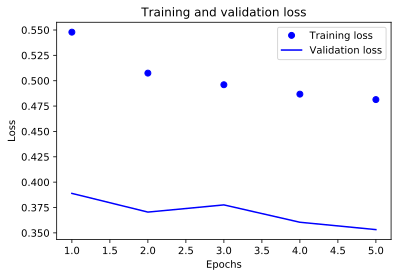

In [16]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

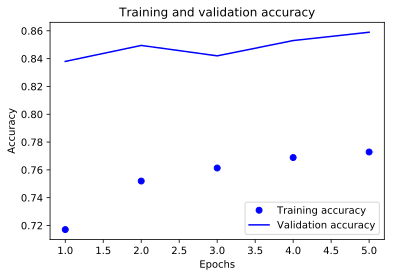

In [17]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**5，使用模型**

In [38]:
# 注意，使用模型进行预测时要设置生成器shuffle = False
train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size=(32, 32),
                  batch_size=20,
                  class_mode='binary',
                  shuffle = False)

test_generator = test_datagen.flow_from_directory(
                 test_dir,
                 target_size=(32, 32),
                 batch_size=20,
                 class_mode='binary',
                 shuffle = False)

Found 10000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [23]:
# 输出概率值
y_pred = model.predict_generator(train_generator,steps = len(train_generator))

In [43]:
y_pred = np.reshape(y_pred,(-1,))

In [45]:
y_true = np.concatenate([train_generator[i][1] 
                         for i in range(len(train_generator))])

In [26]:
from sklearn.metrics import roc_auc_score

In [48]:
auc = roc_auc_score(y_true,y_pred)

In [49]:
print('train auc:',auc)

train auc: 0.8884008200000001


**6，保存模型**

In [50]:
model.save('cifar2_model.h5')

### 三，文本数据范例 —— Imdb电影评论情感分类

Imdb电影评论数据集包括20000条训练集电影评论数据，这些评论内容被标注为正面评论或者负面评论，以及对应的5000条验证数据。

文本数据的处理相对会比较复杂，如果是中文，首先要切词。第二步是构建词典将词token化，即用编号代替，由于文本中词的个数通常会过多，这个过程中通常要过滤掉低频词。第三步是将不同的文本token序列进行适当的切割和填充，以使得各个句子token长度相同，这样才能作为一个张量输入模型。

**1，准备数据**

In [109]:
#-*- coding=utf-8 -*-
from __future__ import print_function
import datetime,os,sys
import numpy as np
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# ================================================================================
# 设置参数

train_data_path = 'imdb_datasets/zz_train_imdb'
test_data_path = 'imdb_datasets/zz_test_imdb'
scatter_train_data_path = 'imdb_datasets/train/'
scatter_test_data_path = 'imdb_datasets/test/'


max_words = 10000  # We will only consider the top 10,000 words in the dataset
maxlen = 100  # We will cut reviews after 100 words

embedding_dim = 8 

batch_size = 500  # Training and Testing batch_size  
epoch_num = 10

train_samples = 20000
test_samples = 5000

In [110]:
# ================================================================================
# 预处理文本


nowtime = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
print('\n================================================================================ %s\n'%nowtime)
print('start preprocessing texts data...\n')

from tqdm import tqdm

# 制作词典
def texts_gen():
    with open(train_data_path,'r',encoding = 'utf-8') as f,\
    tqdm(total = train_samples) as pbar:      
        while True:
            text = (f.readline().rstrip().split('\t')[-1]).replace('\004',' ')
            if not text:
                break
            if len(text) > maxlen:
                text = text[0:maxlen]
            pbar.update(1)
            yield text
            
texts = texts_gen()
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)

#-----------------------------------------------------------------------------------

#def data_gen(data_file):
#    while True:
#        with open(data_file,'r') as f:
#            while True:
#                lines = [f.readline() for i in range(batch_size)]
#                if not lines[-1]:
#                    break    
#                labels = np.array([int(line.strip().split('\t')[-2]) for line in lines])
#                texts = [(line.strip().split('\t')[-1]).replace('\004',' ') for line in lines]
#                sequences = tokenizer.texts_to_sequences(texts)
#                datas = pad_sequences(sequences,maxlen)
#                yield datas,labels  
                

#train_gen = data_gen(train_data_path)
#test_gen = data_gen(valid_data_path)

#------------------------------------------------------------------------------------

# 将数据打散到一个文件一个样本

def scatter_data(data_file, scatter_data_path):
    if not os.path.exists(scatter_data_path):
        os.makedirs(scatter_data_path)
    for idx,line in enumerate(open(data_file,'r',encoding = 'utf-8')):
        with open(scatter_data_path + str(idx) + '.txt','w',
        encoding = 'utf-8') as f:
             f.write(line)

scatter_data(train_data_path,scatter_train_data_path)
scatter_data(valid_data_path,scatter_valid_data_path)


# 定义Sequence数据管道， 可以多线程读数据

import numpy as np
import keras

class DataGenerator(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self,n_samples,data_path,batch_size=batch_size,shuffle=True):
        'Initialization'
        self.data_path = data_path
        self.n_samples = n_samples
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(self.n_samples / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        batch_indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        # Generate data
        datas, labels = self.__data_generation(batch_indexes)
        return datas, labels

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(self.n_samples)
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __read_file(self,file_name):
        with open(file_name,encoding = 'utf-8') as f:
            line = f.readline()
        return line

    def __data_generation(self, batch_indexes):

        'Generates data containing batch_size samples'
        # Initialization
        lines = [self.__read_file(self.data_path + str(i) + '.txt') for i in batch_indexes]
        labels = np.array([int(line.strip().split('\t')[0]) for line in lines])
        texts = [line.strip().split('\t')[-1] for line in lines]
        sequences = tokenizer.texts_to_sequences(texts)
        datas = pad_sequences(sequences,maxlen)

        return datas,labels


train_gen = DataGenerator(train_samples,scatter_train_data_path)
test_gen = DataGenerator(test_samples,scatter_test_data_path)


================================================================================ 2019-03-24 00:09:29

start preprocessing texts data...



100%|█████████████████████████████████| 20000/20000 [00:01<00:00, 15363.03it/s]


**2，构建模型**

In [111]:
# ================================================================================
# 定义模型结构

nowtime = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
print('\n================================================================================ %s\n'%nowtime)
print('start construct model ...\n')

from keras import models
from keras import layers
from keras import backend as K
K.clear_session()

model = models.Sequential()
model.add(layers.Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.summary()


================================================================================ 2019-03-24 00:10:11

start construct model ...

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 8)            80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 105,665
Trainable params: 105,665
Non-trainable params: 0
_________________________________________________________________


In [113]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

**3，训练模型**

In [114]:
# ================================================================================
# 训练模型

nowtime = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
print('\n================================================================================ %s\n'%nowtime)
print('start fit model ...\n')

steps_per_epoch = train_samples // batch_size
validation_steps = test_samples // batch_size

history = model.fit_generator(train_gen,
                         steps_per_epoch = steps_per_epoch,
                         epochs = epoch_num,
                         validation_data= test_gen,
                         validation_steps = validation_steps
                         )


================================================================================ 2019-03-24 00:10:52

start fit model ...

Epoch 1/10
40/40 [==============================] - ETA: 2:21 - loss: 0.6940 - acc: 0.478 - ETA: 1:52 - loss: 0.6932 - acc: 0.495 - ETA: 1:47 - loss: 0.6930 - acc: 0.502 - ETA: 1:40 - loss: 0.6930 - acc: 0.499 - ETA: 1:31 - loss: 0.6930 - acc: 0.503 - ETA: 1:27 - loss: 0.6930 - acc: 0.505 - ETA: 1:22 - loss: 0.6930 - acc: 0.504 - ETA: 1:20 - loss: 0.6930 - acc: 0.506 - ETA: 1:15 - loss: 0.6930 - acc: 0.504 - ETA: 1:13 - loss: 0.6930 - acc: 0.503 - ETA: 1:09 - loss: 0.6930 - acc: 0.504 - ETA: 1:05 - loss: 0.6930 - acc: 0.504 - ETA: 1:03 - loss: 0.6929 - acc: 0.506 - ETA: 1:00 - loss: 0.6927 - acc: 0.507 - ETA: 58s - loss: 0.6926 - acc: 0.508 - ETA: 56s - loss: 0.6925 - acc: 0.50 - ETA: 54s - loss: 0.6924 - acc: 0.51 - ETA: 51s - loss: 0.6923 - acc: 0.51 - ETA: 48s - loss: 0.6923 - acc: 0.50 - ETA: 46s - loss: 0.6922 - acc: 0.50 - ETA: 43s - loss: 0.6922 - acc: 0.50

40/40 [==============================] - ETA: 1:50 - loss: 0.2058 - acc: 0.930 - ETA: 1:41 - loss: 0.1922 - acc: 0.939 - ETA: 1:40 - loss: 0.1867 - acc: 0.941 - ETA: 1:35 - loss: 0.1969 - acc: 0.932 - ETA: 1:29 - loss: 0.1900 - acc: 0.936 - ETA: 1:25 - loss: 0.1882 - acc: 0.936 - ETA: 1:22 - loss: 0.1901 - acc: 0.935 - ETA: 1:18 - loss: 0.1920 - acc: 0.935 - ETA: 1:14 - loss: 0.1914 - acc: 0.935 - ETA: 1:10 - loss: 0.1913 - acc: 0.934 - ETA: 1:08 - loss: 0.1916 - acc: 0.933 - ETA: 1:05 - loss: 0.1911 - acc: 0.935 - ETA: 1:05 - loss: 0.1935 - acc: 0.934 - ETA: 1:02 - loss: 0.1941 - acc: 0.935 - ETA: 1:00 - loss: 0.1931 - acc: 0.935 - ETA: 57s - loss: 0.1928 - acc: 0.935 - ETA: 54s - loss: 0.1939 - acc: 0.93 - ETA: 52s - loss: 0.1950 - acc: 0.93 - ETA: 50s - loss: 0.1942 - acc: 0.93 - ETA: 47s - loss: 0.1932 - acc: 0.93 - ETA: 45s - loss: 0.1934 - acc: 0.93 - ETA: 42s - loss: 0.1922 - acc: 0.93 - ETA: 40s - loss: 0.1907 - acc: 0.93 - ETA: 37s - loss: 0.1914 - acc: 0.93 - ETA: 35s - loss:

Epoch 10/10
40/40 [==============================] - ETA: 1:40 - loss: 0.0454 - acc: 0.994 - ETA: 1:40 - loss: 0.0368 - acc: 0.997 - ETA: 1:39 - loss: 0.0335 - acc: 0.998 - ETA: 1:32 - loss: 0.0346 - acc: 0.998 - ETA: 1:30 - loss: 0.0336 - acc: 0.998 - ETA: 1:26 - loss: 0.0321 - acc: 0.998 - ETA: 1:22 - loss: 0.0311 - acc: 0.998 - ETA: 1:18 - loss: 0.0316 - acc: 0.998 - ETA: 1:14 - loss: 0.0315 - acc: 0.998 - ETA: 1:11 - loss: 0.0321 - acc: 0.998 - ETA: 1:09 - loss: 0.0313 - acc: 0.998 - ETA: 1:06 - loss: 0.0308 - acc: 0.998 - ETA: 1:04 - loss: 0.0305 - acc: 0.998 - ETA: 1:02 - loss: 0.0299 - acc: 0.998 - ETA: 59s - loss: 0.0297 - acc: 0.998 - ETA: 56s - loss: 0.0293 - acc: 0.99 - ETA: 53s - loss: 0.0288 - acc: 0.99 - ETA: 51s - loss: 0.0286 - acc: 0.99 - ETA: 50s - loss: 0.0288 - acc: 0.99 - ETA: 47s - loss: 0.0285 - acc: 0.99 - ETA: 45s - loss: 0.0285 - acc: 0.99 - ETA: 42s - loss: 0.0285 - acc: 0.99 - ETA: 40s - loss: 0.0288 - acc: 0.99 - ETA: 37s - loss: 0.0286 - acc: 0.99 - ETA: 3

**4，评估模型**

In [117]:
nowtime = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
print('\n================================================================================ %s\n'%nowtime)
print('show results...\n')

import os
import pandas as pd


# 保存得分
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

dfhistory  = pd.DataFrame({'epoch':epochs,'train_loss':loss,'valid_loss':val_loss,
                  'train_auc':acc,'valid_auc':val_acc})

print(dfhistory)



================================================================================ 2019-03-24 09:14:14

show results...

   epoch  train_loss  valid_loss  train_auc  valid_auc
0      1    0.691571    0.687247    0.52370     0.5806
1      2    0.640559    0.566591    0.73360     0.7592
2      3    0.414996    0.372455    0.83890     0.8410
3      4    0.263538    0.332168    0.89950     0.8580
4      5    0.190057    0.335219    0.93415     0.8612
5      6    0.136718    0.347621    0.96035     0.8566
6      7    0.095121    0.371159    0.97940     0.8512
7      8    0.064296    0.397759    0.98915     0.8482
8      9    0.042418    0.425182    0.99550     0.8444
9     10    0.028580    0.450843    0.99805     0.8426


In [116]:
dfhistory

,epoch,train_loss,valid_loss,train_auc,valid_auc
0,1,0.691571,0.687247,0.52370,0.5806
1,2,0.640559,0.566591,0.73360,0.7592
2,3,0.414996,0.372455,0.83890,0.8410
3,4,0.263538,0.332168,0.89950,0.8580
4,5,0.190057,0.335219,0.93415,0.8612
5,6,0.136718,0.347621,0.96035,0.8566
6,7,0.095121,0.371159,0.97940,0.8512
7,8,0.064296,0.397759,0.98915,0.8482
8,9,0.042418,0.425182,0.99550,0.8444
9,10,0.028580,0.450843,0.99805,0.8426


**5，使用模型**

In [118]:
# 注意，使用模型进行预测时要设置生成器shuffle = False
test_gen = DataGenerator(test_samples,scatter_test_data_path,shuffle = False)

In [119]:
test_pred = model.predict_generator(test_gen)

**6，保存模型**

In [121]:
model.save('imdb_model.h5')